# MAINTENANCE

In [1]:
# Installation des Bibliothèques :

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import missingno as msno
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from time import time
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from sklearn.metrics.cluster import adjusted_rand_score

# I Préparation du Dataset Maintenance :

In [2]:
# Visualisation :

maintenance = pd.read_csv("paul_stanley.csv")

maintenance.head(10)

,customer_unique_id,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant
0,5beb14f603ed51da383102bce45011a5,1.0,4.0,11.0,750.0,5.0,1.0,1.0,1.0,1.0,750.00,70.24,81,1,820.24
1,d0369e457c130ff9af7d46f753859547,1.0,8.0,31.0,59.9,3.0,1.0,1.0,1.0,1.0,59.90,24.97,326,1,84.87
2,04dc693818a94b104356b6a89197fedb,1.0,5.0,13.0,189.9,5.0,1.0,1.0,1.0,1.0,189.90,30.91,91,1,220.81
3,5a0147a4dea9567394f45af36262e7d6,1.0,1.0,12.0,20.0,4.0,1.0,1.0,1.0,1.0,19.99,16.79,342,1,36.78
4,4d0a36655fd8b23418624efafef982c3,1.0,1.0,11.0,115.0,3.0,1.0,1.0,1.0,1.0,115.00,16.57,475,1,131.57
5,b83b8ef747f88daca292479d4f23235b,1.0,1.0,15.0,136.7,5.0,1.0,1.0,1.0,1.0,136.68,18.21,261,1,154.89
6,35e511c2aa4a46a8367c1f8a3adc6440,1.0,1.0,7.0,89.9,5.0,1.0,1.0,1.0,1.0,89.90,23.21,114,1,113.11
7,ea1ea2c22279ea78c37c7e359bd3a556,1.0,5.0,14.0,210.0,4.0,1.0,1.0,1.0,1.0,209.99,31.77,414,1,241.76
8,d6e6c87e9a5357f46b215d0f68147084,1.0,1.0,3.0,15.0,3.0,1.0,1.0,1.0,1.0,15.00,12.79,59,1,27.79
9,548b3d46fa0ed6a9edded242f0180460,1.0,2.0,12.0,129.9,3.0,1.0,1.0,1.0,1.0,129.90,20.99,531,1,150.89


In [3]:
# Visualisation :

time = pd.read_csv("timestamp.csv")

time.head(10)

,Unnamed: 0,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,...,reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,0,a41753c6a1d8accb89732e36243432d7,1.0,e3e020af31d4d89d2602272b315c3f6e,29.9,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-19 14:13:02,...,True,4.0,dc83fe8f72fb4388f079a2f9b586240c,8599.0,Itaquaquecetuba,SP,58.0,1987.0,3.0,fashion
1,1,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1.0,c5d8079278e912d7e3b6beb48ecb56e8,95.9,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-14 14:38:53,...,True,5.0,ba0a84d4272f023846c748fd2eb76ffd,20261.0,Rio de janeiro,RJ,60.0,330.0,1.0,fashion
2,2,f6fbf7907913892ffc12ada3bff286ba,1.0,c5d8079278e912d7e3b6beb48ecb56e8,89.9,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-08-10 20:04:29,...,True,4.0,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401.0,Montes claros,MG,60.0,330.0,1.0,fashion
3,3,a63144d37a00c28ef382668a5d5ece8b,1.0,36555a2f528d7b2a255c504191445d39,29.9,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-21 14:35:19,...,True,5.0,8ad15fb1cf056731335e36eb723c0eac,98780.0,Santa rosa,RS,51.0,1069.0,1.0,fashion
4,4,93d7cfb112111edec49fd02555f48da3,1.0,e586ebb6022265ae1eea38f46ffe3ead,64.9,19.64,f05b7d5565860304973f163aba0b8804,delivered,2018-08-15 17:00:58,2018-08-23 14:44:39,...,True,3.0,f77ac730b6784c05fb61e42cac98d9c1,88740.0,Armazem,SC,40.0,1469.0,3.0,fashion
5,5,3ea7135b7064169abacfc10aa72f2e3a,1.0,e586ebb6022265ae1eea38f46ffe3ead,64.9,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-21 21:16:33,...,True,5.0,463b274f7ab4cac3b894531a03a7afa1,97105.0,Santa maria,RS,40.0,1469.0,3.0,fashion
6,6,396b08e638fbc9a9d6747df738dbd29c,1.0,75b4372e69a42f8ae1d908c076f547b2,255.0,15.88,b86fa13640bbe026753973deebf377c8,delivered,2018-04-04 17:16:55,2018-04-14 19:32:33,...,True,3.0,49c8c4575d64540960170de12edb2ff7,11680.0,Ubatuba,SP,22.0,1313.0,1.0,fashion
7,7,d9f834b712ac280bbbbcd7a3114c240c,1.0,75b4372e69a42f8ae1d908c076f547b2,255.0,12.99,01268a9cd062a41dbaebe24bd8b07cbf,delivered,2017-12-03 17:28:22,2017-12-07 18:56:43,...,True,1.0,3a75fe04b67f463a4cbb5cd665321cc6,5574.0,Sao paulo,SP,22.0,1313.0,1.0,fashion
8,8,f409f5ae35c08a9135d9e5d15ec6ab67,1.0,75b4372e69a42f8ae1d908c076f547b2,219.9,12.74,278d8ca725342a1f850e1ebbe341b052,delivered,2017-07-10 10:58:31,2017-07-14 16:32:17,...,True,4.0,e9dde8681b9a6edddc49eb0fabad01f0,4186.0,Sao paulo,SP,22.0,1313.0,1.0,fashion
9,9,dd8c2ff157394afacbcc50a161e1af4e,1.0,75b4372e69a42f8ae1d908c076f547b2,253.0,19.02,7aa9979edeecc4c0748cfb942a7850db,delivered,2017-07-14 09:18:17,2017-07-24 17:52:07,...,True,4.0,29a3dfd056ce4de7aebfe9f2e78f8268,88805.0,Criciuma,SC,22.0,1313.0,1.0,fashion


In [4]:
# Merge :

stability = pd.merge(maintenance, time, how="right", on="customer_unique_id")

stability.head(10)

,customer_unique_id,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,...,sum_payment_installments,reviewed,review_score,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,dc83fe8f72fb4388f079a2f9b586240c,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,...,3.0,True,4.0,8599.0,Itaquaquecetuba,SP,58.0,1987.0,3.0,fashion
1,ba0a84d4272f023846c748fd2eb76ffd,1.0,6.0,8.0,95.9,5.0,1.0,1.0,1.0,1.0,...,6.0,True,5.0,20261.0,Rio de janeiro,RJ,60.0,330.0,1.0,fashion
2,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,...,4.0,True,4.0,39401.0,Montes claros,MG,60.0,330.0,1.0,fashion
3,8ad15fb1cf056731335e36eb723c0eac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,True,5.0,98780.0,Santa rosa,RS,51.0,1069.0,1.0,fashion
4,f77ac730b6784c05fb61e42cac98d9c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,True,3.0,88740.0,Armazem,SC,40.0,1469.0,3.0,fashion
5,463b274f7ab4cac3b894531a03a7afa1,1.0,4.0,9.0,64.9,5.0,1.0,1.0,1.0,1.0,...,4.0,True,5.0,97105.0,Santa maria,RS,40.0,1469.0,3.0,fashion
6,49c8c4575d64540960170de12edb2ff7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,True,3.0,11680.0,Ubatuba,SP,22.0,1313.0,1.0,fashion
7,3a75fe04b67f463a4cbb5cd665321cc6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,True,1.0,5574.0,Sao paulo,SP,22.0,1313.0,1.0,fashion
8,e9dde8681b9a6edddc49eb0fabad01f0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,True,4.0,4186.0,Sao paulo,SP,22.0,1313.0,1.0,fashion
9,29a3dfd056ce4de7aebfe9f2e78f8268,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,...,10.0,True,4.0,88805.0,Criciuma,SC,22.0,1313.0,1.0,fashion


In [5]:
# Elimination des Valeurs Manquantes :

stability = stability.dropna()

In [6]:
# Elimination de Colonnes :

stability_cluster = stability.drop(['Unnamed: 0',
 'order_id',
 'order_item_id',
 'product_id',
 'price',
 'freight_value',
 'customer_id',
 'order_status',
 'order_delivered_customer_date',
 'nb_payment_sequential',
 'sum_payment_installments',
 'reviewed',
 'review_score',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_category_name'], axis=1)

In [7]:
# Nombre de Lignes et de Colonnes :

stability_cluster.shape

(52403, 16)

In [8]:
# Indexation :

stability_cluster = stability_cluster.set_index('customer_unique_id') 

stability_cluster.head(10)

,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,
dc83fe8f72fb4388f079a2f9b586240c,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.9,15.79,475.0,1.0,45.69,2017-05-12 10:51:43
ba0a84d4272f023846c748fd2eb76ffd,1.0,6.0,8.0,95.9,5.0,1.0,1.0,1.0,1.0,95.9,27.22,176.0,1.0,123.12,2018-03-06 18:14:49
46e277a4bd2d4bf3e0e8cfaf4ea3c41b,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.9,38.18,394.0,1.0,128.08,2017-07-31 18:47:11
463b274f7ab4cac3b894531a03a7afa1,1.0,4.0,9.0,64.9,5.0,1.0,1.0,1.0,1.0,64.9,19.64,18.0,1.0,84.54,2018-08-12 13:21:59
29a3dfd056ce4de7aebfe9f2e78f8268,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.0,19.02,412.0,1.0,272.02,2017-07-14 09:18:17
cefb6abc17327421e6cfb20276efd9cc,1.0,2.0,5.0,99.9,5.0,1.0,1.0,1.0,1.0,99.9,12.15,236.0,1.0,112.05,2018-01-05 18:57:57
8d668878ef1faabcc7e7330007327ecc,1.0,1.0,3.0,32.0,3.0,1.0,1.0,1.0,1.0,32.0,7.48,64.0,1.0,39.48,2018-06-27 10:01:00
c10e7d1b56c9ee965823ea384a0d6f21,1.0,1.0,2.0,29.9,5.0,1.0,1.0,1.0,1.0,29.9,7.39,141.0,1.0,37.29,2018-04-11 14:50:06
a0d20a4d4fb76cdf8d4047a01fc4cac0,1.0,1.0,6.0,32.0,1.0,1.0,1.0,1.0,1.0,32.0,7.48,20.0,1.0,39.48,2018-08-09 21:55:15


In [9]:
# Temporisation :

stability_cluster["order_purchase_timestamp"] = stability_cluster["order_purchase_timestamp"].astype('datetime64[ns]')

In [10]:
# Types des Variables :

stability_cluster.dtypes

mean_payment_sequential             float64
mean_payment_installments           float64
mean_delivery_days                  float64
mean_price_order                    float64
note_review_mean                    float64
nb_review                           float64
nbr_commandes                       float64
nbr_articles                        float64
nbr_articles_mean                   float64
basket_mean                         float64
payment_port_mean                   float64
Récence                             float64
Fréquence                           float64
Montant                             float64
order_purchase_timestamp     datetime64[ns]
dtype: object

# II Calculs :

# Différents Pas Temporels et Application du Kmeans pour la Première Année :

In [11]:
# Mois Totaux :

mois_totaux = round((stability_cluster['order_purchase_timestamp'].max() - stability_cluster['order_purchase_timestamp'].min())/ np.timedelta64(1,'M'))

mois_totaux

23

In [12]:
# Date Minimum :

stability_cluster['order_purchase_timestamp'].min()

Timestamp('2016-10-03 22:31:31')

In [13]:
# Date Maximum :

stability_cluster['order_purchase_timestamp'].max()

Timestamp('2018-08-29 14:52:00')

In [14]:
# Application kMeans Première Année :

premiere_annee = stability_cluster[stability_cluster['order_purchase_timestamp'] < pd.to_datetime('2017-07-04')]

premiere_annee = premiere_annee.drop(['order_purchase_timestamp'], axis=1)

premiere_annee_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(premiere_annee), columns=premiere_annee.columns, index=premiere_annee.index)

In [15]:
# Maintenance : Kmeans : 

kmeans_maintenance = KMeans(init='k-means++', n_clusters=6, n_init=10, random_state=42)

kmeans_maintenance.fit(premiere_annee_scaled)

print(kmeans_maintenance.fit(premiere_annee_scaled).labels_)

[1 0 0 ... 1 1 1]


# PAS "MENSUEL" : CALCUL + GRAPHIQUES :

In [16]:
# Périodisation :

periodes1 = [
    '2017-07-04',
    '2017-08-04',
    '2017-09-04',
    '2017-10-04',
    '2017-11-04',
    '2017-12-04',
    '2018-01-04',
    '2018-02-04',
    '2018-03-04',
    '2018-04-04',
    '2018-05-04',
    '2018-06-04',
    '2018-07-04',
    '2018-08-04',
    '2018-09-04',
]

In [17]:
# Calcul des ARI :

df_scores = []

length = len(kmeans_maintenance.labels_)-1

for i in range(len(periodes1)):
    scores = {}
    df = stability_cluster[stability_cluster['order_purchase_timestamp'] < pd.to_datetime(periodes1[i])]
    df = df.drop(['order_purchase_timestamp'], axis=1)
    df_pourcentage = round((df.shape[0] / stability_cluster.shape[0] * 100), 2)
    df_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),
                             columns=df.columns,
                             index=df.index)
    kmeans_model = KMeans(init='k-means++', n_clusters=6, n_init=10, random_state=42)
    kmeans_model.fit(premiere_annee_scaled)
    clusters_before = kmeans_model.predict(df_scaled)
    model_fit_df = kmeans_model.fit(df_scaled)
    clusters_after = model_fit_df.predict(df_scaled)
    ari_score = round(adjusted_rand_score(
        clusters_before[0:length],
        clusters_after[0:length]),2)
    scores['Df_Pourcentage'] = df_pourcentage
    scores['Période'] = 'Après ' + str(i+1) + ' Mois'
    scores['Ari_Score'] = ari_score
    df_scores.append(scores)
    print(ari_score)

1.0
0.6
0.3
0.83
0.32
0.41
0.4
0.67
0.63
0.65
0.62
0.19
0.23
0.19
0.37


In [18]:
# Calcul "df_scores" :

df_scores

[{'Df_Pourcentage': 14.61, 'Période': 'Après 1 Mois', 'Ari_Score': 1.0},
 {'Df_Pourcentage': 18.86, 'Période': 'Après 2 Mois', 'Ari_Score': 0.6},
 {'Df_Pourcentage': 23.07, 'Période': 'Après 3 Mois', 'Ari_Score': 0.3},
 {'Df_Pourcentage': 27.42, 'Période': 'Après 4 Mois', 'Ari_Score': 0.83},
 {'Df_Pourcentage': 32.0, 'Période': 'Après 5 Mois', 'Ari_Score': 0.32},
 {'Df_Pourcentage': 40.12, 'Période': 'Après 6 Mois', 'Ari_Score': 0.41},
 {'Df_Pourcentage': 45.4, 'Période': 'Après 7 Mois', 'Ari_Score': 0.4},
 {'Df_Pourcentage': 52.8, 'Période': 'Après 8 Mois', 'Ari_Score': 0.67},
 {'Df_Pourcentage': 59.8, 'Période': 'Après 9 Mois', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 66.99, 'Période': 'Après 10 Mois', 'Ari_Score': 0.65},
 {'Df_Pourcentage': 74.22, 'Période': 'Après 11 Mois', 'Ari_Score': 0.62},
 {'Df_Pourcentage': 81.06, 'Période': 'Après 12 Mois', 'Ari_Score': 0.19},
 {'Df_Pourcentage': 87.7, 'Période': 'Après 13 Mois', 'Ari_Score': 0.23},
 {'Df_Pourcentage': 94.34, 'Période': 'Aprè

In [19]:
# Création d'un DATASET ARI Mois :

pd.DataFrame(df_scores, columns=['Période', 'Ari_Score','Df_Pourcentage'])


,Période,Ari_Score,Df_Pourcentage
0,Après 1 Mois,1.00,14.61
1,Après 2 Mois,0.60,18.86
2,Après 3 Mois,0.30,23.07
3,Après 4 Mois,0.83,27.42
4,Après 5 Mois,0.32,32.00
5,Après 6 Mois,0.41,40.12
6,Après 7 Mois,0.40,45.40
7,Après 8 Mois,0.67,52.80
8,Après 9 Mois,0.63,59.80
9,Après 10 Mois,0.65,66.99


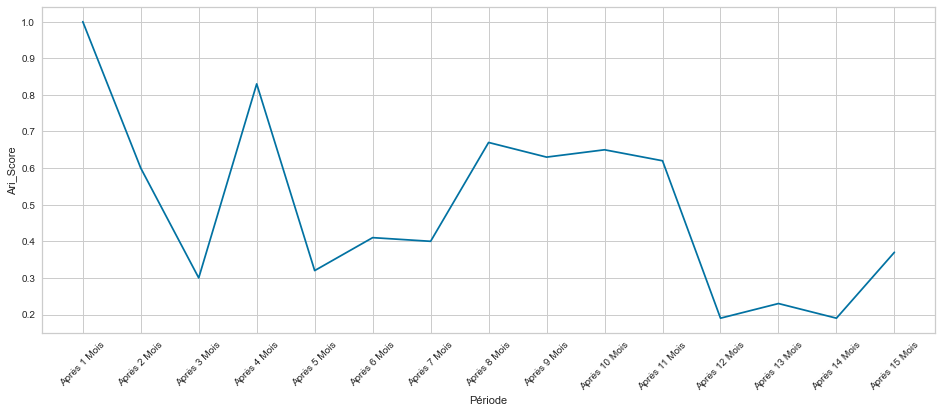

In [20]:
# Lineplot ARI Score / Mois :

fig = plt.figure(figsize=(16, 6))

plt.xticks(rotation=45)

bp = sns.lineplot(
    y='Ari_Score',
    x='Période',
    data=pd.DataFrame(
    df_scores,
    columns=['Période', 'Ari_Score'],
),  ci=None, )

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

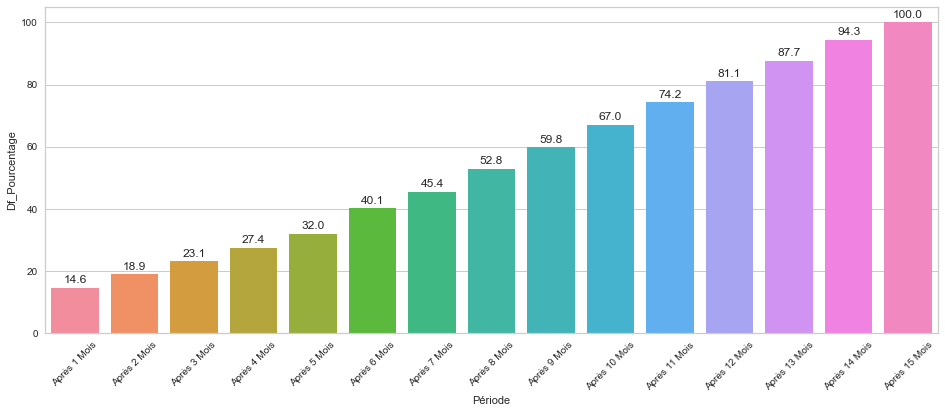

In [21]:
# Evaluation de Nombre d'Achats au Fil du Temps :

fig = plt.figure(figsize=(16, 6))
                 
plt.xticks(rotation=45)                 

bp = sns.barplot(
    y='Df_Pourcentage',
    x='Période',
    data=pd.DataFrame(
    df_scores,
    columns=['Période', 'Df_Pourcentage'],
),
    saturation=0.9,
    # order=order,
    # color='darkred',
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

# PAS "HEBDOMADAIRE" : CALCUL + GRAPHIQUES :

In [22]:
# Périodisation :

periodes2 = [
    '2017-07-04',
    '2017-07-11',
    '2017-07-18',
    '2017-07-25',
    '2017-08-01',
    '2017-08-08',
    '2017-08-15',
    '2017-08-22',
    '2017-08-29',
    '2017-09-06',
    '2017-09-13',
    '2017-09-20',
    '2017-09-27',
    '2017-10-04',
    '2017-10-11',
]

In [23]:
# Calcul des ARI :

df_scores = []

length = len(kmeans_maintenance.labels_)-1

for i in range(len(periodes2)):
    scores = {}
    df = stability_cluster[stability_cluster['order_purchase_timestamp'] < pd.to_datetime(periodes2[i])]
    df = df.drop(['order_purchase_timestamp'], axis=1)
    df_pourcentage = round((df.shape[0] / stability_cluster.shape[0] * 100), 2)
    df_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),
                             columns=df.columns,
                             index=df.index)
    kmeans_model = KMeans(init='k-means++', n_clusters=6, n_init=10, random_state=42)
    kmeans_model.fit(premiere_annee_scaled)
    clusters_before = kmeans_model.predict(df_scaled)
    model_fit_df = kmeans_model.fit(df_scaled)
    clusters_after = model_fit_df.predict(df_scaled)
    ari_score = round(adjusted_rand_score(
        clusters_before[0:length],
        clusters_after[0:length]),2)
    scores['Df_Pourcentage'] = df_pourcentage
    scores['Période'] = 'Après ' + str(i+1) + ' Semaines'
    scores['Ari_Score'] = ari_score
    df_scores.append(scores)
    print(ari_score)

1.0
0.63
0.96
0.91
0.28
0.91
0.91
0.92
0.9
0.65
0.9
0.59
0.82
0.83
0.35


In [24]:
# Visualisation :

df_scores


[{'Df_Pourcentage': 14.61, 'Période': 'Après 1 Semaines', 'Ari_Score': 1.0},
 {'Df_Pourcentage': 15.46, 'Période': 'Après 2 Semaines', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 16.5, 'Période': 'Après 3 Semaines', 'Ari_Score': 0.96},
 {'Df_Pourcentage': 17.43, 'Période': 'Après 4 Semaines', 'Ari_Score': 0.91},
 {'Df_Pourcentage': 18.43, 'Période': 'Après 5 Semaines', 'Ari_Score': 0.28},
 {'Df_Pourcentage': 19.35, 'Période': 'Après 6 Semaines', 'Ari_Score': 0.91},
 {'Df_Pourcentage': 20.23, 'Période': 'Après 7 Semaines', 'Ari_Score': 0.91},
 {'Df_Pourcentage': 21.27, 'Période': 'Après 8 Semaines', 'Ari_Score': 0.92},
 {'Df_Pourcentage': 22.22, 'Période': 'Après 9 Semaines', 'Ari_Score': 0.9},
 {'Df_Pourcentage': 23.39, 'Période': 'Après 10 Semaines', 'Ari_Score': 0.65},
 {'Df_Pourcentage': 24.36, 'Période': 'Après 11 Semaines', 'Ari_Score': 0.9},
 {'Df_Pourcentage': 25.46, 'Période': 'Après 12 Semaines', 'Ari_Score': 0.59},
 {'Df_Pourcentage': 26.45, 'Période': 'Après 13 Semaines', 'Ari_S

In [25]:
# Création d'un DATASET ARI :

pd.DataFrame(df_scores, columns=['Période', 'Ari_Score','Df_Pourcentage'])


,Période,Ari_Score,Df_Pourcentage
0,Après 1 Semaines,1.00,14.61
1,Après 2 Semaines,0.63,15.46
2,Après 3 Semaines,0.96,16.50
3,Après 4 Semaines,0.91,17.43
4,Après 5 Semaines,0.28,18.43
5,Après 6 Semaines,0.91,19.35
6,Après 7 Semaines,0.91,20.23
7,Après 8 Semaines,0.92,21.27
8,Après 9 Semaines,0.90,22.22
9,Après 10 Semaines,0.65,23.39


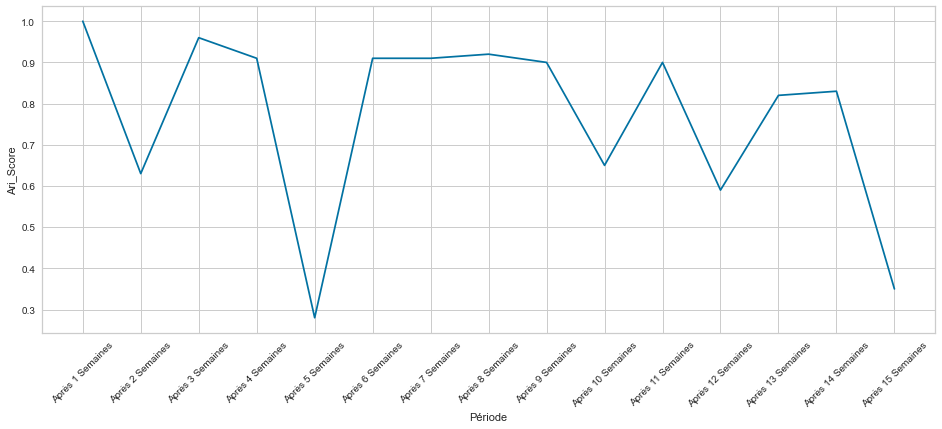

In [26]:
# Lineplot ARI Score / Mois :

fig = plt.figure(figsize=(16, 6))

plt.xticks(rotation=45)

bp = sns.lineplot(
    y='Ari_Score',
    x='Période',
    data=pd.DataFrame(
    df_scores,
    columns=['Période', 'Ari_Score'],
),  ci=None, )

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

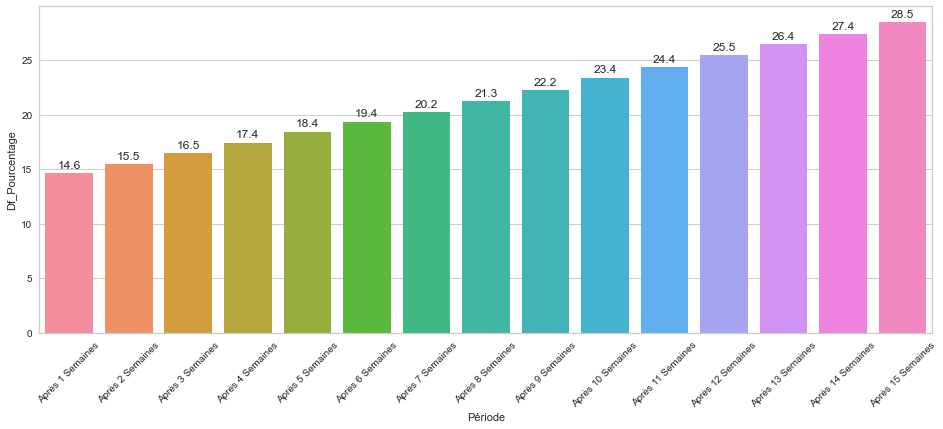

In [27]:
# Evaluation de Nombre d'Achats au Fil du Temps :

fig = plt.figure(figsize=(16, 6))
                 
plt.xticks(rotation=45)                 

bp = sns.barplot(
    y='Df_Pourcentage',
    x='Période',
    data=pd.DataFrame(
    df_scores,
    columns=['Période', 'Df_Pourcentage'],
),
    saturation=0.9,
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

# PAS "JOURNALIER" : CALCUL + GRAPHIQUES :

In [28]:
# Périodisation :

periodes3 = [
    '2017-07-04',
    '2017-07-05',
    '2017-07-06',
    '2017-07-07',
    '2017-07-08',
    '2017-07-09',
    '2017-07-10',
    '2017-07-11',
    '2017-07-12',
    '2017-07-13',
    '2017-07-14',
    '2017-07-15',
    '2017-07-16',
    '2017-07-17',
    '2017-07-18',
    '2017-07-19',
    '2017-07-20',
    '2017-07-21',
    '2017-07-22',
    '2017-07-23',
    '2017-07-24',
    '2017-07-25',
    '2017-07-26',
    '2017-07-27',
    '2017-07-28',
    '2017-07-29',
    '2017-07-30',
]

In [29]:
# Calcul des ARI :

df_scores = []

length = len(kmeans_maintenance.labels_)-1

for i in range(len(periodes3)):
    scores = {}
    df = stability_cluster[stability_cluster['order_purchase_timestamp'] < pd.to_datetime(periodes3[i])]
    df = df.drop(['order_purchase_timestamp'], axis=1)
    df_pourcentage = round((df.shape[0] / stability_cluster.shape[0] * 100), 2)
    df_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),
                             columns=df.columns,
                             index=df.index)
    kmeans_model = KMeans(init='k-means++', n_clusters=6, n_init=10, random_state=42)
    kmeans_model.fit(premiere_annee_scaled)
    clusters_before = kmeans_model.predict(df_scaled)
    model_fit_df = kmeans_model.fit(df_scaled)
    clusters_after = model_fit_df.predict(df_scaled)
    ari_score = round(adjusted_rand_score(
        clusters_before[0:length],
        clusters_after[0:length]),2)
    scores['Df_Pourcentage'] = df_pourcentage
    scores['Période'] = 'Après ' + str(i+1) + ' Jours'
    scores['Ari_Score'] = ari_score
    df_scores.append(scores)
    print(ari_score)

1.0
0.64
0.64
0.25
0.63
0.64
0.64
0.63
0.63
0.63
0.25
0.63
0.63
0.28
0.96
0.95
0.28
0.28
0.92
0.92
0.91
0.91
0.27
0.7
0.67
0.27
0.27


In [30]:
# Visualisation :

df_scores

[{'Df_Pourcentage': 14.61, 'Période': 'Après 1 Jours', 'Ari_Score': 1.0},
 {'Df_Pourcentage': 14.72, 'Période': 'Après 2 Jours', 'Ari_Score': 0.64},
 {'Df_Pourcentage': 14.86, 'Période': 'Après 3 Jours', 'Ari_Score': 0.64},
 {'Df_Pourcentage': 15.0, 'Période': 'Après 4 Jours', 'Ari_Score': 0.25},
 {'Df_Pourcentage': 15.13, 'Période': 'Après 5 Jours', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 15.22, 'Période': 'Après 6 Jours', 'Ari_Score': 0.64},
 {'Df_Pourcentage': 15.31, 'Période': 'Après 7 Jours', 'Ari_Score': 0.64},
 {'Df_Pourcentage': 15.46, 'Période': 'Après 8 Jours', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 15.6, 'Période': 'Après 9 Jours', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 15.75, 'Période': 'Après 10 Jours', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 15.88, 'Période': 'Après 11 Jours', 'Ari_Score': 0.25},
 {'Df_Pourcentage': 16.06, 'Période': 'Après 12 Jours', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 16.17, 'Période': 'Après 13 Jours', 'Ari_Score': 0.63},
 {'Df_Pourcentage': 16.3

In [31]:
# Création d'un DATASET ARI :

pd.DataFrame(df_scores, columns=['Période', 'Ari_Score','Df_Pourcentage'])

,Période,Ari_Score,Df_Pourcentage
0,Après 1 Jours,1.00,14.61
1,Après 2 Jours,0.64,14.72
2,Après 3 Jours,0.64,14.86
3,Après 4 Jours,0.25,15.00
4,Après 5 Jours,0.63,15.13
5,Après 6 Jours,0.64,15.22
6,Après 7 Jours,0.64,15.31
7,Après 8 Jours,0.63,15.46
8,Après 9 Jours,0.63,15.60
9,Après 10 Jours,0.63,15.75


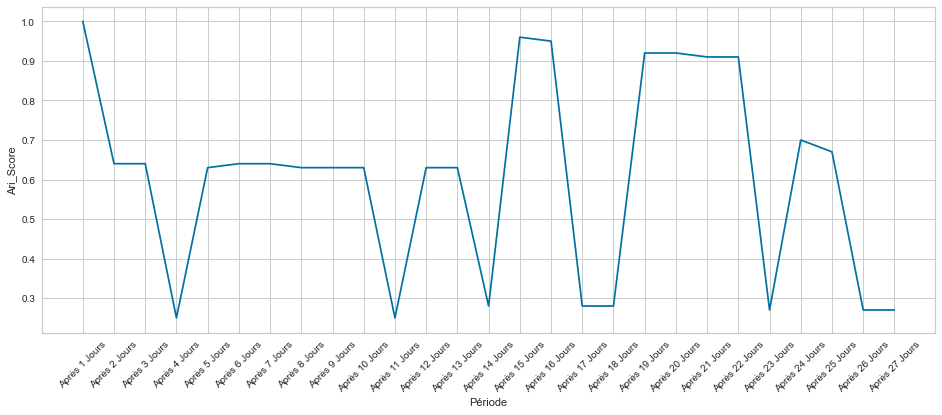

In [32]:
# Lineplot ARI Score / Mois :

fig = plt.figure(figsize=(16, 6))

plt.xticks(rotation=45)

bp = sns.lineplot(
    y='Ari_Score',
    x='Période',
    data=pd.DataFrame(
    df_scores,
    columns=['Période', 'Ari_Score'],
),  ci=None, )

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

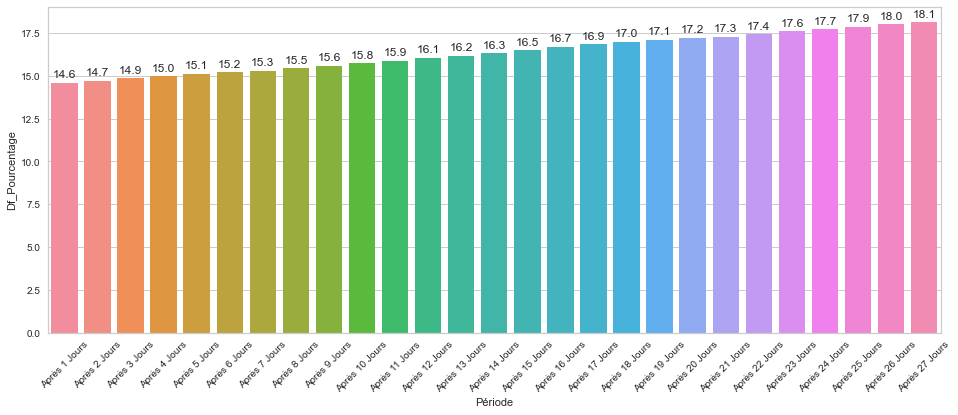

In [33]:
# Evaluation de Nombre d'Achats au Fil du Temps :

fig = plt.figure(figsize=(16, 6))
                 
plt.xticks(rotation=45)                 

bp = sns.barplot(
    y='Df_Pourcentage',
    x='Période',
    data=pd.DataFrame(
    df_scores,
    columns=['Période', 'Df_Pourcentage'],
),
    saturation=0.9,
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

# III Test de Clustering :

Je vais réduire les données en retirant les 4 derniers mois de données et voir comment les clusters évoluent.
Si on constate que les Clusters évoluent, alors il faudra actualiser sur une période de temps plus faible.

In [34]:
# Import :

kiss = pd.read_csv('ace_frehley.csv')

kiss.head(10)

,customer_unique_id,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,Cluster
0,5beb14f603ed51da383102bce45011a5,-0.288851,-0.288851,-0.261293,3.415508,3.268979,-1.025555,-0.29727,1.156545,4
1,d0369e457c130ff9af7d46f753859547,-0.288851,-0.288851,-0.261293,-0.349420,0.315536,0.581589,-0.29727,-0.237611,3
2,04dc693818a94b104356b6a89197fedb,-0.288851,-0.288851,-0.261293,0.359812,0.703065,-0.959957,-0.29727,0.020111,0
3,5a0147a4dea9567394f45af36262e7d6,-0.288851,-0.288851,-0.261293,-0.567154,-0.218132,0.686546,-0.29727,-0.328783,0
4,4d0a36655fd8b23418624efafef982c3,-0.288851,-0.288851,-0.261293,-0.048815,-0.232485,1.558995,-0.29727,-0.149075,0
5,b83b8ef747f88daca292479d4f23235b,-0.288851,-0.288851,-0.261293,0.069463,-0.125490,0.155204,-0.29727,-0.104864,0
6,35e511c2aa4a46a8367c1f8a3adc6440,-0.288851,-0.288851,-0.261293,-0.185751,0.200713,-0.809082,-0.29727,-0.184073,0
7,ea1ea2c22279ea78c37c7e359bd3a556,-0.288851,-0.288851,-0.261293,0.469415,0.759172,1.158849,-0.29727,0.059829,0
8,d6e6c87e9a5357f46b215d0f68147084,-0.288851,-0.288851,-0.261293,-0.594377,-0.479095,-1.169870,-0.29727,-0.345827,0
9,548b3d46fa0ed6a9edded242f0180460,-0.288851,-0.288851,-0.261293,0.032474,0.055878,1.926342,-0.29727,-0.112447,0


In [35]:
# Sélection des Colonnes :

y = kiss[['customer_unique_id', 'Cluster']]

y.head(10)

,customer_unique_id,Cluster
0,5beb14f603ed51da383102bce45011a5,4
1,d0369e457c130ff9af7d46f753859547,3
2,04dc693818a94b104356b6a89197fedb,0
3,5a0147a4dea9567394f45af36262e7d6,0
4,4d0a36655fd8b23418624efafef982c3,0
5,b83b8ef747f88daca292479d4f23235b,0
6,35e511c2aa4a46a8367c1f8a3adc6440,0
7,ea1ea2c22279ea78c37c7e359bd3a556,0
8,d6e6c87e9a5357f46b215d0f68147084,0
9,548b3d46fa0ed6a9edded242f0180460,0


In [36]:
# Visualisation :

stability_cluster.head(10)

,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,
dc83fe8f72fb4388f079a2f9b586240c,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.9,15.79,475.0,1.0,45.69,2017-05-12 10:51:43
ba0a84d4272f023846c748fd2eb76ffd,1.0,6.0,8.0,95.9,5.0,1.0,1.0,1.0,1.0,95.9,27.22,176.0,1.0,123.12,2018-03-06 18:14:49
46e277a4bd2d4bf3e0e8cfaf4ea3c41b,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.9,38.18,394.0,1.0,128.08,2017-07-31 18:47:11
463b274f7ab4cac3b894531a03a7afa1,1.0,4.0,9.0,64.9,5.0,1.0,1.0,1.0,1.0,64.9,19.64,18.0,1.0,84.54,2018-08-12 13:21:59
29a3dfd056ce4de7aebfe9f2e78f8268,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.0,19.02,412.0,1.0,272.02,2017-07-14 09:18:17
cefb6abc17327421e6cfb20276efd9cc,1.0,2.0,5.0,99.9,5.0,1.0,1.0,1.0,1.0,99.9,12.15,236.0,1.0,112.05,2018-01-05 18:57:57
8d668878ef1faabcc7e7330007327ecc,1.0,1.0,3.0,32.0,3.0,1.0,1.0,1.0,1.0,32.0,7.48,64.0,1.0,39.48,2018-06-27 10:01:00
c10e7d1b56c9ee965823ea384a0d6f21,1.0,1.0,2.0,29.9,5.0,1.0,1.0,1.0,1.0,29.9,7.39,141.0,1.0,37.29,2018-04-11 14:50:06
a0d20a4d4fb76cdf8d4047a01fc4cac0,1.0,1.0,6.0,32.0,1.0,1.0,1.0,1.0,1.0,32.0,7.48,20.0,1.0,39.48,2018-08-09 21:55:15


In [37]:
# Désindexation :

stability_cluster = stability_cluster.reset_index(level=0)

stability_cluster.head(10)

,customer_unique_id,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
0,dc83fe8f72fb4388f079a2f9b586240c,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.9,15.79,475.0,1.0,45.69,2017-05-12 10:51:43
1,ba0a84d4272f023846c748fd2eb76ffd,1.0,6.0,8.0,95.9,5.0,1.0,1.0,1.0,1.0,95.9,27.22,176.0,1.0,123.12,2018-03-06 18:14:49
2,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.9,38.18,394.0,1.0,128.08,2017-07-31 18:47:11
3,463b274f7ab4cac3b894531a03a7afa1,1.0,4.0,9.0,64.9,5.0,1.0,1.0,1.0,1.0,64.9,19.64,18.0,1.0,84.54,2018-08-12 13:21:59
4,29a3dfd056ce4de7aebfe9f2e78f8268,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.0,19.02,412.0,1.0,272.02,2017-07-14 09:18:17
5,cefb6abc17327421e6cfb20276efd9cc,1.0,2.0,5.0,99.9,5.0,1.0,1.0,1.0,1.0,99.9,12.15,236.0,1.0,112.05,2018-01-05 18:57:57
6,8d668878ef1faabcc7e7330007327ecc,1.0,1.0,3.0,32.0,3.0,1.0,1.0,1.0,1.0,32.0,7.48,64.0,1.0,39.48,2018-06-27 10:01:00
7,c10e7d1b56c9ee965823ea384a0d6f21,1.0,1.0,2.0,29.9,5.0,1.0,1.0,1.0,1.0,29.9,7.39,141.0,1.0,37.29,2018-04-11 14:50:06
8,a0d20a4d4fb76cdf8d4047a01fc4cac0,1.0,1.0,6.0,32.0,1.0,1.0,1.0,1.0,1.0,32.0,7.48,20.0,1.0,39.48,2018-08-09 21:55:15
9,d39ad27ebe9439aa26965558c27aadea,1.0,1.0,1.0,32.0,4.0,1.0,1.0,1.0,1.0,32.0,7.48,66.0,1.0,39.48,2018-06-25 13:04:00


In [38]:
# Types :

stability_cluster.dtypes

customer_unique_id                   object
mean_payment_sequential             float64
mean_payment_installments           float64
mean_delivery_days                  float64
mean_price_order                    float64
note_review_mean                    float64
nb_review                           float64
nbr_commandes                       float64
nbr_articles                        float64
nbr_articles_mean                   float64
basket_mean                         float64
payment_port_mean                   float64
Récence                             float64
Fréquence                           float64
Montant                             float64
order_purchase_timestamp     datetime64[ns]
dtype: object

In [39]:
# Dataset Final :

ocp = pd.merge(y, stability_cluster, how="right", on="customer_unique_id")

ocp.head(10)

,customer_unique_id,Cluster,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
0,dc83fe8f72fb4388f079a2f9b586240c,0,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.9,15.79,475.0,1.0,45.69,2017-05-12 10:51:43
1,ba0a84d4272f023846c748fd2eb76ffd,0,1.0,6.0,8.0,95.9,5.0,1.0,1.0,1.0,1.0,95.9,27.22,176.0,1.0,123.12,2018-03-06 18:14:49
2,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,0,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.9,38.18,394.0,1.0,128.08,2017-07-31 18:47:11
3,463b274f7ab4cac3b894531a03a7afa1,0,1.0,4.0,9.0,64.9,5.0,1.0,1.0,1.0,1.0,64.9,19.64,18.0,1.0,84.54,2018-08-12 13:21:59
4,29a3dfd056ce4de7aebfe9f2e78f8268,0,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.0,19.02,412.0,1.0,272.02,2017-07-14 09:18:17
5,cefb6abc17327421e6cfb20276efd9cc,0,1.0,2.0,5.0,99.9,5.0,1.0,1.0,1.0,1.0,99.9,12.15,236.0,1.0,112.05,2018-01-05 18:57:57
6,8d668878ef1faabcc7e7330007327ecc,0,1.0,1.0,3.0,32.0,3.0,1.0,1.0,1.0,1.0,32.0,7.48,64.0,1.0,39.48,2018-06-27 10:01:00
7,c10e7d1b56c9ee965823ea384a0d6f21,0,1.0,1.0,2.0,29.9,5.0,1.0,1.0,1.0,1.0,29.9,7.39,141.0,1.0,37.29,2018-04-11 14:50:06
8,a0d20a4d4fb76cdf8d4047a01fc4cac0,3,1.0,1.0,6.0,32.0,1.0,1.0,1.0,1.0,1.0,32.0,7.48,20.0,1.0,39.48,2018-08-09 21:55:15
9,d39ad27ebe9439aa26965558c27aadea,0,1.0,1.0,1.0,32.0,4.0,1.0,1.0,1.0,1.0,32.0,7.48,66.0,1.0,39.48,2018-06-25 13:04:00


In [40]:
# Nombre de Lignes et de Colonnes :

ocp.shape

(52403, 17)

In [41]:
# Préparation du Jeu de Données :
    
ocp['order_purchase_timestamp'].max()

Timestamp('2018-08-29 14:52:00')

# RETRAIT DES 4 DERNIERS MOIS DU DATASET :

In [42]:
# Visualisation :

ocp[ocp['order_purchase_timestamp'] < '2018-04-29 14:52:00'].shape

(38249, 17)

In [43]:
# Copie et Visualisation :

K_old = ocp[ocp['order_purchase_timestamp'] < '2018-04-29 14:52:00'].copy()

K_old.head(10)

,customer_unique_id,Cluster,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
0,dc83fe8f72fb4388f079a2f9b586240c,0,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.90,15.790,475.0,1.0,45.69,2017-05-12 10:51:43
1,ba0a84d4272f023846c748fd2eb76ffd,0,1.0,6.0,8.0,95.9,5.0,1.0,1.0,1.0,1.0,95.90,27.220,176.0,1.0,123.12,2018-03-06 18:14:49
2,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,0,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.90,38.180,394.0,1.0,128.08,2017-07-31 18:47:11
4,29a3dfd056ce4de7aebfe9f2e78f8268,0,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.00,19.020,412.0,1.0,272.02,2017-07-14 09:18:17
5,cefb6abc17327421e6cfb20276efd9cc,0,1.0,2.0,5.0,99.9,5.0,1.0,1.0,1.0,1.0,99.90,12.150,236.0,1.0,112.05,2018-01-05 18:57:57
7,c10e7d1b56c9ee965823ea384a0d6f21,0,1.0,1.0,2.0,29.9,5.0,1.0,1.0,1.0,1.0,29.90,7.390,141.0,1.0,37.29,2018-04-11 14:50:06
10,f498e66a64908ad6fce1e90a0c1515ad,2,1.0,10.0,9.0,229.8,5.0,2.0,2.0,2.0,1.5,114.90,15.555,287.0,2.0,521.82,2017-11-15 19:10:47
11,315f25397a360576f1218717717c4364,0,1.0,7.0,9.0,129.9,5.0,1.0,1.0,1.0,1.0,129.90,18.790,162.0,1.0,148.69,2018-03-20 16:41:37
12,a3a5841028004f8640c85093ce7f74d3,0,1.0,10.0,19.0,129.9,4.0,1.0,1.0,1.0,1.0,129.90,15.660,257.0,1.0,145.56,2017-12-16 13:38:19
13,1f620dda2a963087545df74707c61756,0,1.0,1.0,13.0,25.0,5.0,1.0,1.0,1.0,1.0,24.99,24.660,359.0,1.0,49.65,2017-09-05 09:04:16


In [44]:
# Groupement et Moyenne :

group_columns = K_old.groupby('Cluster').mean()

group_columns

,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant
Cluster,,,,,,,,,,,,,,
0,1.031185,2.703720,11.187155,98.940264,4.654024,1.000000,1.000000,1.000000,1.000000,98.937888,17.725008,306.590794,1.031185,116.692366
1,1.017222,3.980349,12.606113,385.130266,3.482267,5.997955,5.997955,5.997955,3.062111,81.408647,19.001943,283.169734,6.082311,3395.556130
2,1.035286,3.399055,12.699659,149.496048,3.761695,2.272567,2.272567,2.272567,1.462094,81.362604,17.796980,290.877919,2.351597,428.125478
3,1.035935,3.076562,25.223598,112.133160,1.964464,1.011380,1.011380,1.011380,1.001597,111.851022,22.341635,287.790976,1.047714,136.253635
4,1.037165,6.788245,15.591616,870.549611,4.151685,1.099395,1.099395,1.099395,1.038029,822.526551,53.047831,304.616249,1.138289,1065.208729
5,6.120536,6.455357,13.959821,126.585714,3.991071,1.294643,1.294643,1.294643,1.107143,110.864509,19.983527,327.580357,7.910714,206.064018


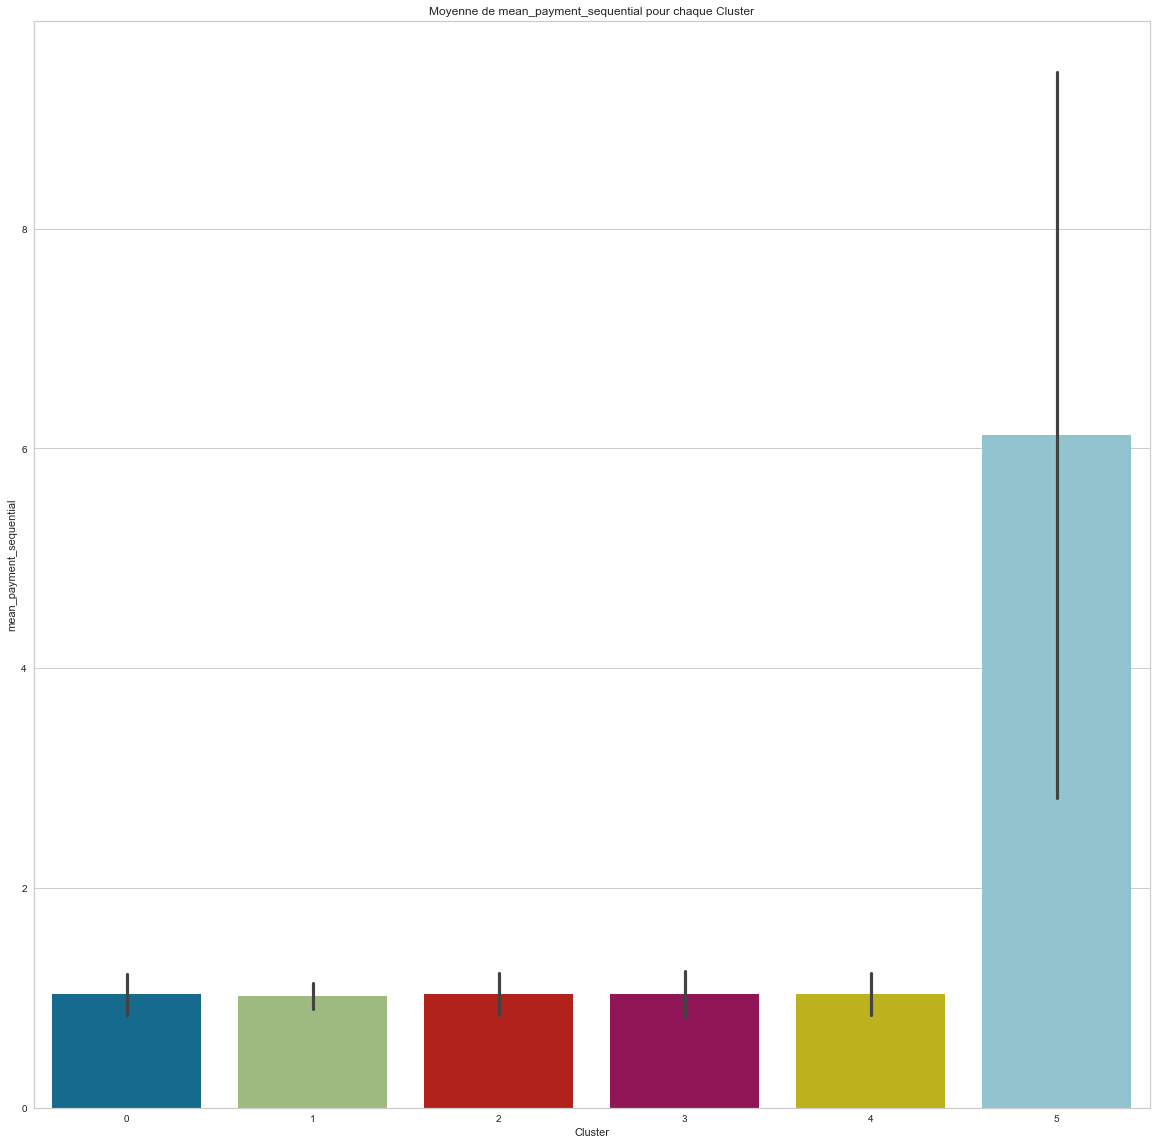

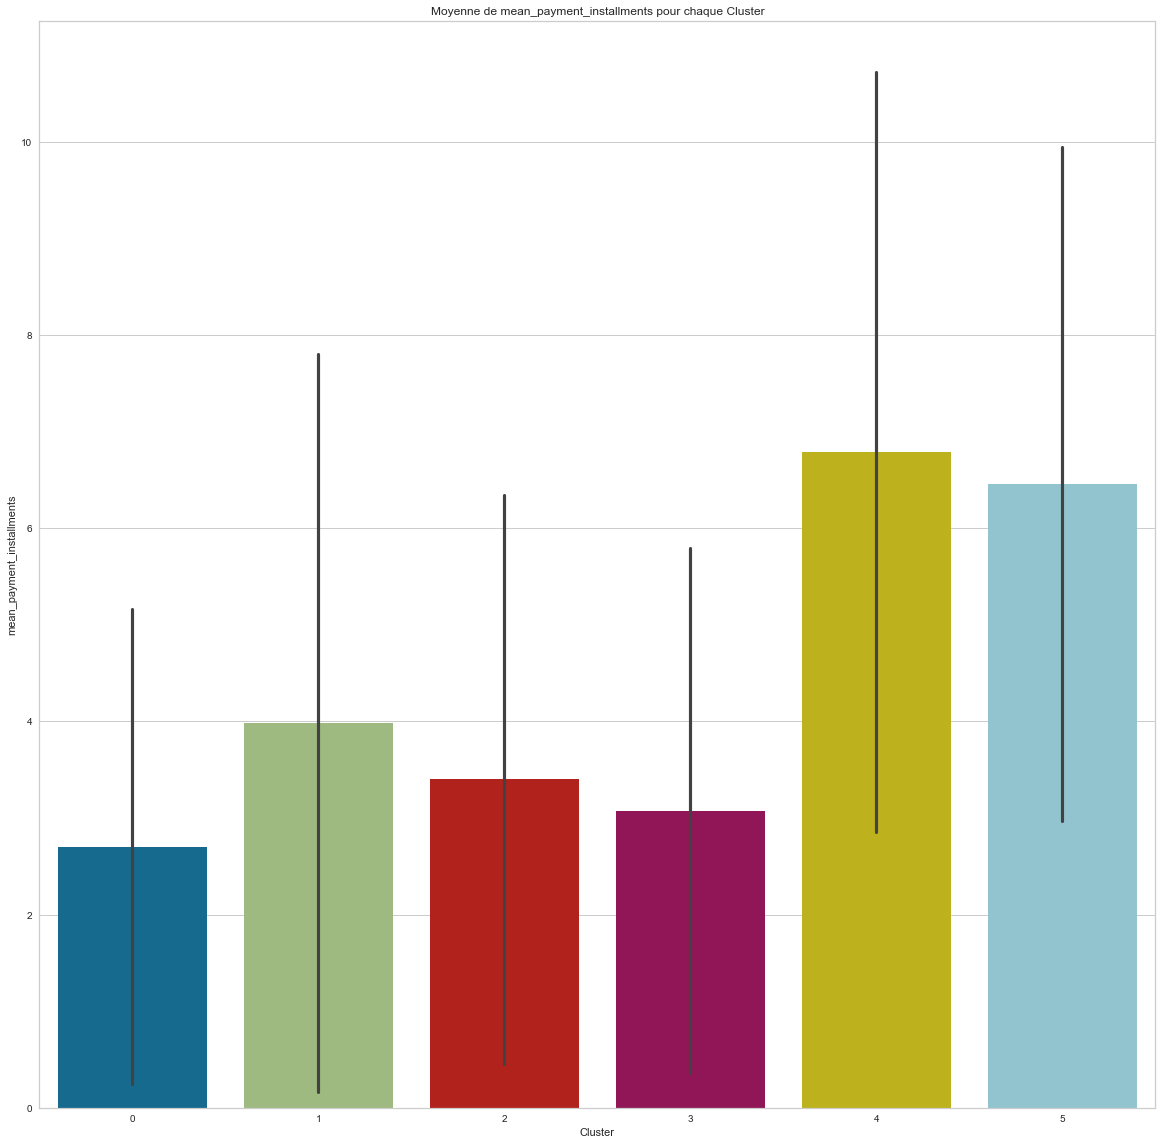

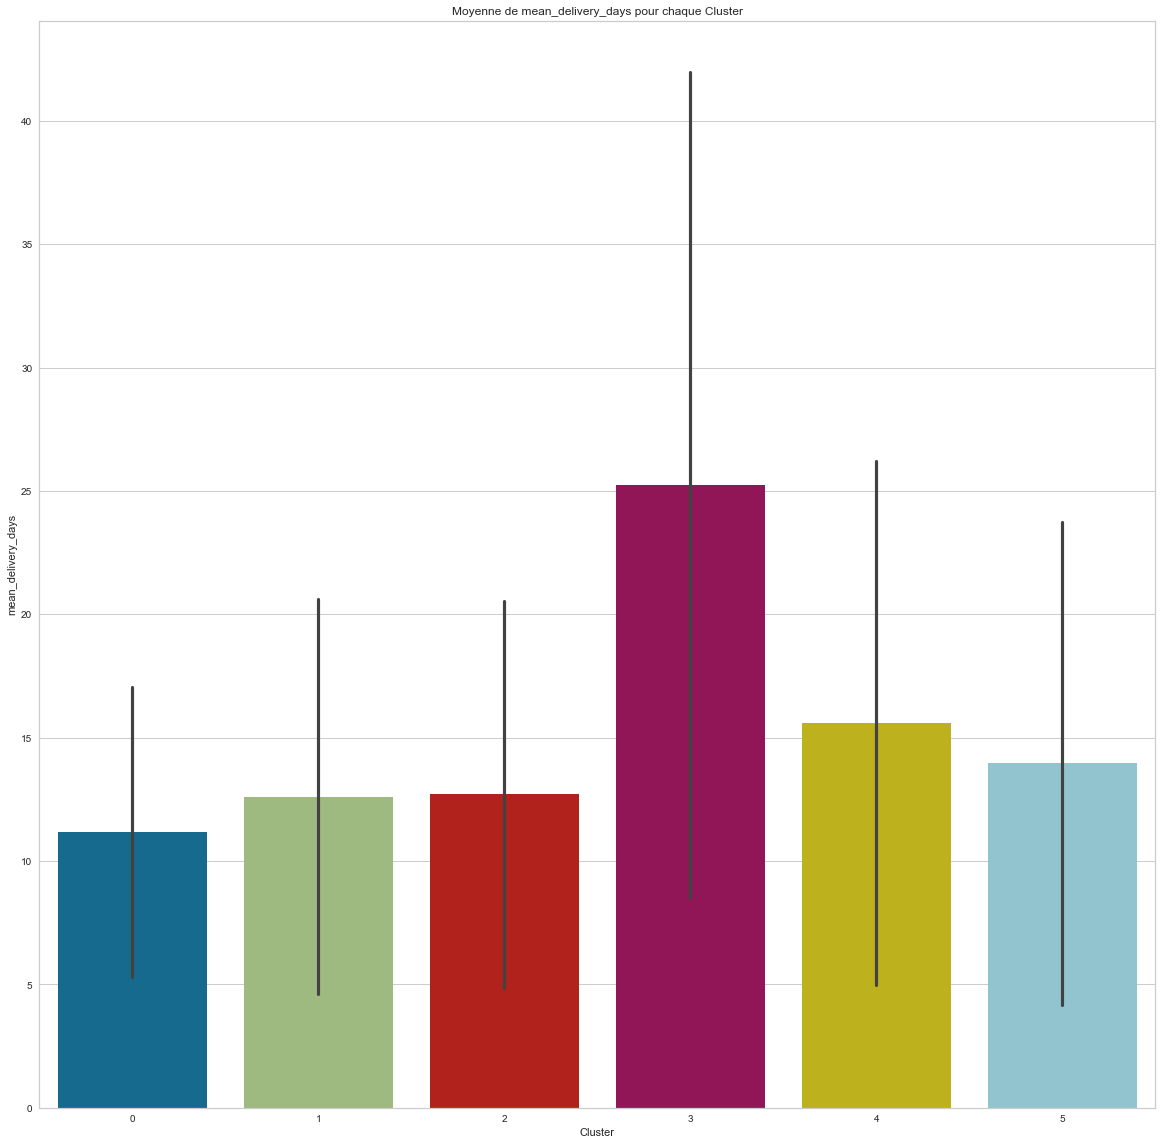

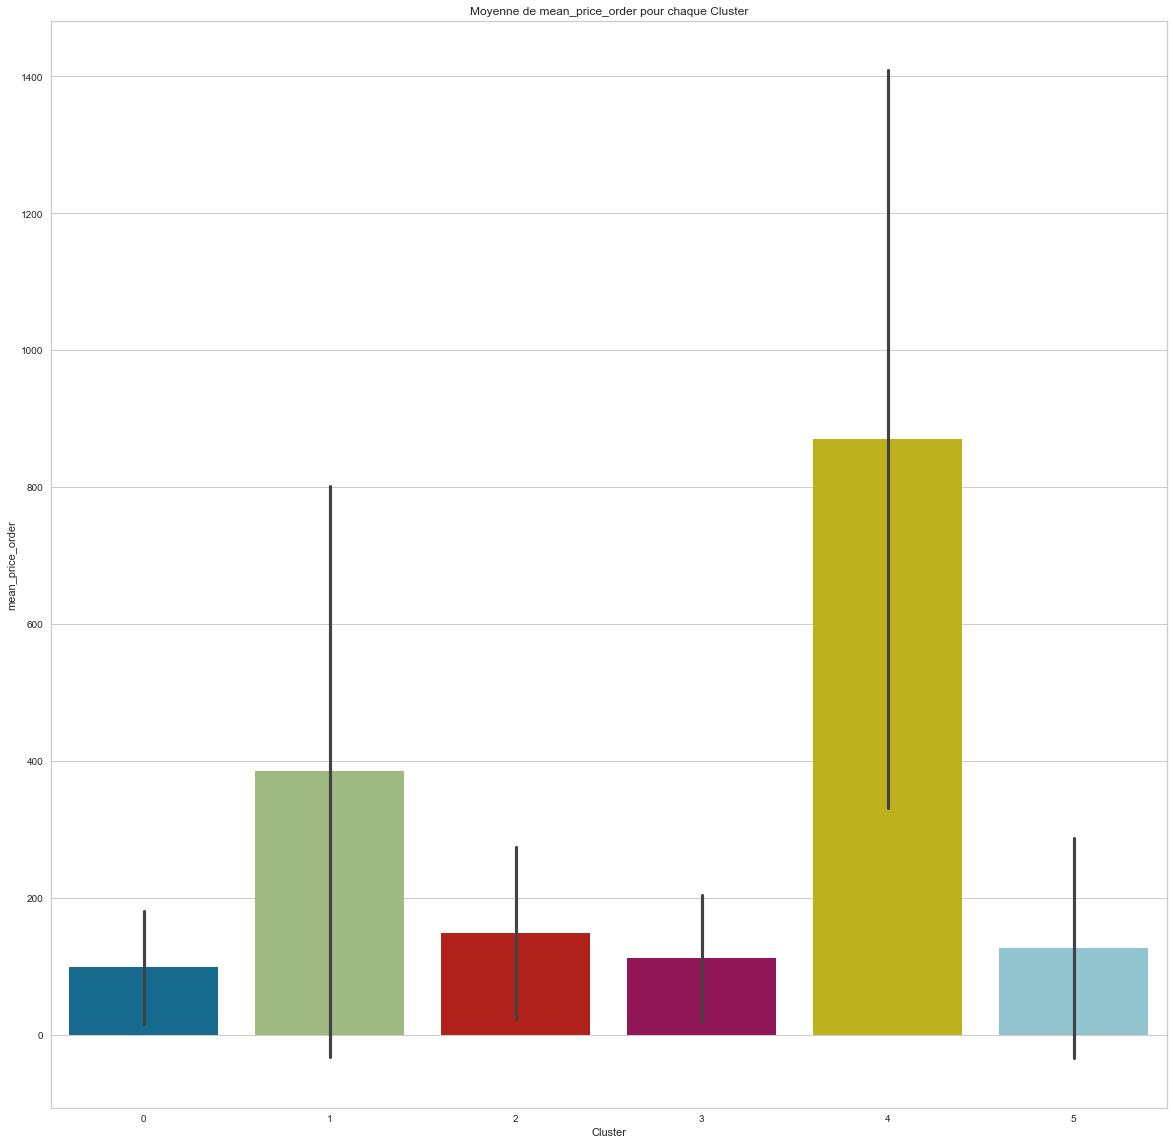

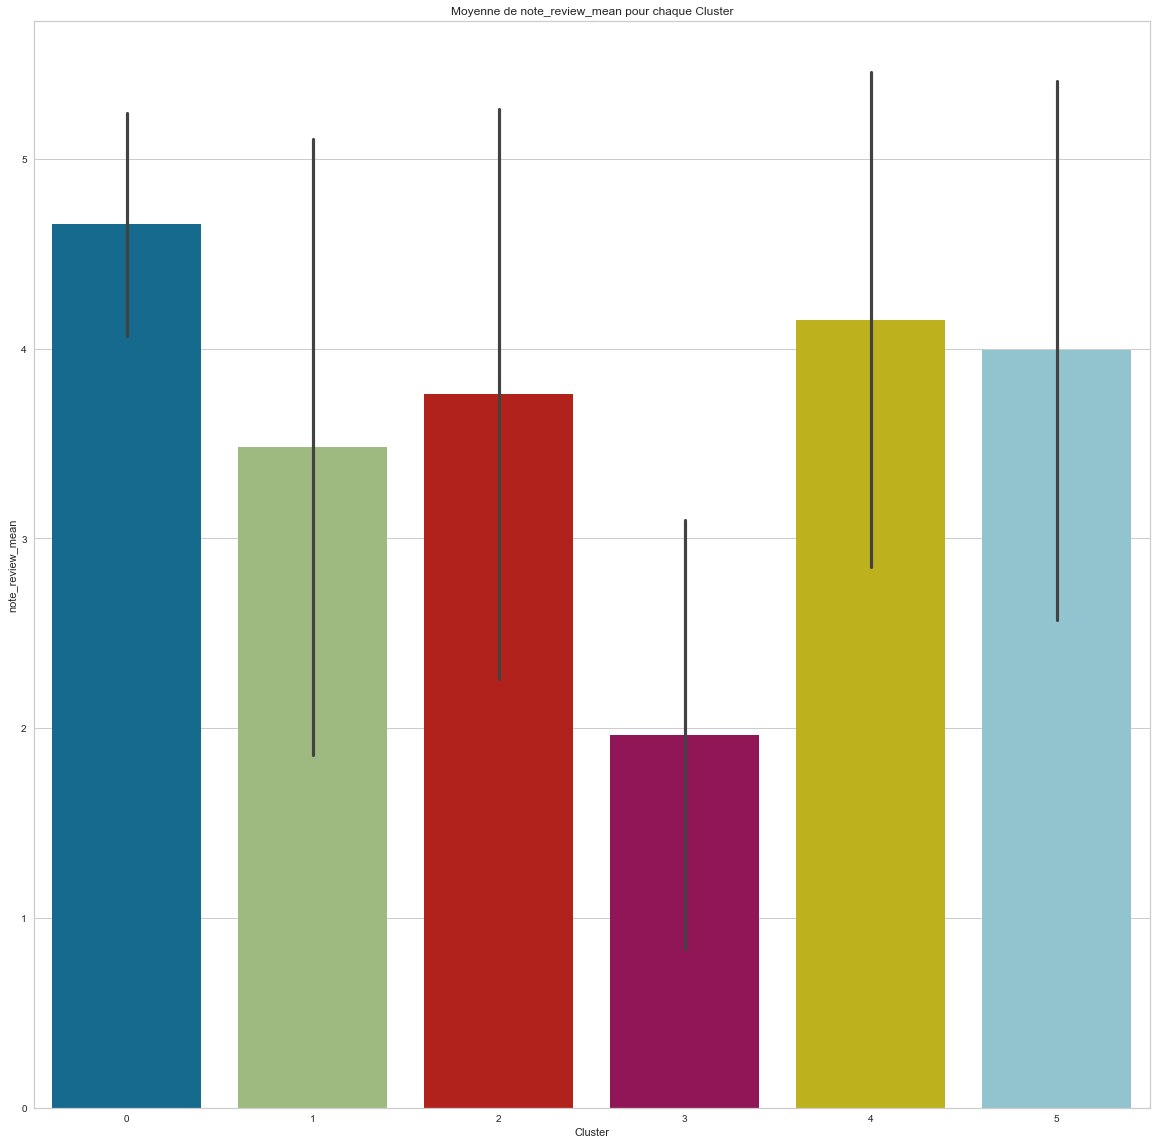

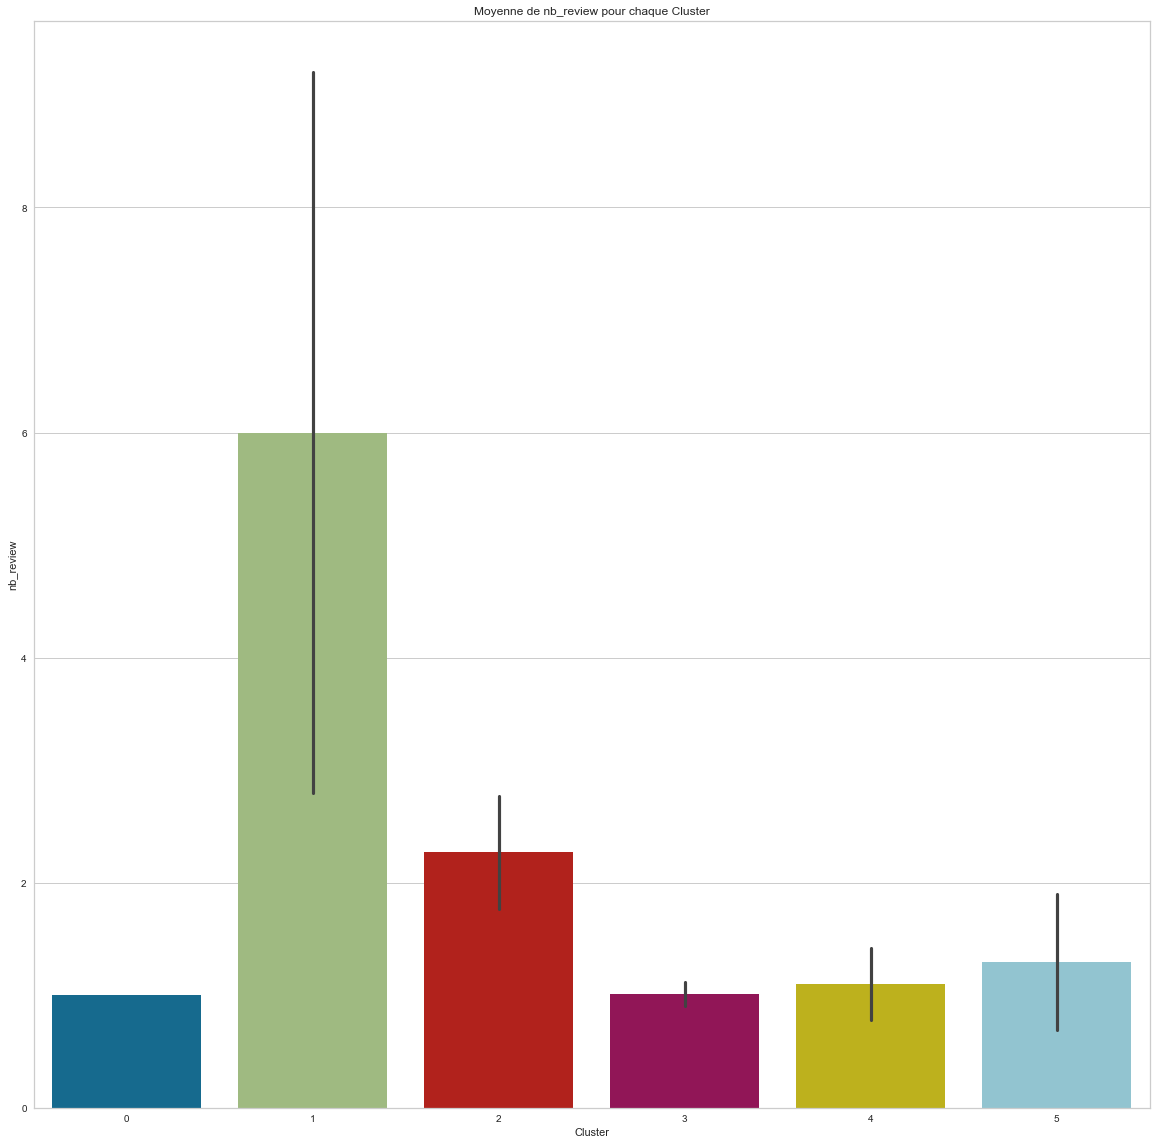

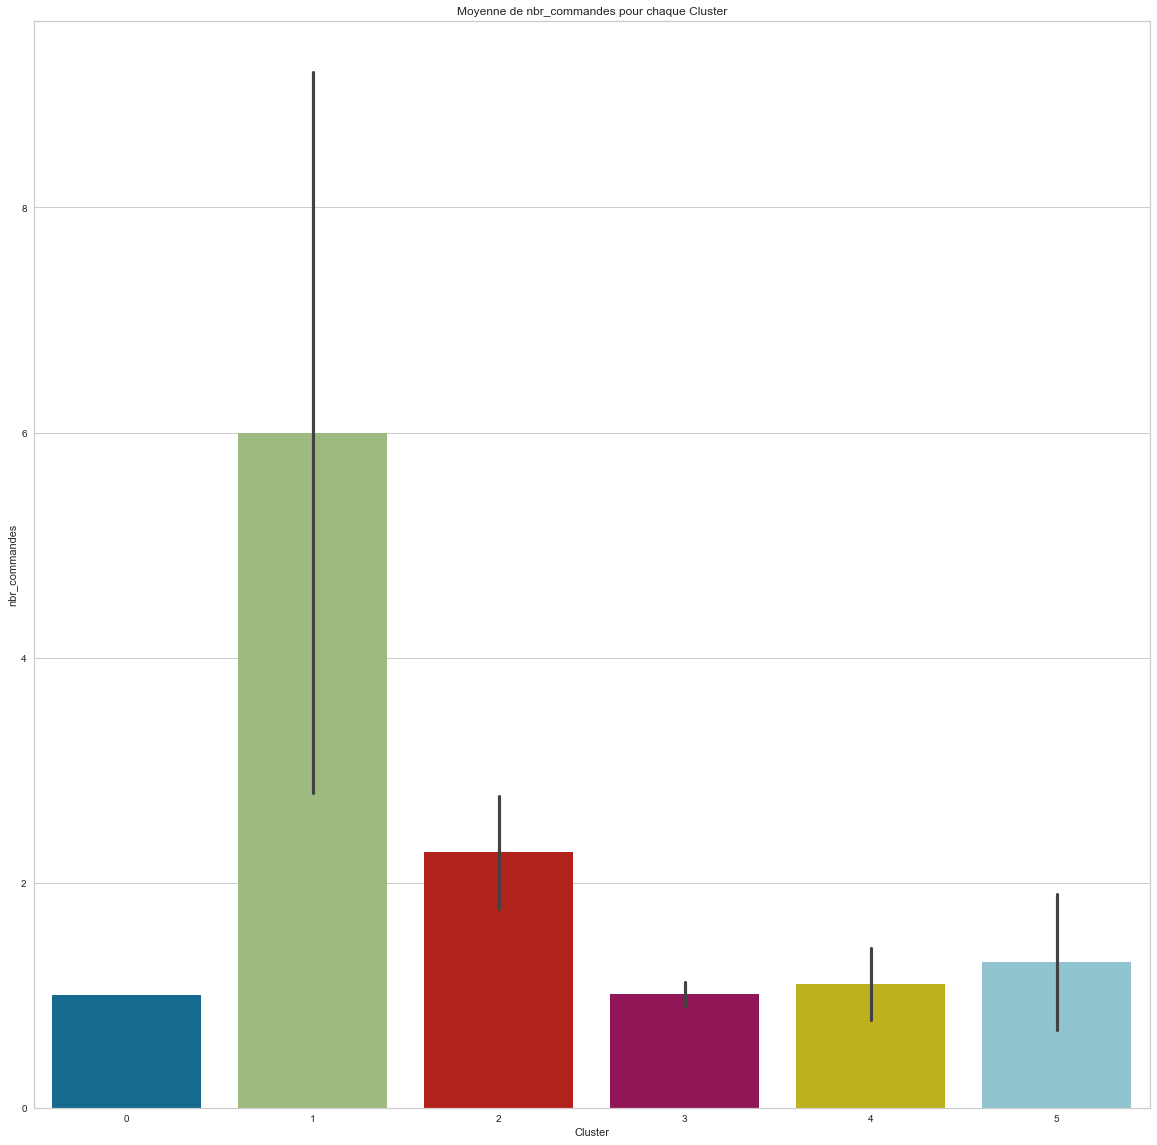

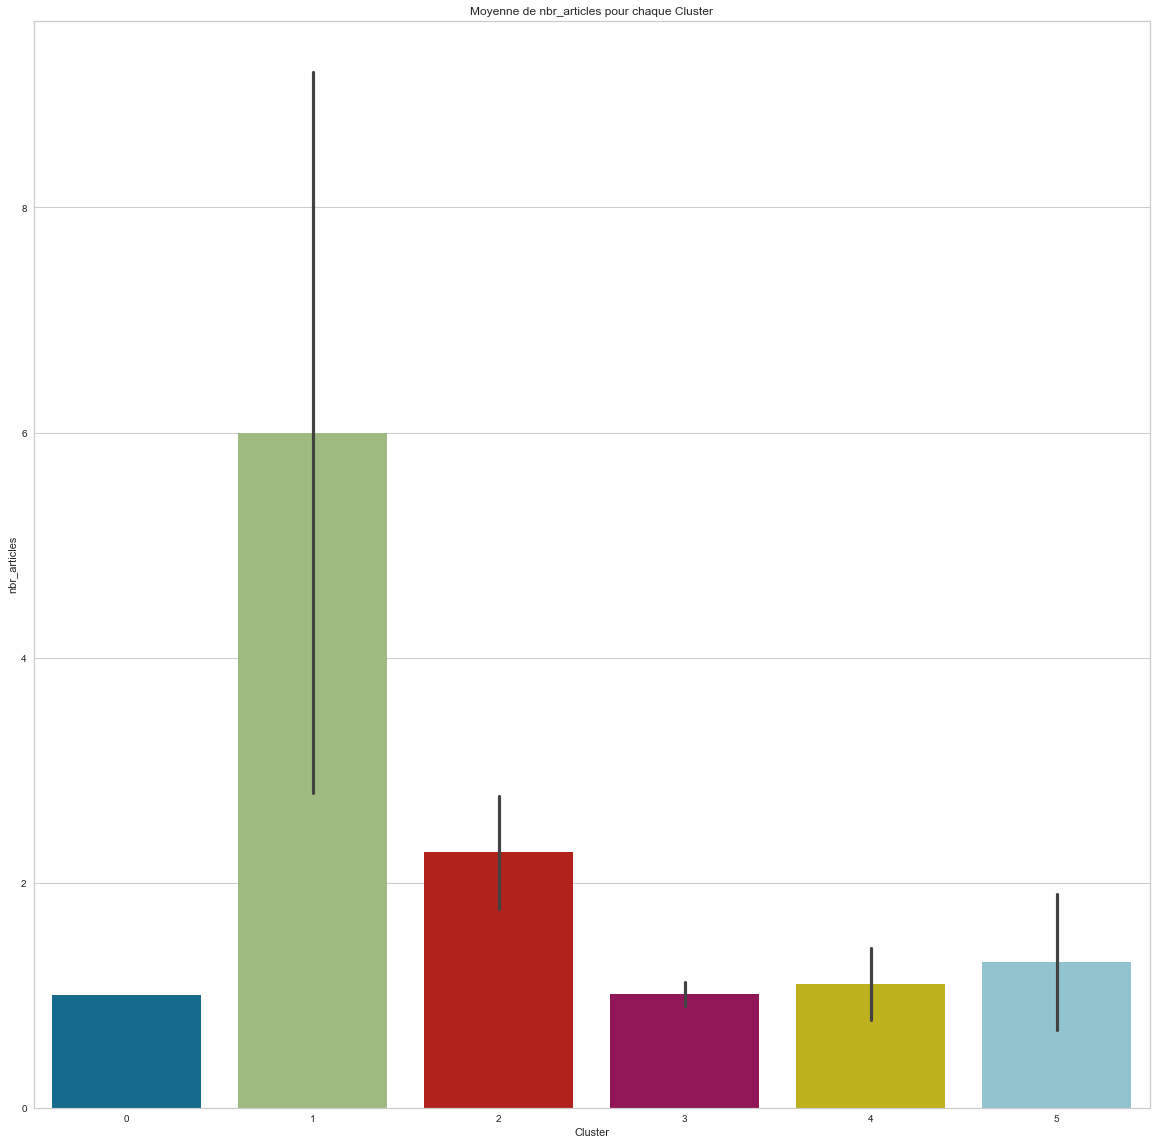

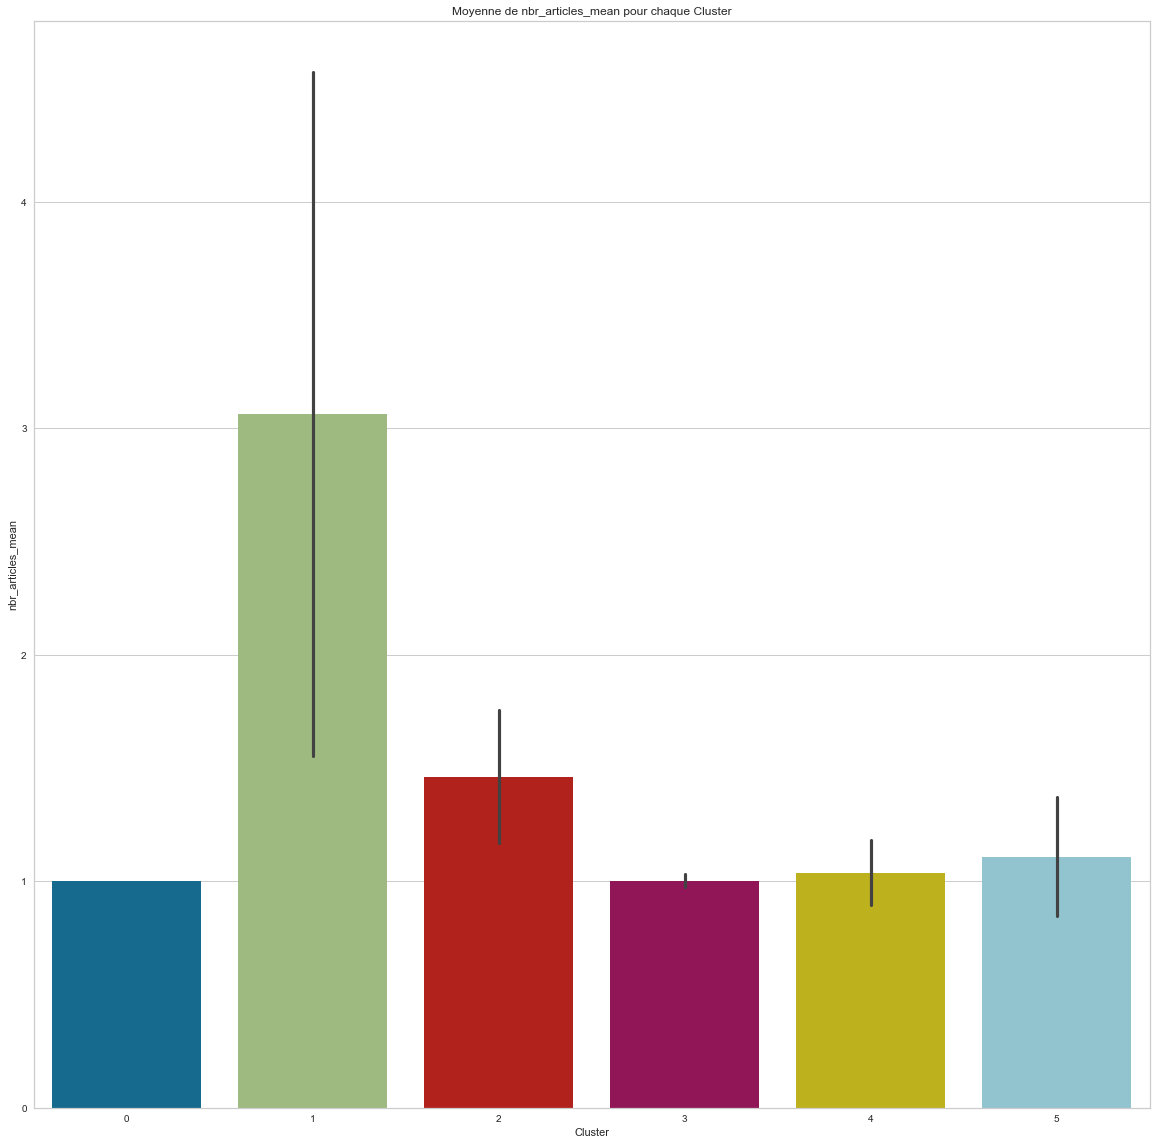

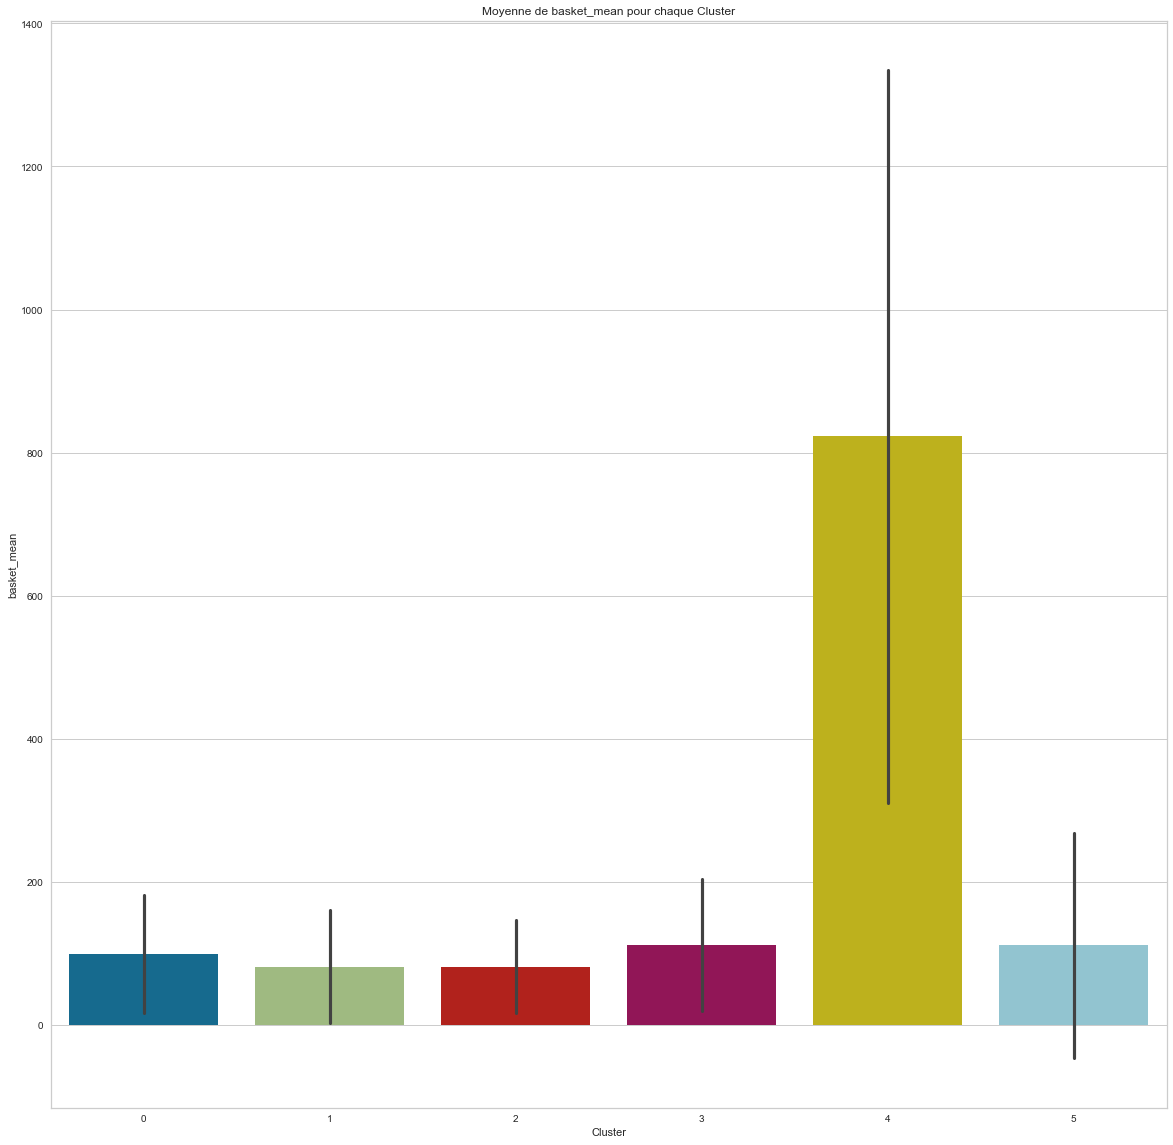

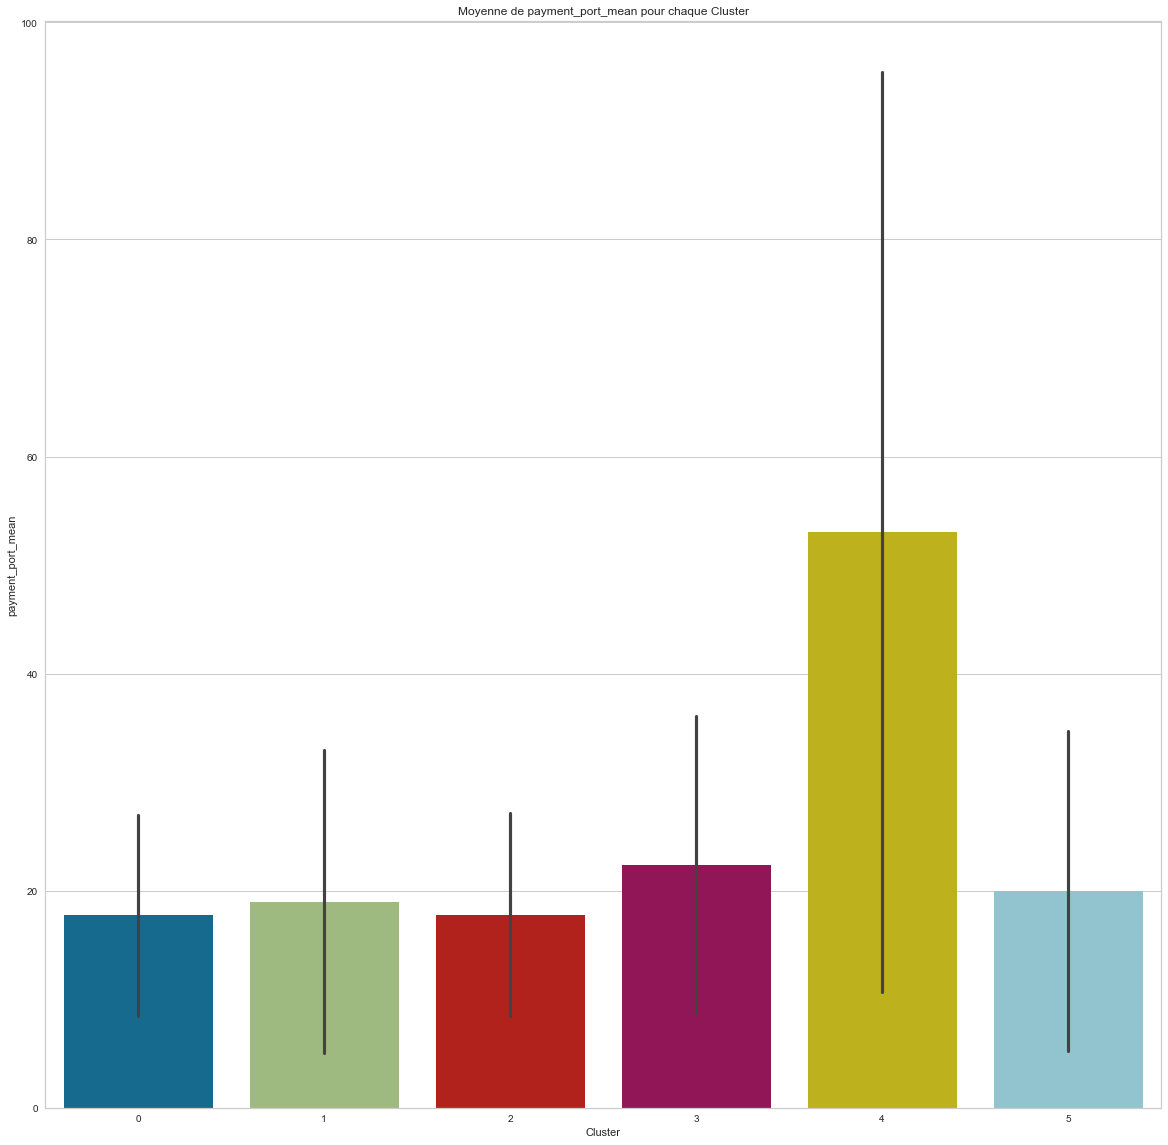

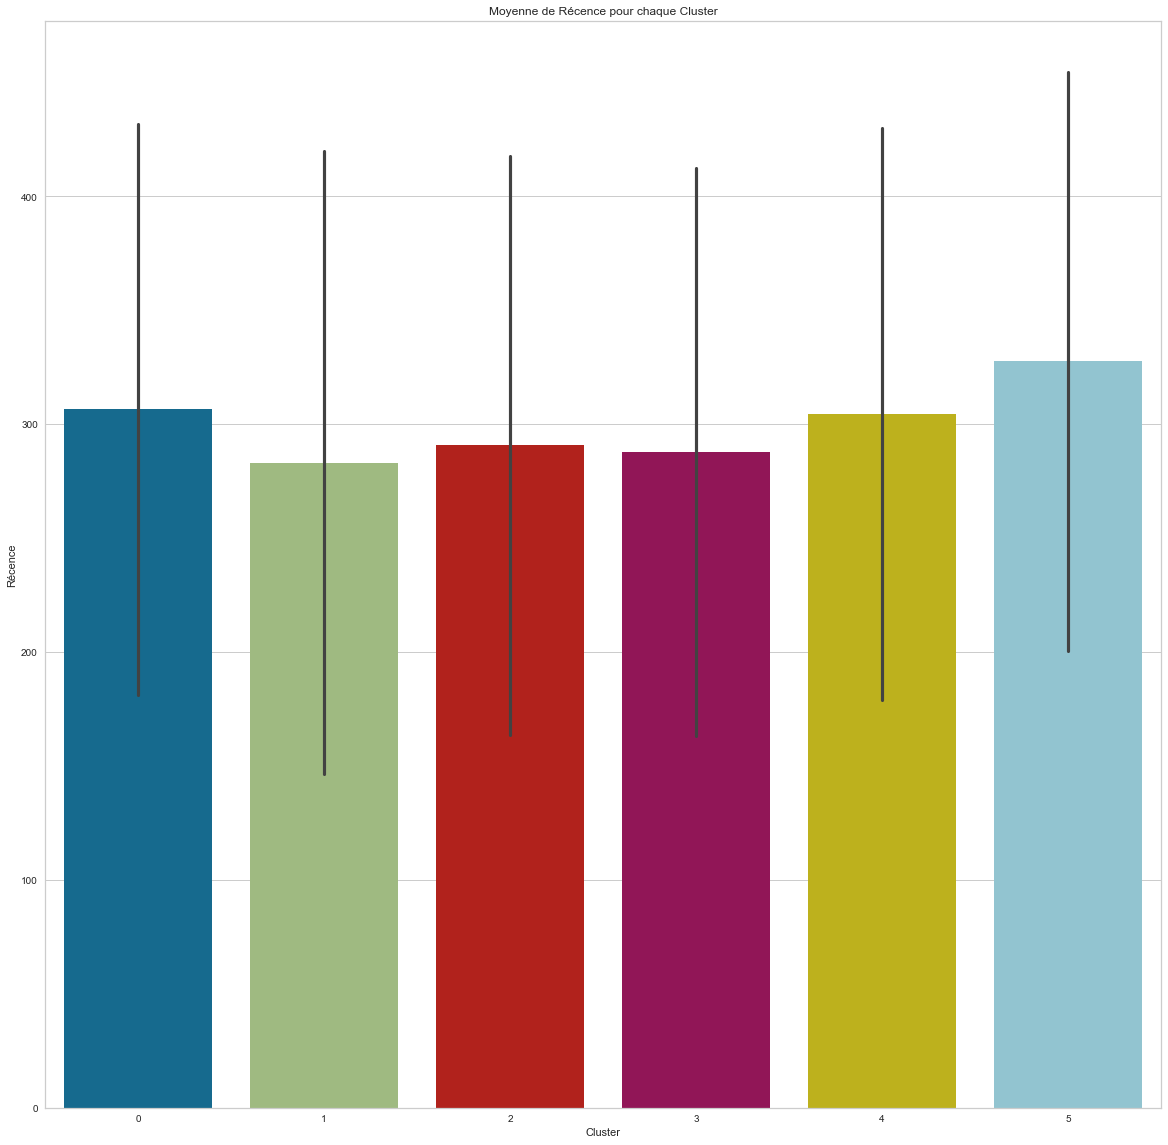

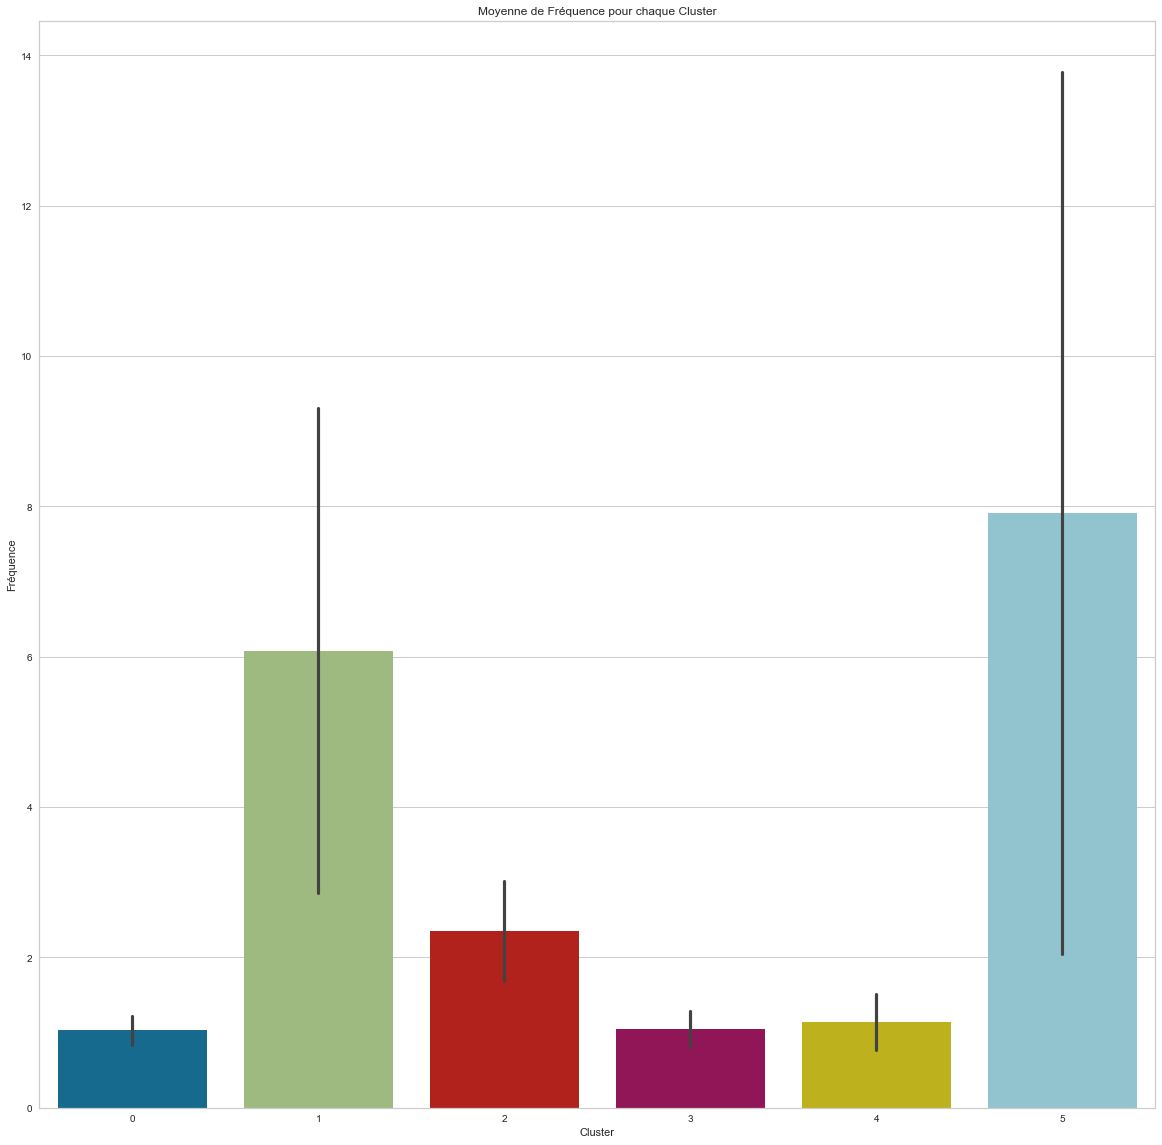

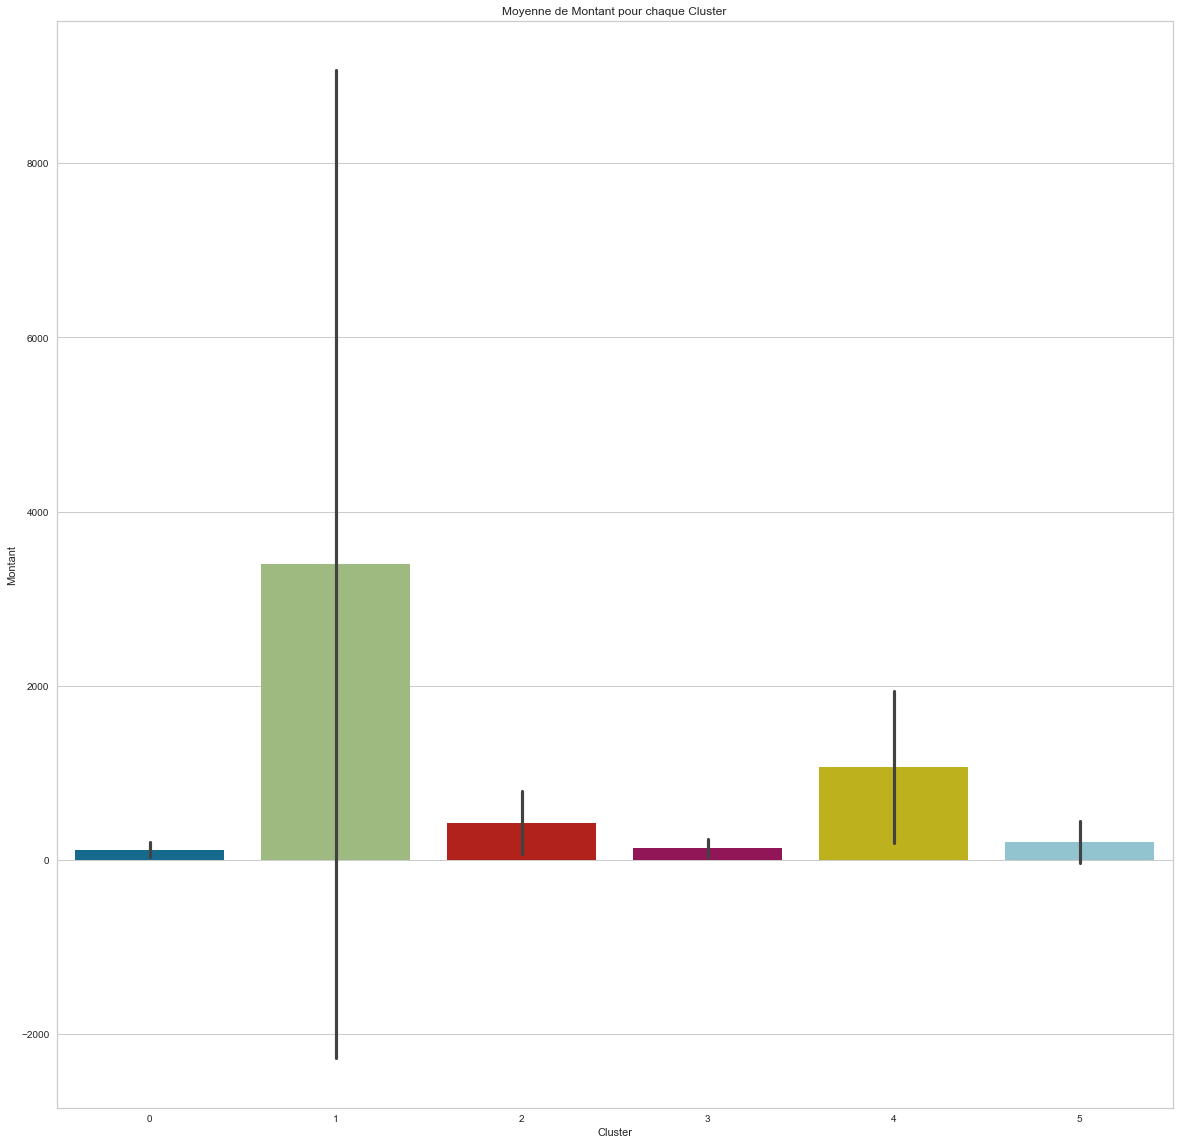

In [45]:
# Caractérisation :

for column in group_columns.columns:
    try:
        plt.figure(figsize=(20,20))
        titre = 'Moyenne de ' + str(column) + ' pour chaque Cluster' 
        plt.title(titre)
        sns.barplot(x = 'Cluster',
                    y = column,
                    data = K_old, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

# RETRAIT DES 8 DERNIERS MOIS DU DATASET :

In [46]:
# Copie et Visualisation :

KL_old = ocp[ocp['order_purchase_timestamp'] < '2017-12-29 14:52:00'].copy()

KL_old.head(10)

,customer_unique_id,Cluster,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
0,dc83fe8f72fb4388f079a2f9b586240c,0,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.90,15.790,475.0,1.0,45.69,2017-05-12 10:51:43
2,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,0,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.90,38.180,394.0,1.0,128.08,2017-07-31 18:47:11
4,29a3dfd056ce4de7aebfe9f2e78f8268,0,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.00,19.020,412.0,1.0,272.02,2017-07-14 09:18:17
10,f498e66a64908ad6fce1e90a0c1515ad,2,1.0,10.0,9.0,229.8,5.0,2.0,2.0,2.0,1.5,114.90,15.555,287.0,2.0,521.82,2017-11-15 19:10:47
12,a3a5841028004f8640c85093ce7f74d3,0,1.0,10.0,19.0,129.9,4.0,1.0,1.0,1.0,1.0,129.90,15.660,257.0,1.0,145.56,2017-12-16 13:38:19
13,1f620dda2a963087545df74707c61756,0,1.0,1.0,13.0,25.0,5.0,1.0,1.0,1.0,1.0,24.99,24.660,359.0,1.0,49.65,2017-09-05 09:04:16
14,e257ea35efcc4d9b3bcb3470c0ca1d84,0,1.0,10.0,7.0,250.0,4.0,1.0,1.0,1.0,1.0,249.99,19.880,527.0,1.0,269.87,2017-03-21 11:38:33
15,d5a9eccfa0ca0ec79d59b81e98d83911,3,1.0,7.0,28.0,250.0,2.0,1.0,1.0,1.0,1.0,249.99,30.100,512.0,1.0,280.09,2017-04-05 00:11:11
17,130ed01dc02c7f30cea9a7faabda07b7,0,1.0,1.0,6.0,39.9,5.0,1.0,1.0,1.0,1.0,39.90,9.340,373.0,1.0,49.24,2017-08-22 11:03:51
20,b29d843f62c1dfc64c60642579e7c8fa,0,1.0,8.0,7.0,234.8,4.0,1.0,1.0,1.0,1.0,234.83,13.140,283.0,1.0,247.97,2017-11-20 12:47:55


In [47]:
# Groupement et Moyenne :

group_columns = KL_old.groupby('Cluster').mean()

group_columns

,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant
Cluster,,,,,,,,,,,,,,
0,1.031625,2.831625,11.050818,99.588404,4.653726,1.000000,1.000000,1.000000,1.000000,99.585751,17.695531,382.076627,1.031625,117.309304
1,1.019315,4.219707,11.767021,358.138250,3.666334,5.761667,5.761667,5.761667,2.999043,81.698895,18.599590,356.880833,5.857500,2794.571042
2,1.041911,3.513886,12.266818,148.999333,3.840540,2.288777,2.288777,2.288777,1.461190,81.469491,17.785995,358.914863,2.384226,428.782435
3,1.045005,3.260337,23.778632,112.567435,2.023235,1.010611,1.010611,1.010611,1.001829,112.126268,22.127495,374.944018,1.056348,136.538994
4,1.037396,6.927978,14.905125,888.799584,4.233380,1.114958,1.114958,1.114958,1.040166,836.294612,51.757285,379.454294,1.155125,1110.107161
5,6.393750,6.800000,13.981250,130.610000,4.000000,1.387500,1.387500,1.387500,1.137500,110.287313,20.814187,384.800000,8.775000,229.950125


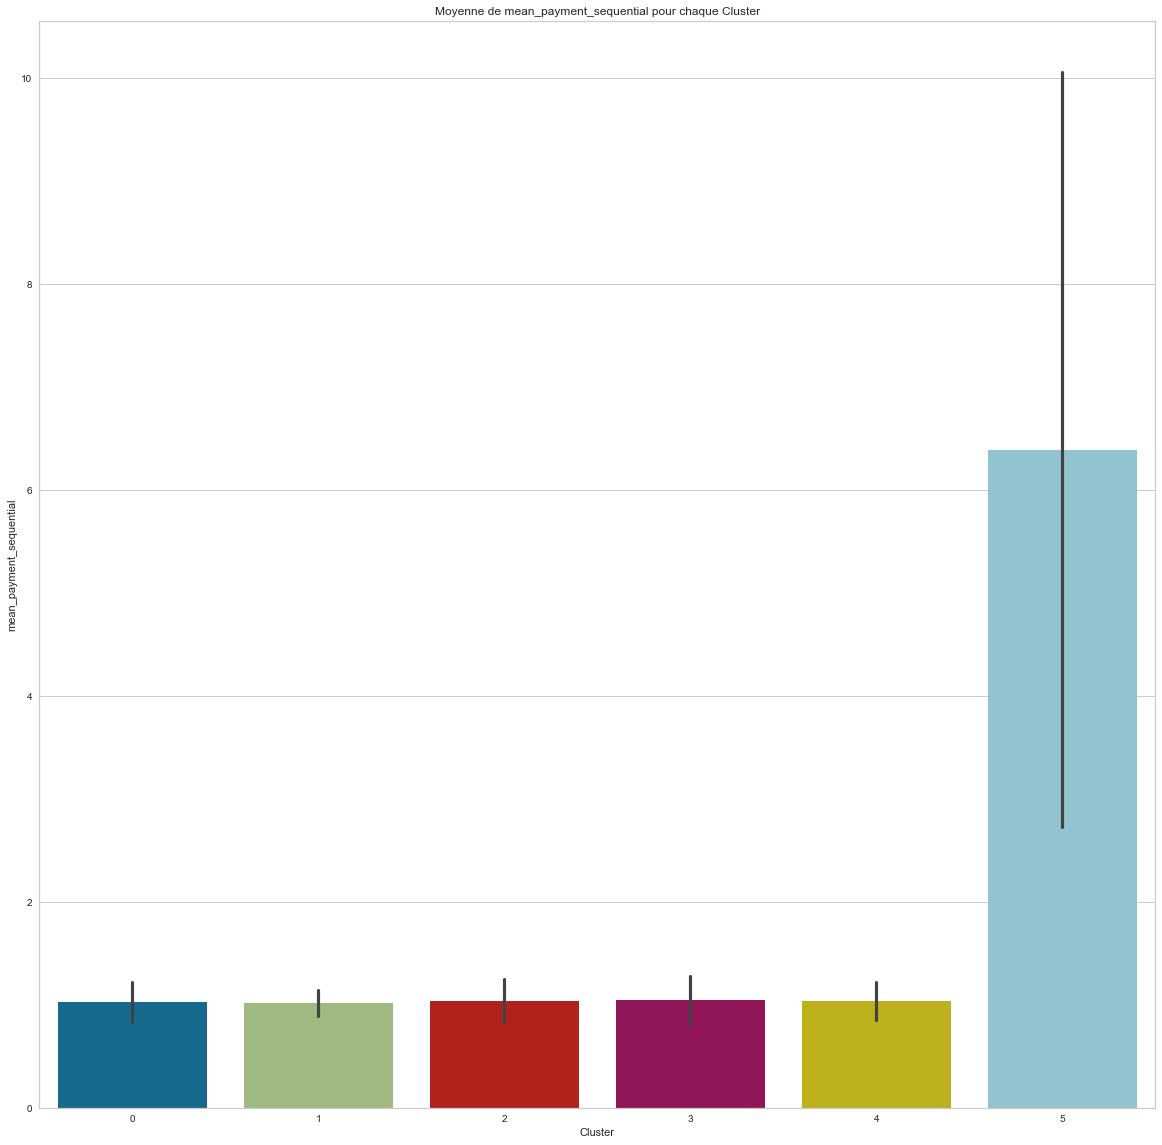

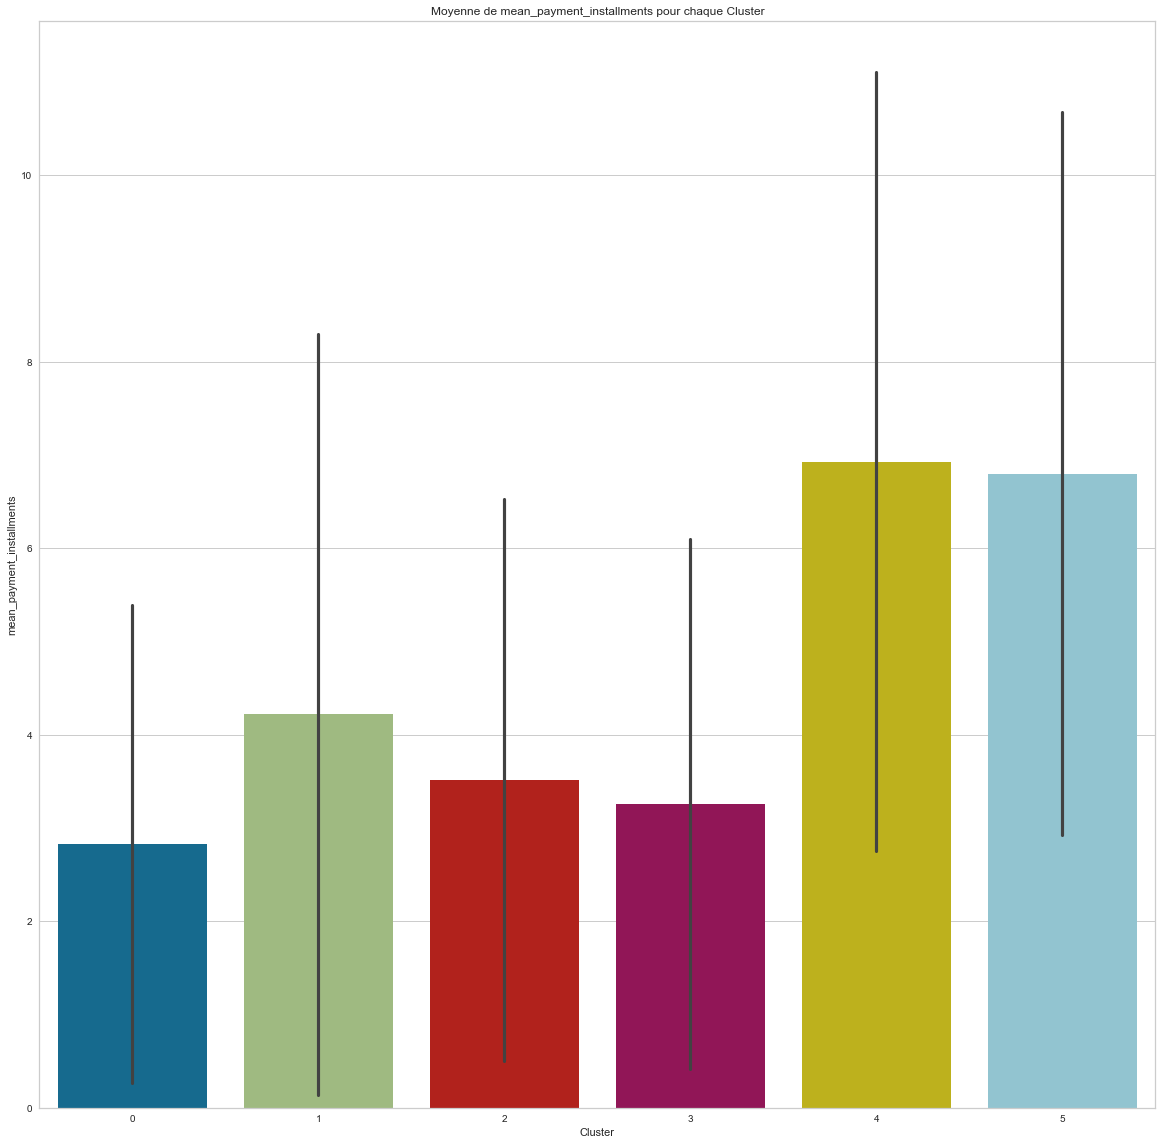

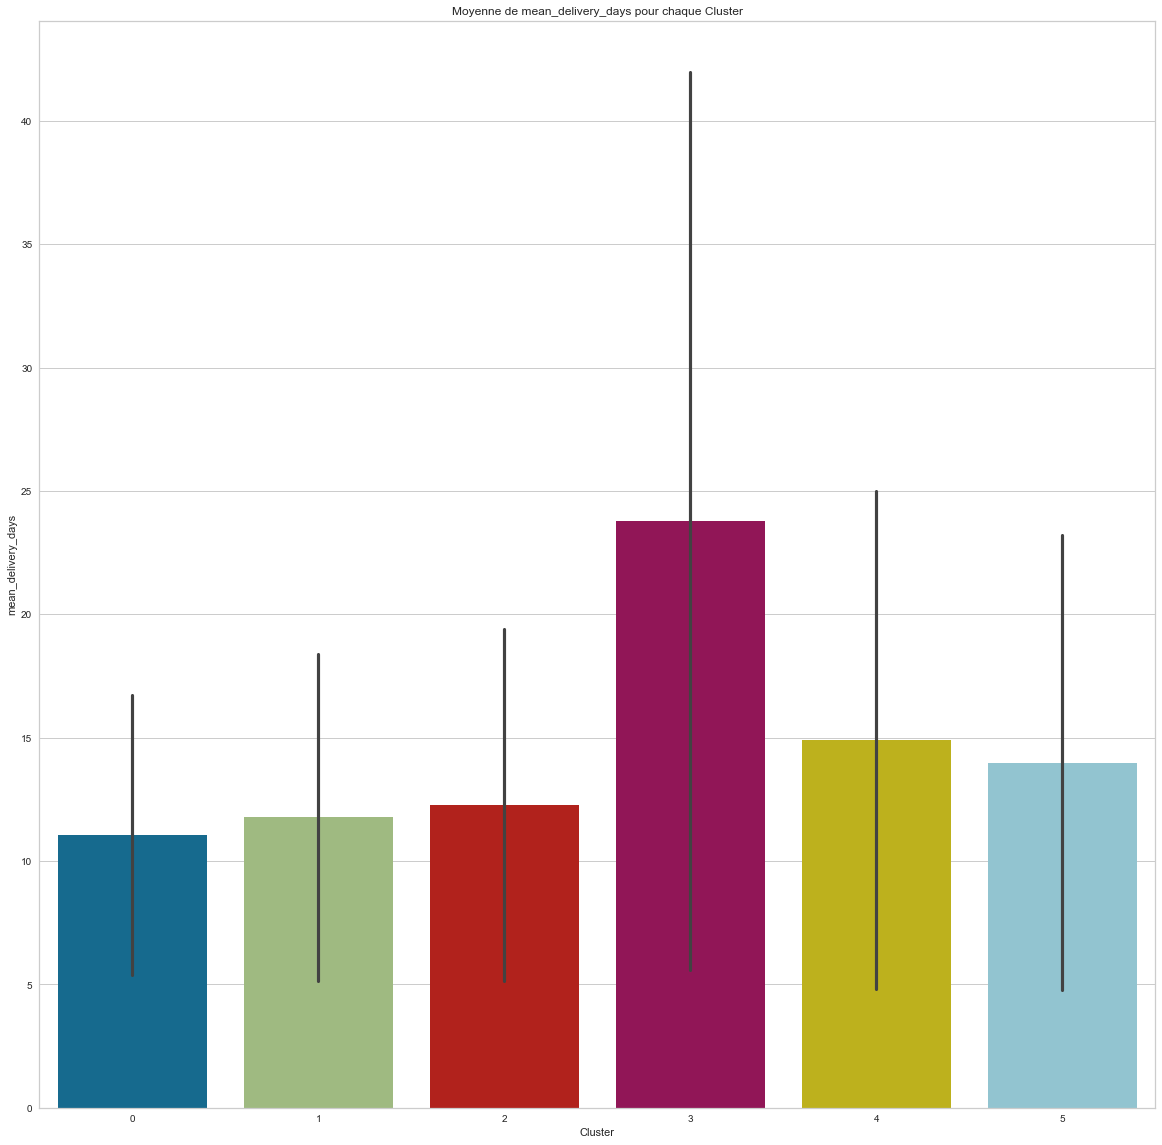

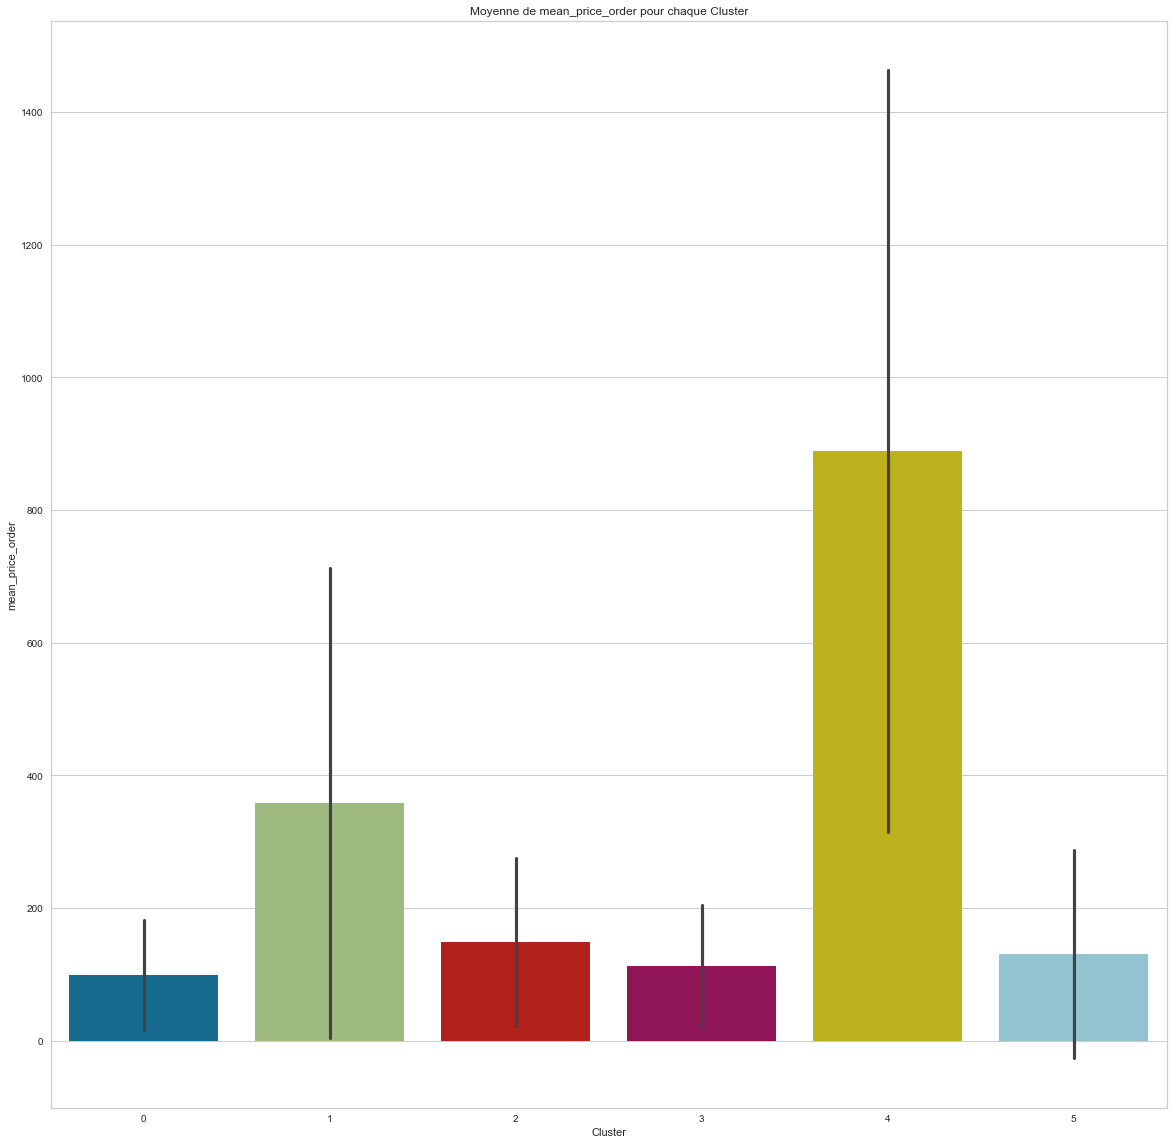

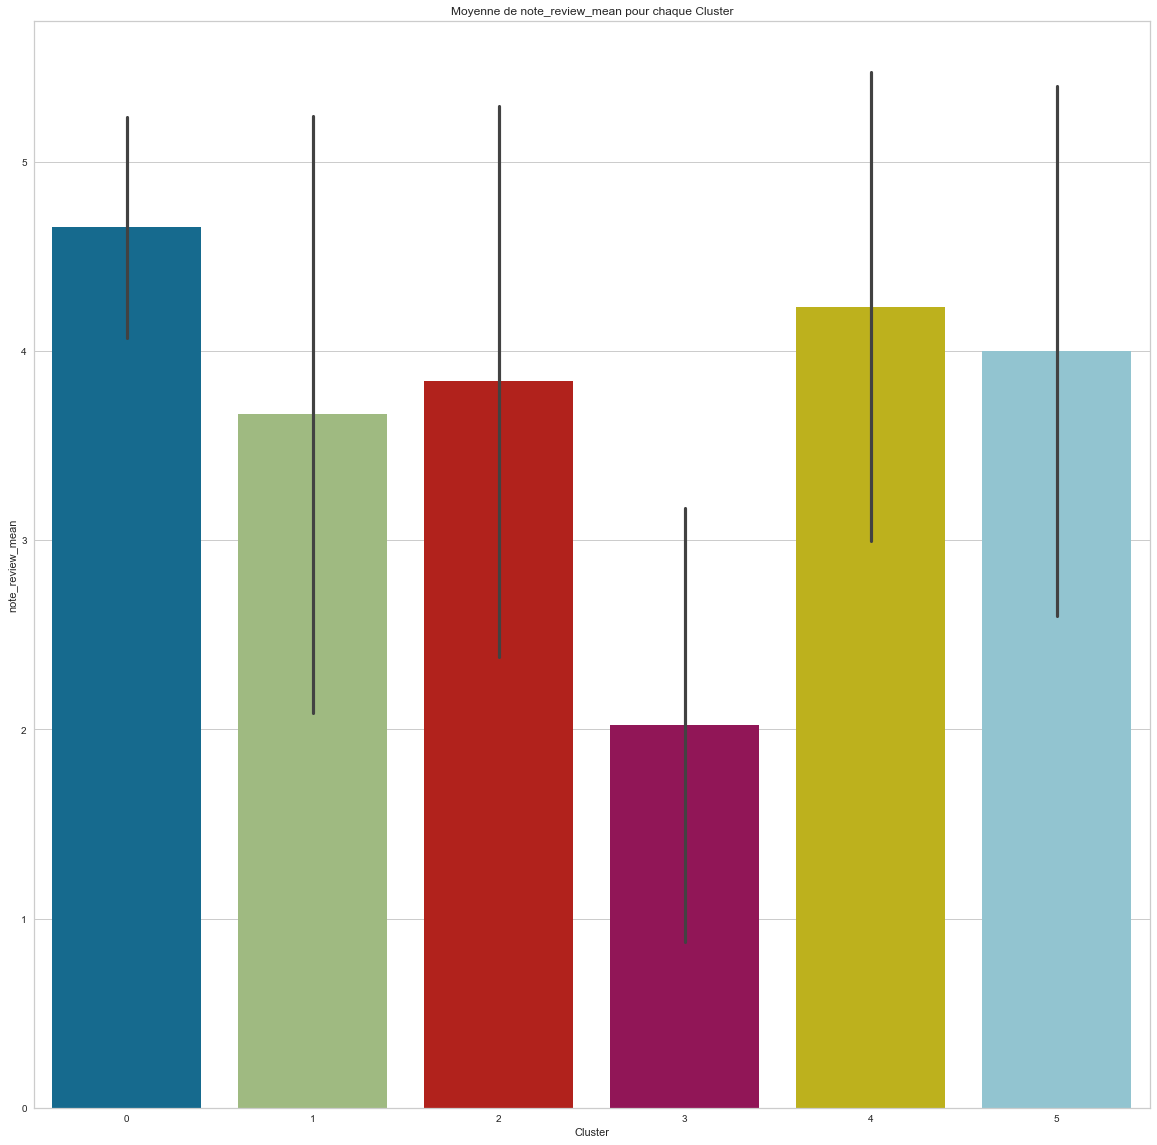

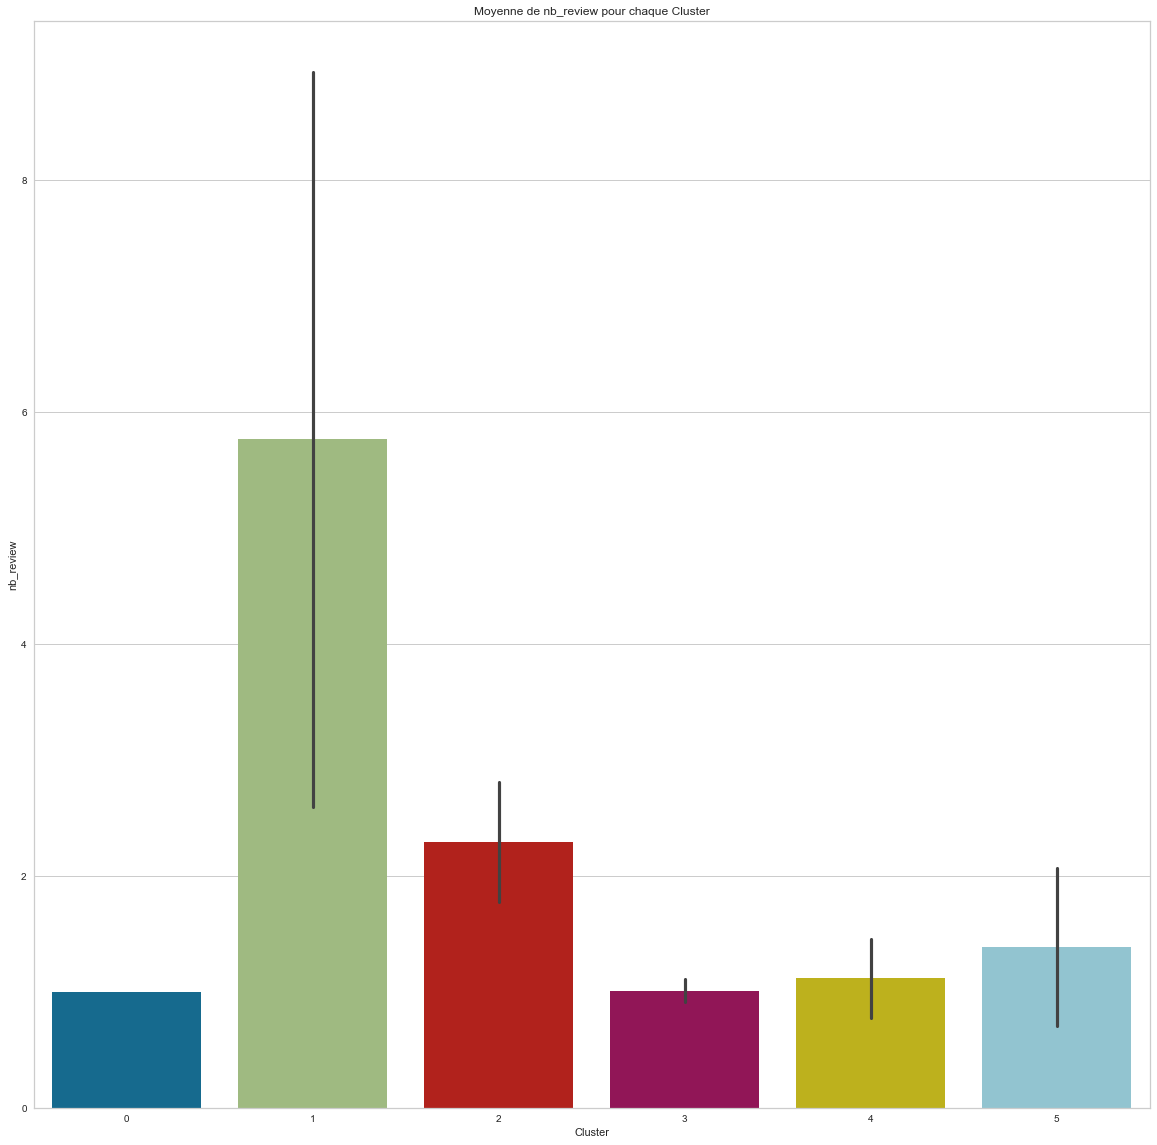

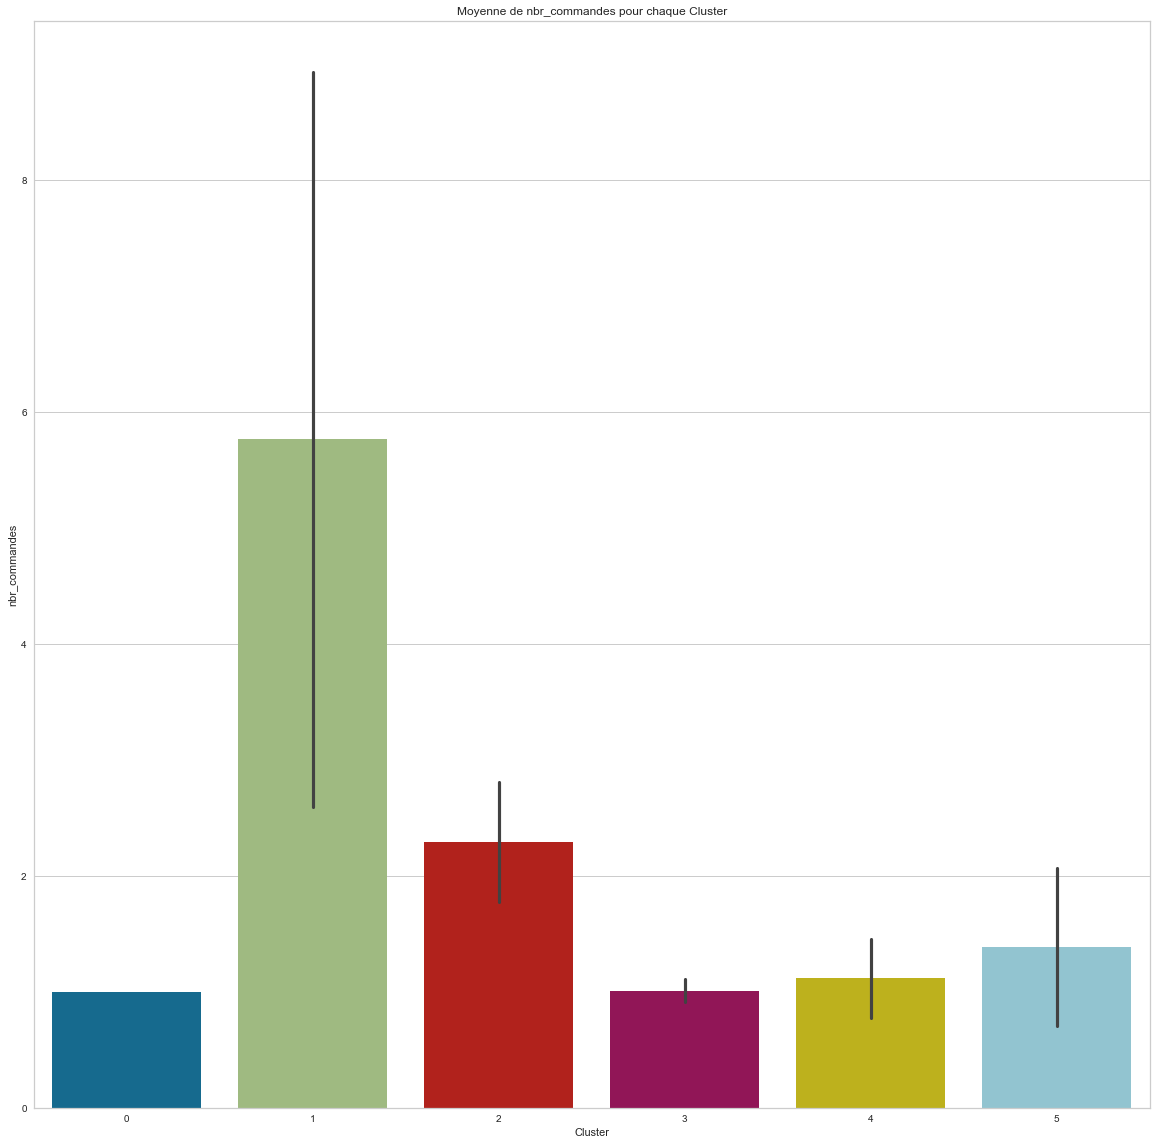

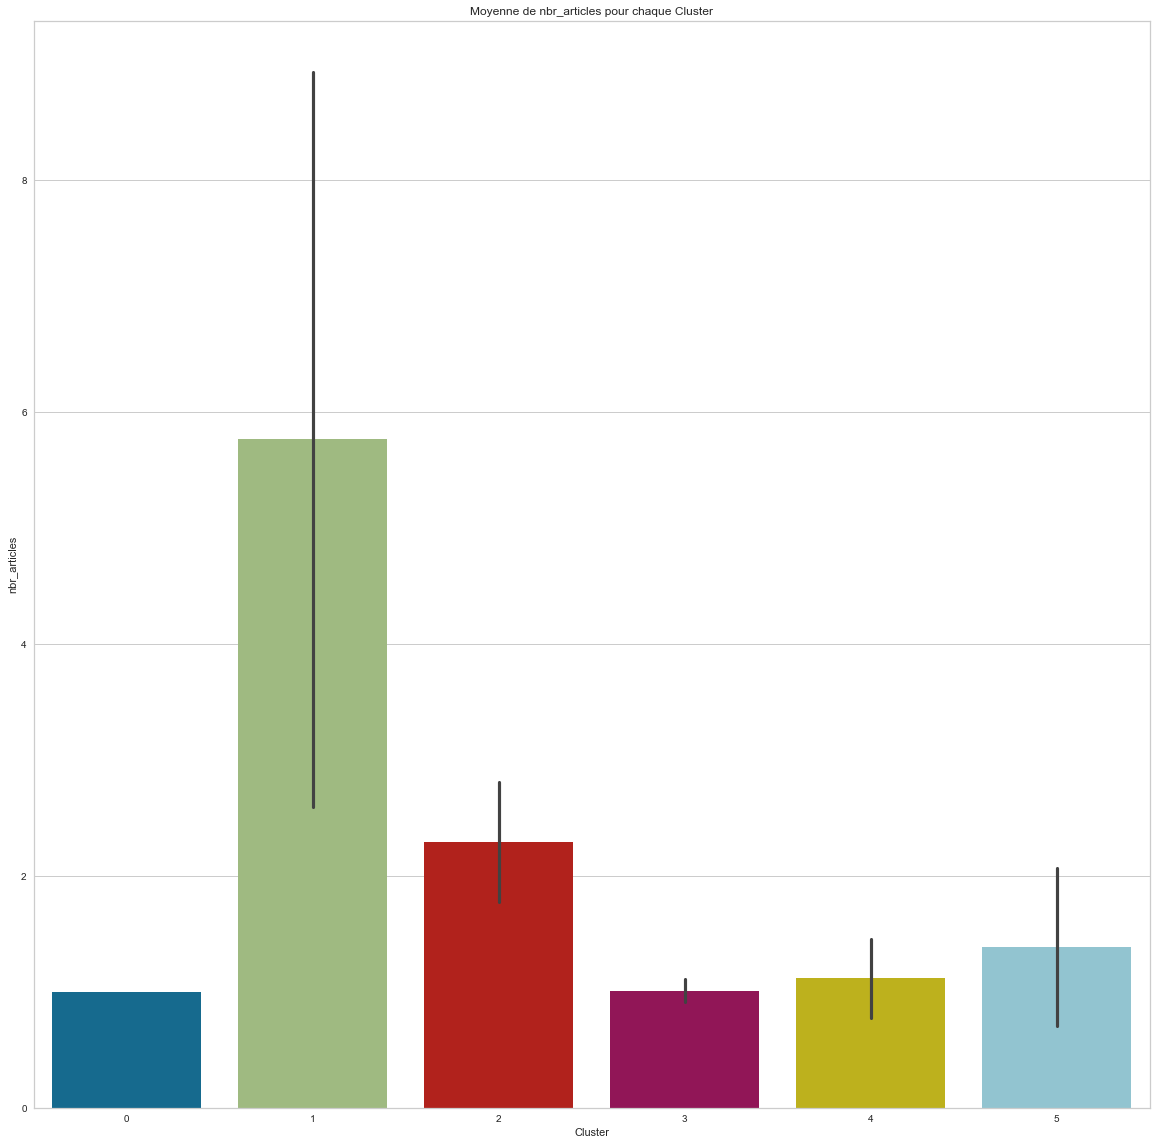

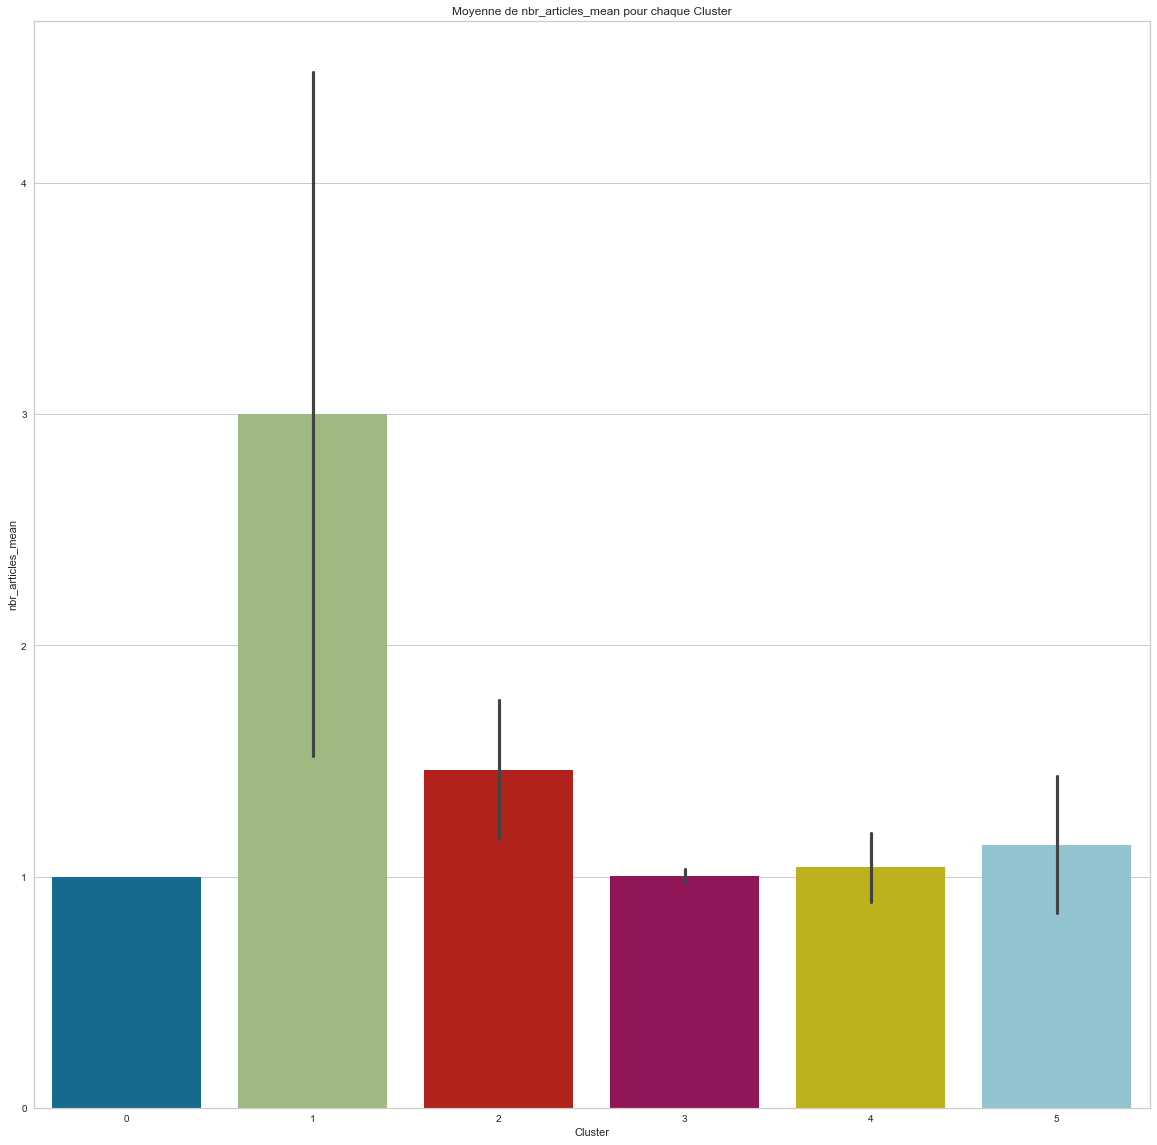

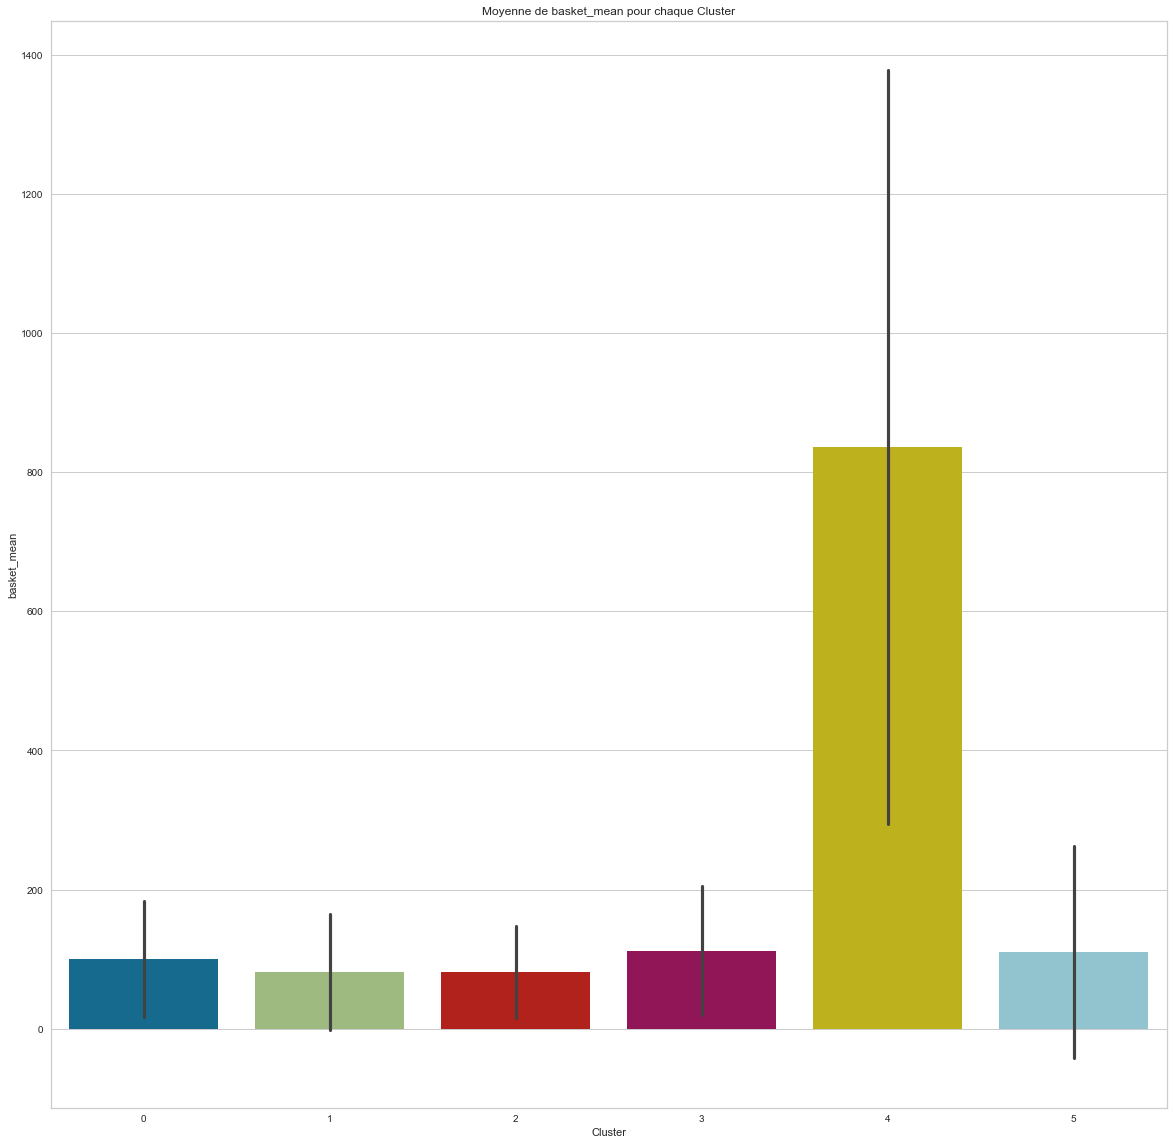

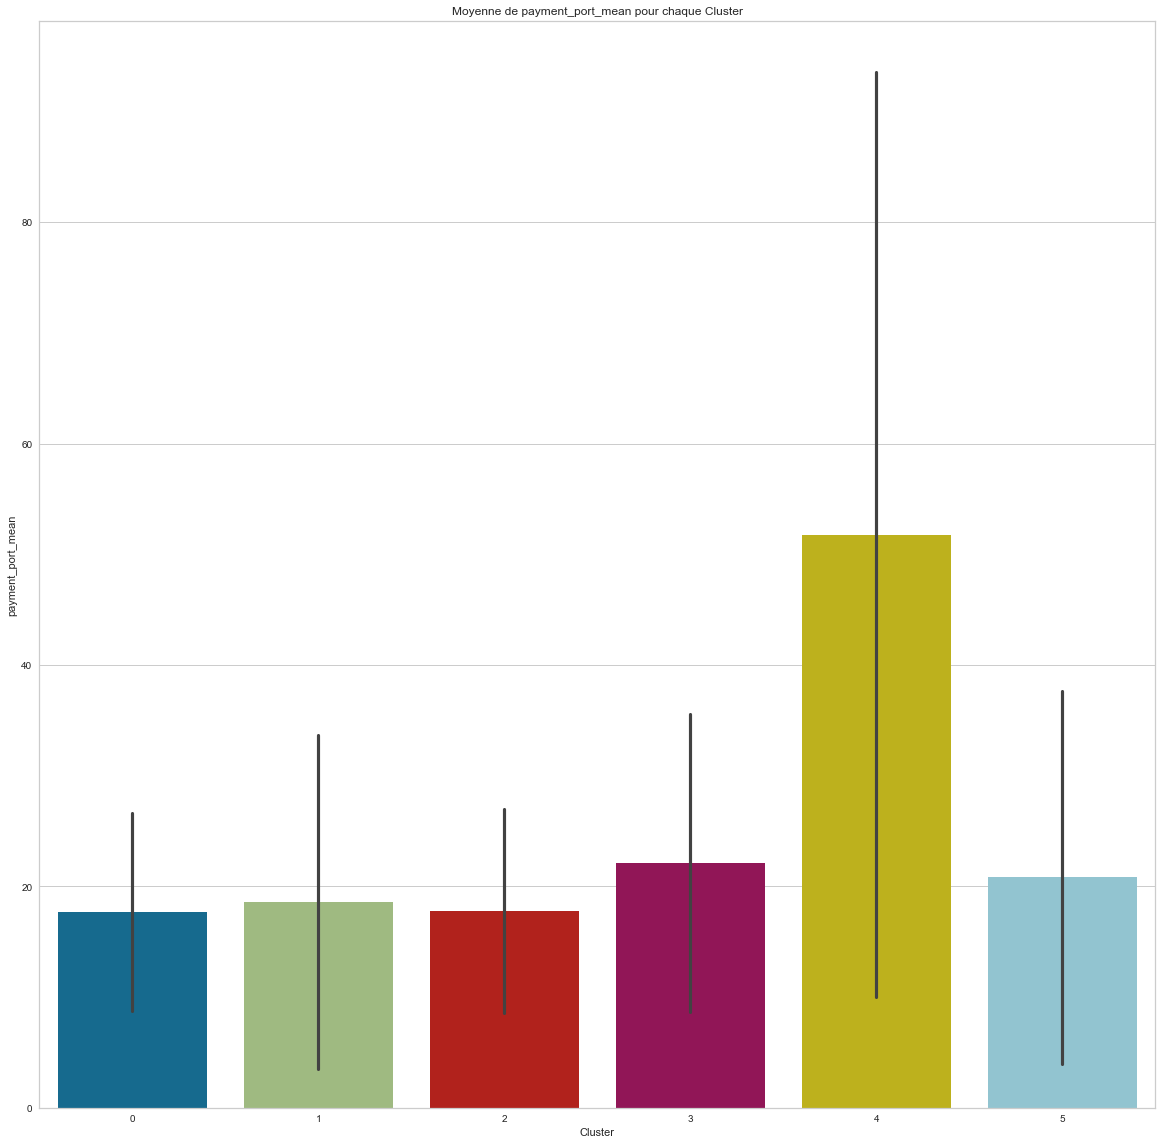

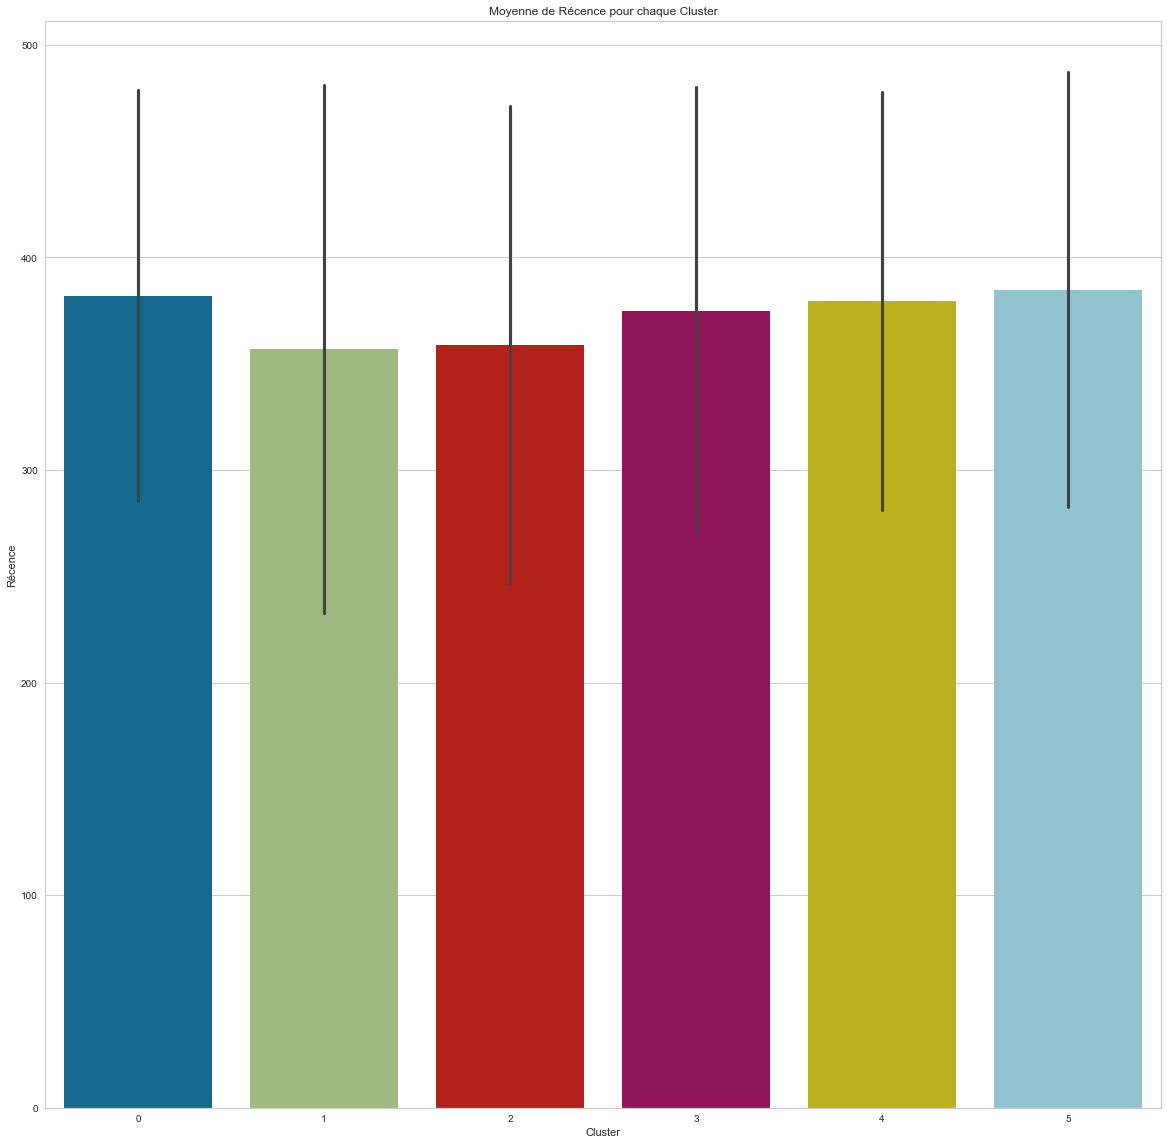

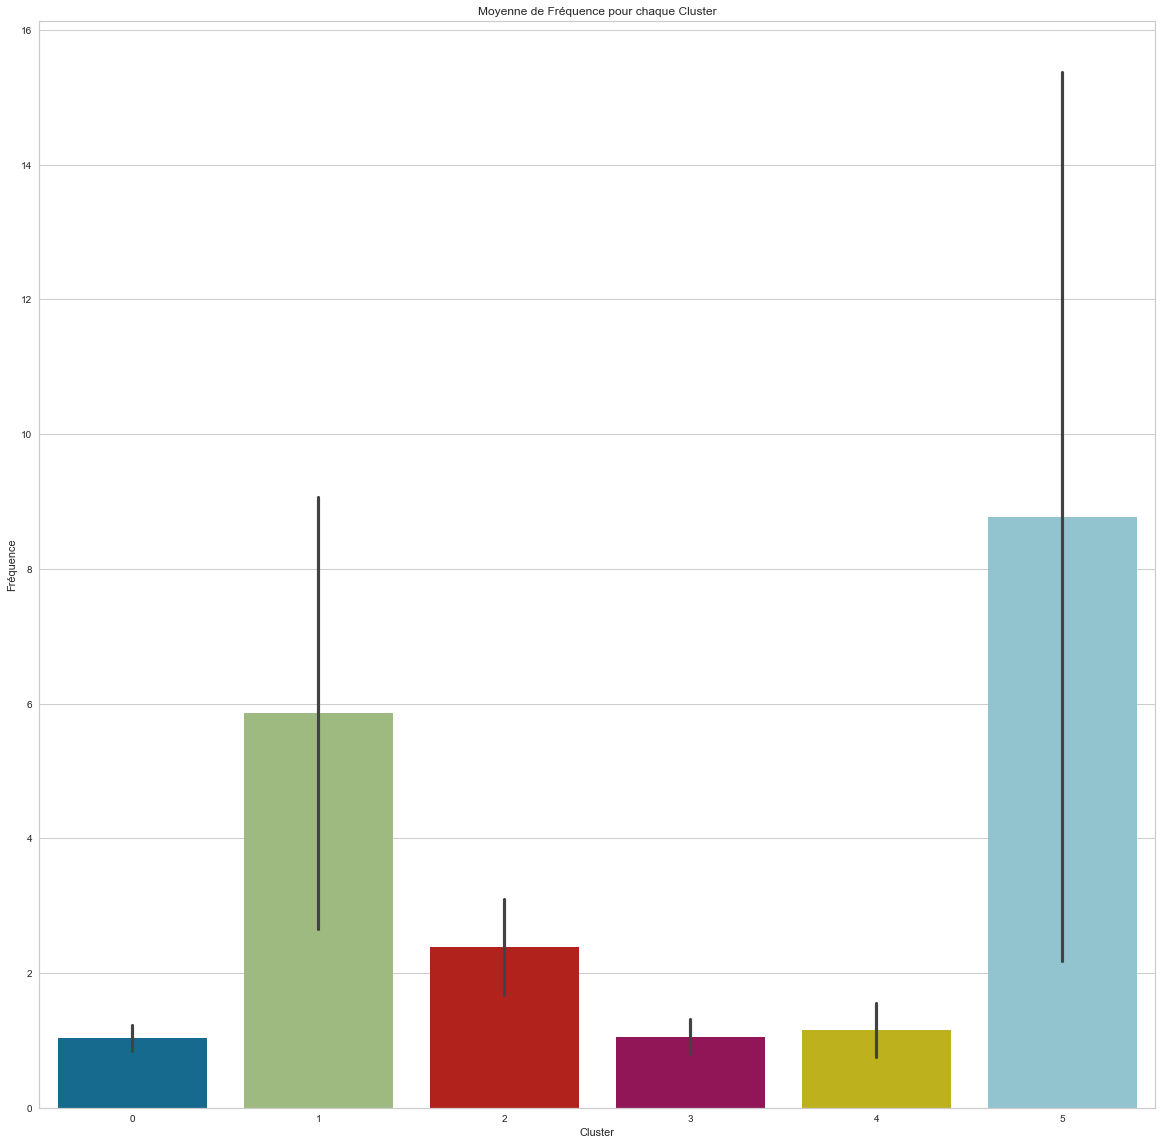

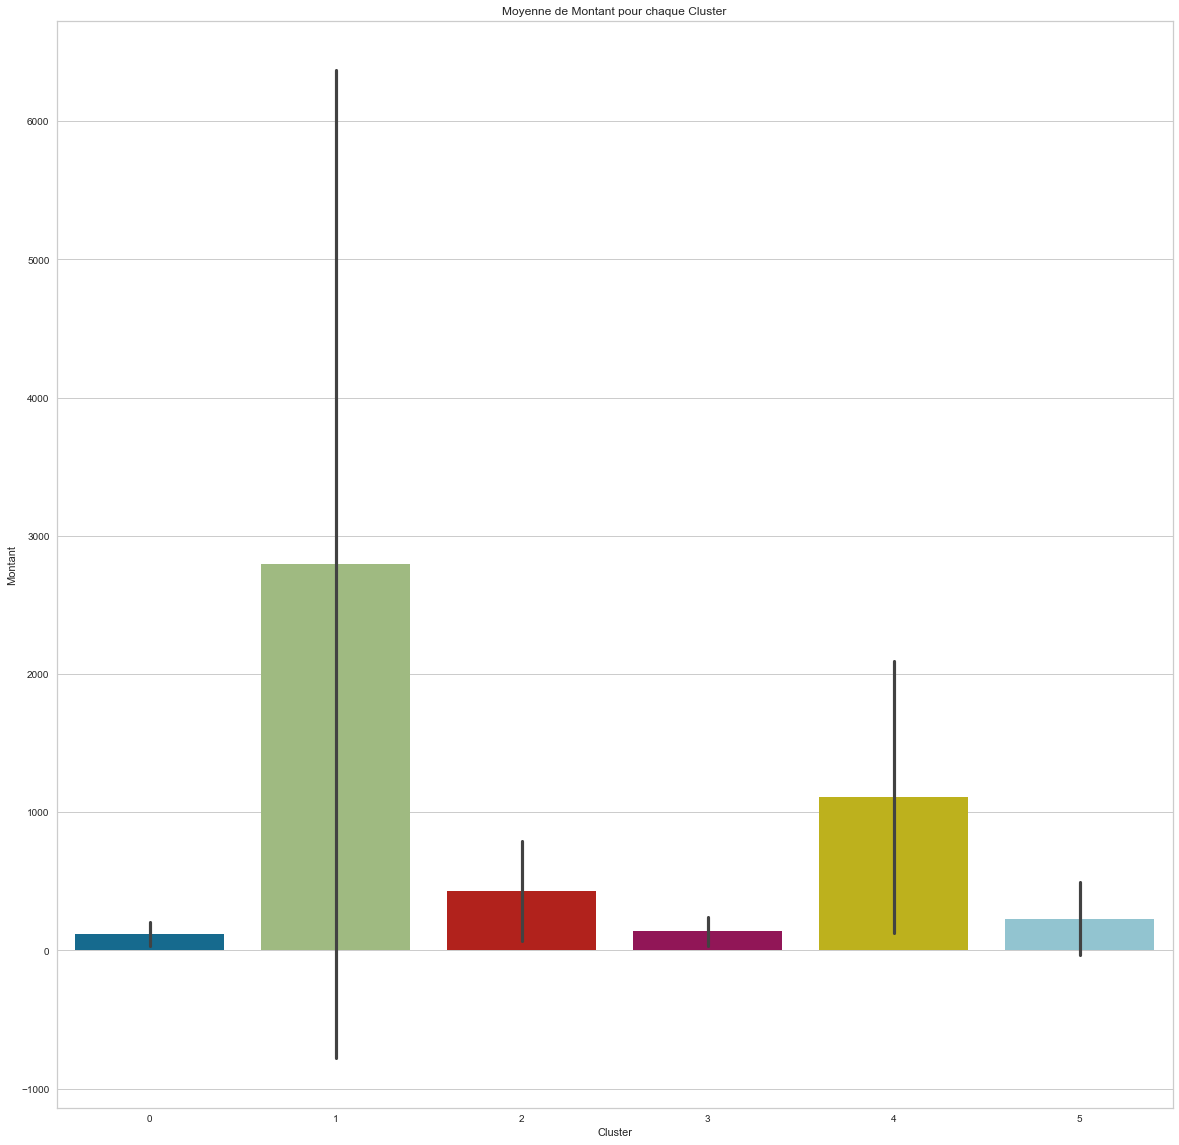

In [48]:
# Caractérisation :

for column in group_columns.columns:
    try:
        plt.figure(figsize=(20,20))
        titre = 'Moyenne de ' + str(column) + ' pour chaque Cluster' 
        plt.title(titre)
        sns.barplot(x = 'Cluster',
                    y = column,
                    data = KL_old, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

# RETRAIT DES 12 DERNIERS MOIS DU DATASET :

In [49]:
# Copie et Visualisation :

KS_old = ocp[ocp['order_purchase_timestamp'] < '2017-08-29 14:52:00'].copy()

KS_old.head(10)

,customer_unique_id,Cluster,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
0,dc83fe8f72fb4388f079a2f9b586240c,0,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.90,15.79,475.0,1.0,45.69,2017-05-12 10:51:43
2,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,0,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.90,38.18,394.0,1.0,128.08,2017-07-31 18:47:11
4,29a3dfd056ce4de7aebfe9f2e78f8268,0,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.00,19.02,412.0,1.0,272.02,2017-07-14 09:18:17
14,e257ea35efcc4d9b3bcb3470c0ca1d84,0,1.0,10.0,7.0,250.0,4.0,1.0,1.0,1.0,1.0,249.99,19.88,527.0,1.0,269.87,2017-03-21 11:38:33
15,d5a9eccfa0ca0ec79d59b81e98d83911,3,1.0,7.0,28.0,250.0,2.0,1.0,1.0,1.0,1.0,249.99,30.10,512.0,1.0,280.09,2017-04-05 00:11:11
17,130ed01dc02c7f30cea9a7faabda07b7,0,1.0,1.0,6.0,39.9,5.0,1.0,1.0,1.0,1.0,39.90,9.34,373.0,1.0,49.24,2017-08-22 11:03:51
29,ed10e8619415852099d9f3afc5172052,0,1.0,1.0,19.0,67.9,5.0,1.0,1.0,1.0,1.0,67.90,19.72,369.0,1.0,87.62,2017-08-25 15:24:46
30,ac1f8f7142bf224a669d8daa8192cc2e,0,1.0,1.0,4.0,22.0,5.0,1.0,1.0,1.0,1.0,22.00,7.78,391.0,1.0,29.78,2017-08-04 13:54:51
33,bfa1570b09b39f1004a218f7a508fcee,0,1.0,4.0,16.0,65.0,5.0,1.0,1.0,1.0,1.0,65.00,32.90,407.0,1.0,97.90,2017-07-19 14:36:14
56,2a2a3fad75a86811325aa30582b160a2,0,1.0,1.0,4.0,10.0,5.0,1.0,1.0,1.0,1.0,10.00,7.78,439.0,1.0,17.78,2017-06-17 14:01:58


In [50]:
# Groupement et Moyenne :

group_columns = KS_old.groupby('Cluster').mean()

group_columns

,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant
Cluster,,,,,,,,,,,,,,
0,1.032603,2.931663,10.648349,100.051167,4.649203,1.000000,1.000000,1.000000,1.000000,100.048219,17.749416,461.393508,1.032603,117.838518
1,1.015873,3.945264,11.030238,318.663021,3.757746,5.638889,5.638889,5.638889,3.013796,76.704741,18.540668,439.375000,5.708333,2153.330972
2,1.037943,3.603337,11.508902,146.814947,3.990241,2.285540,2.285540,2.285540,1.440123,81.961115,17.672791,431.457758,2.370431,421.175634
3,1.052504,3.285137,22.253231,112.880856,2.042407,1.008885,1.008885,1.008885,1.001616,112.560739,21.263183,475.169628,1.063005,135.335000
4,1.039514,6.776596,14.773556,920.623708,4.384498,1.094225,1.094225,1.094225,1.033435,875.272796,54.031945,467.367781,1.133739,1141.212401
5,6.229630,6.407407,13.303704,168.046667,3.892593,1.533333,1.533333,1.533333,1.200000,137.216444,20.991333,453.555556,9.044444,307.080000


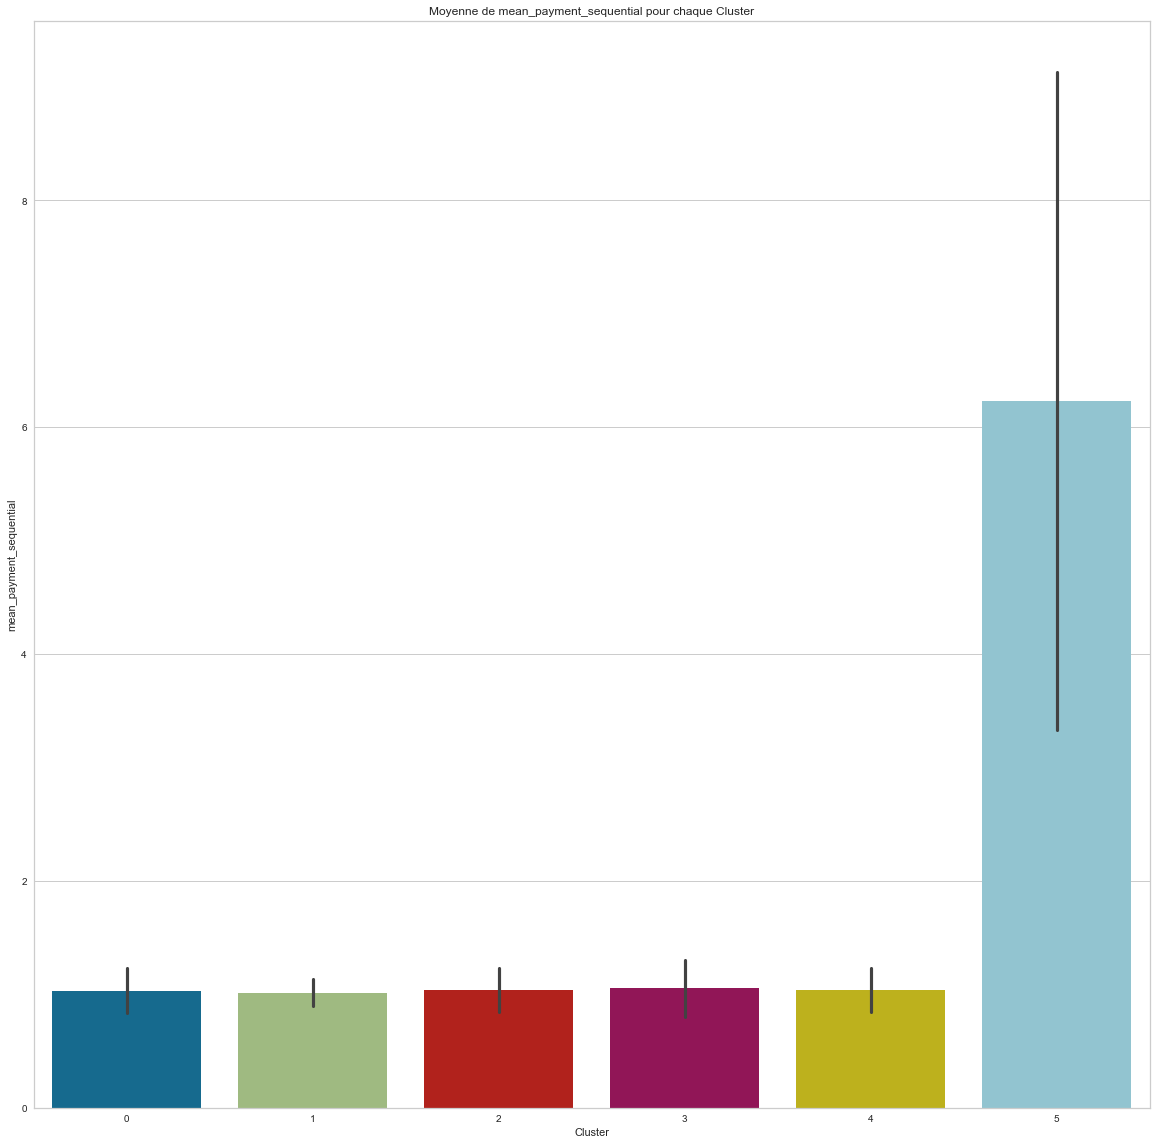

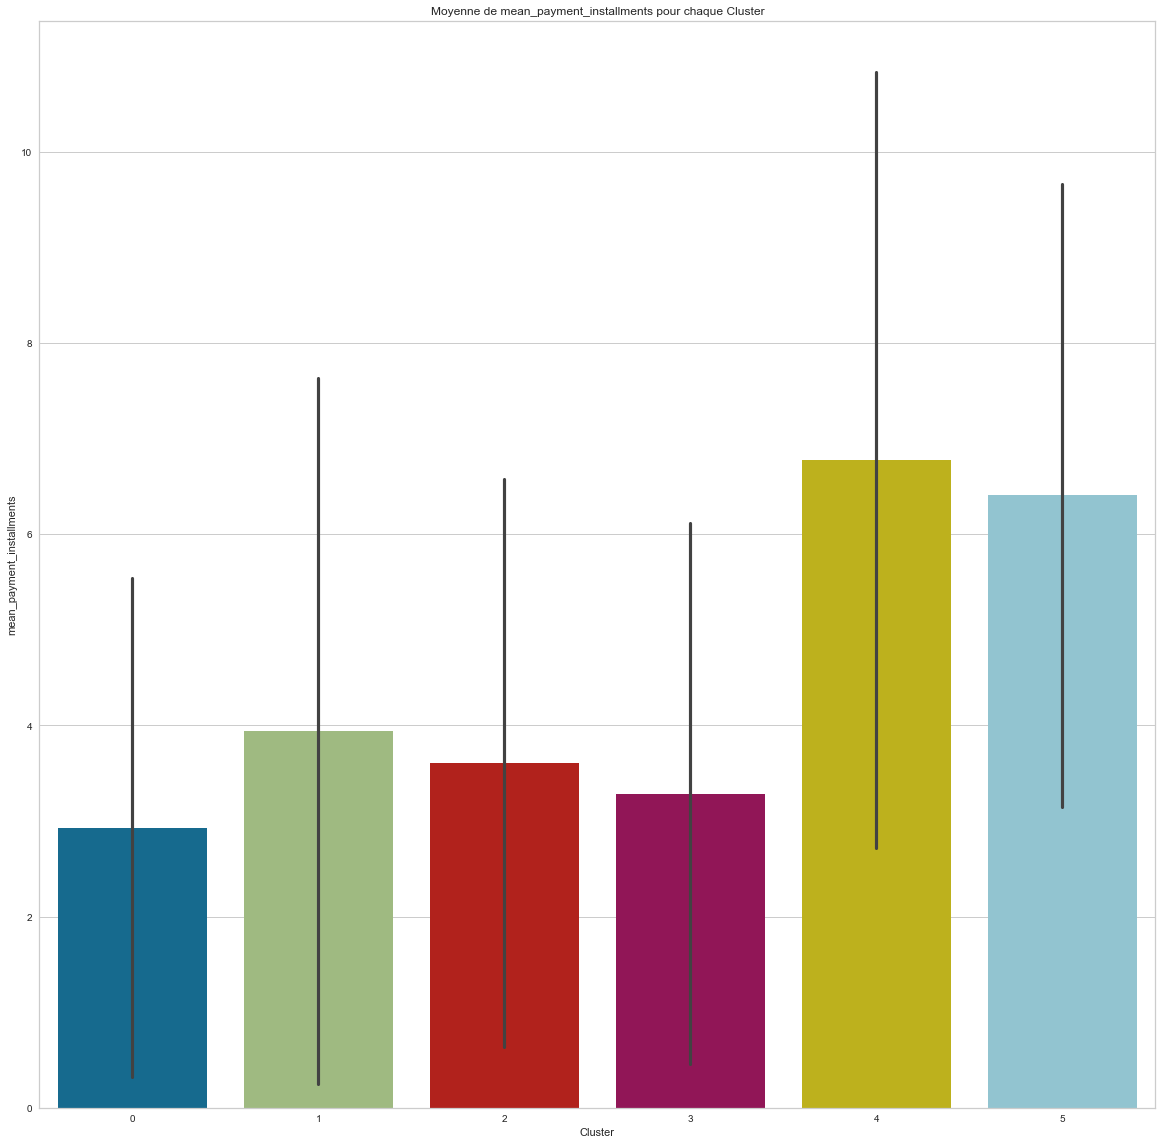

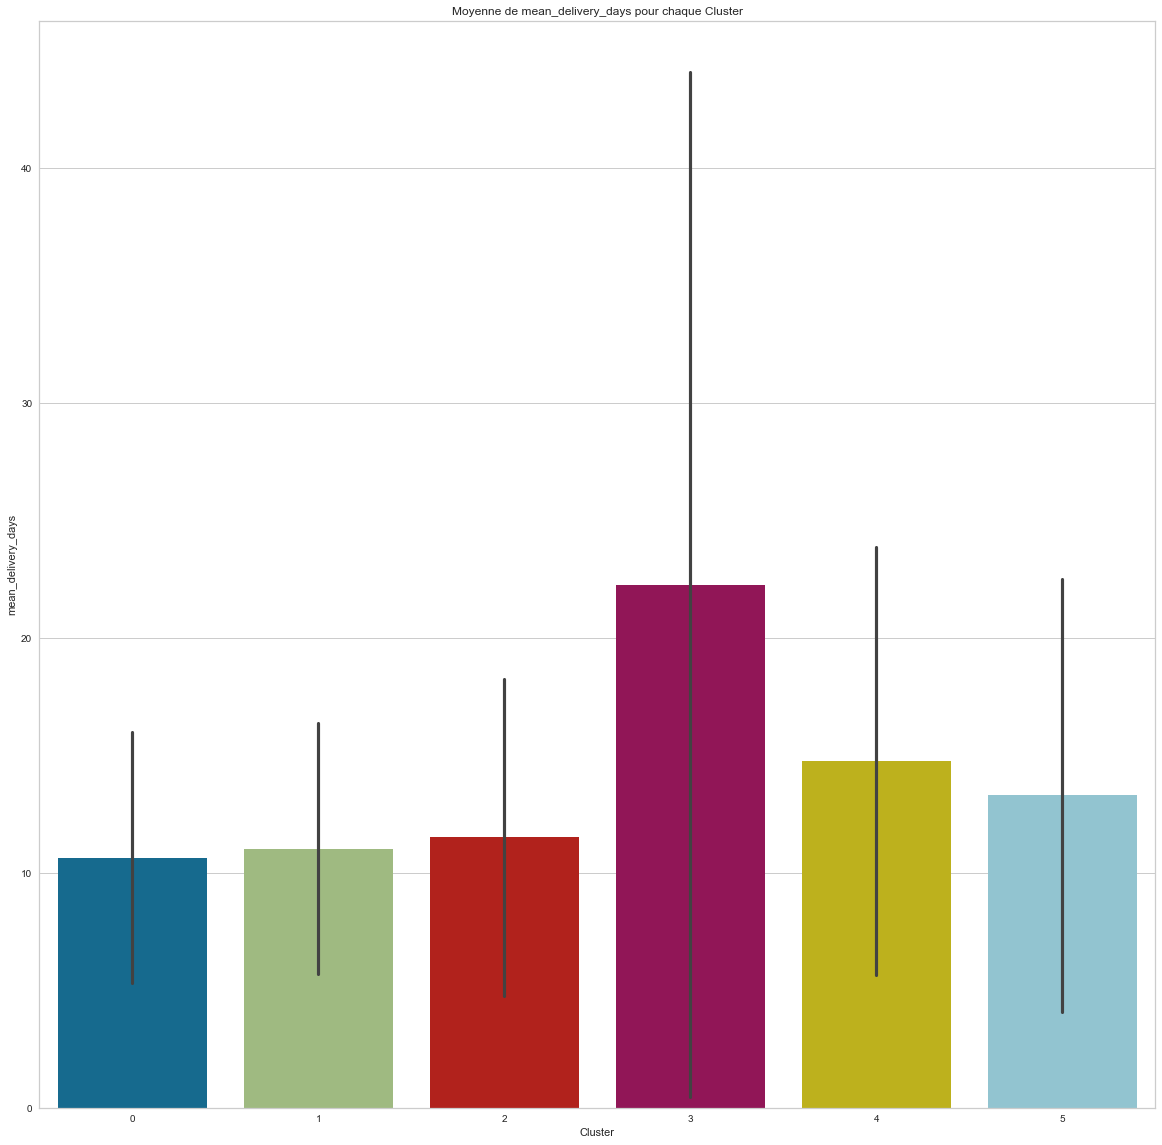

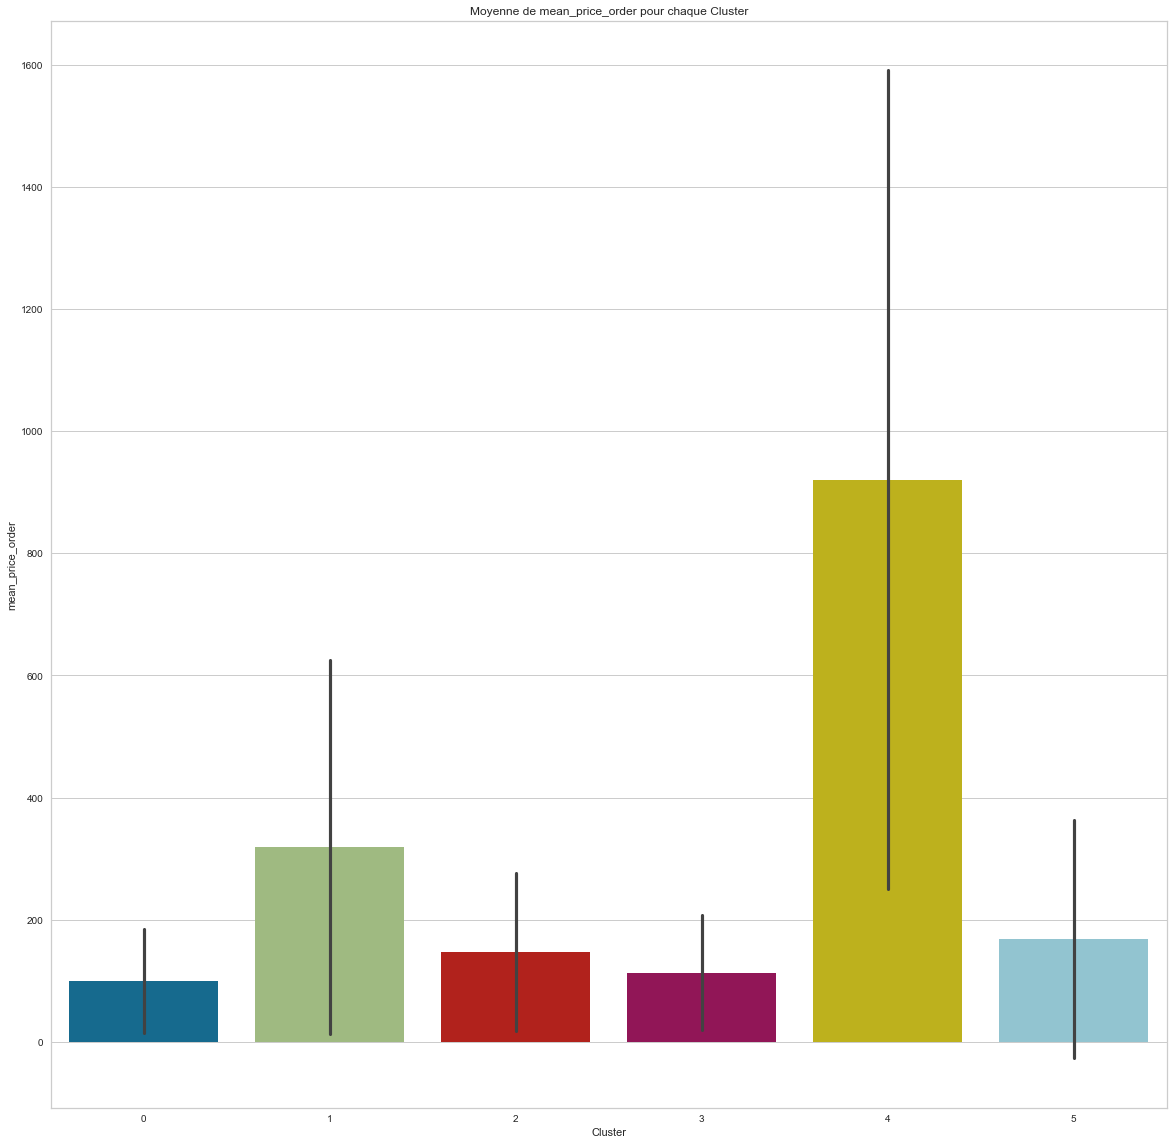

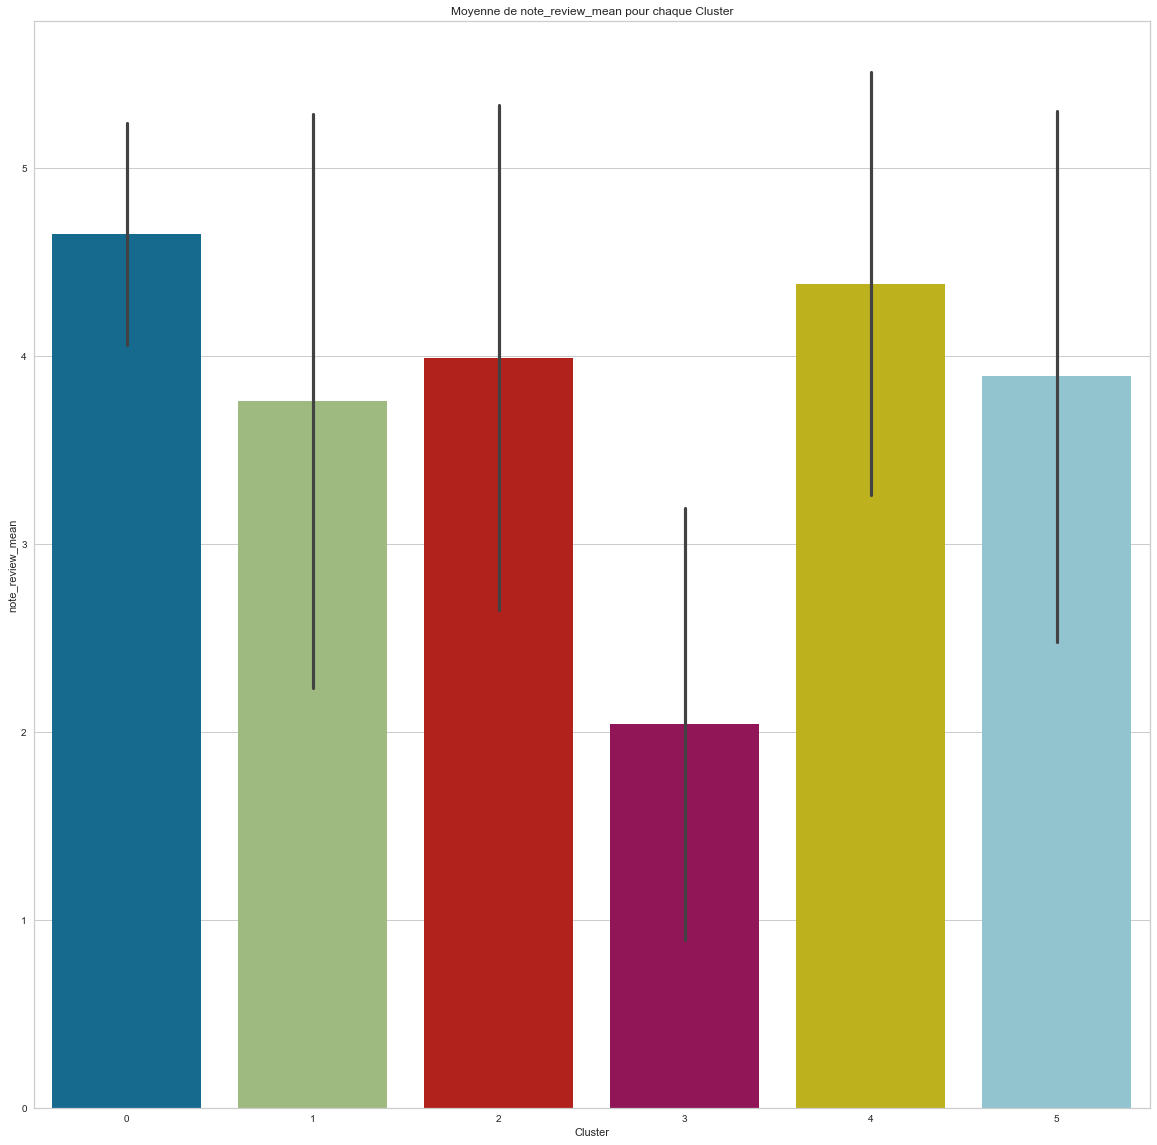

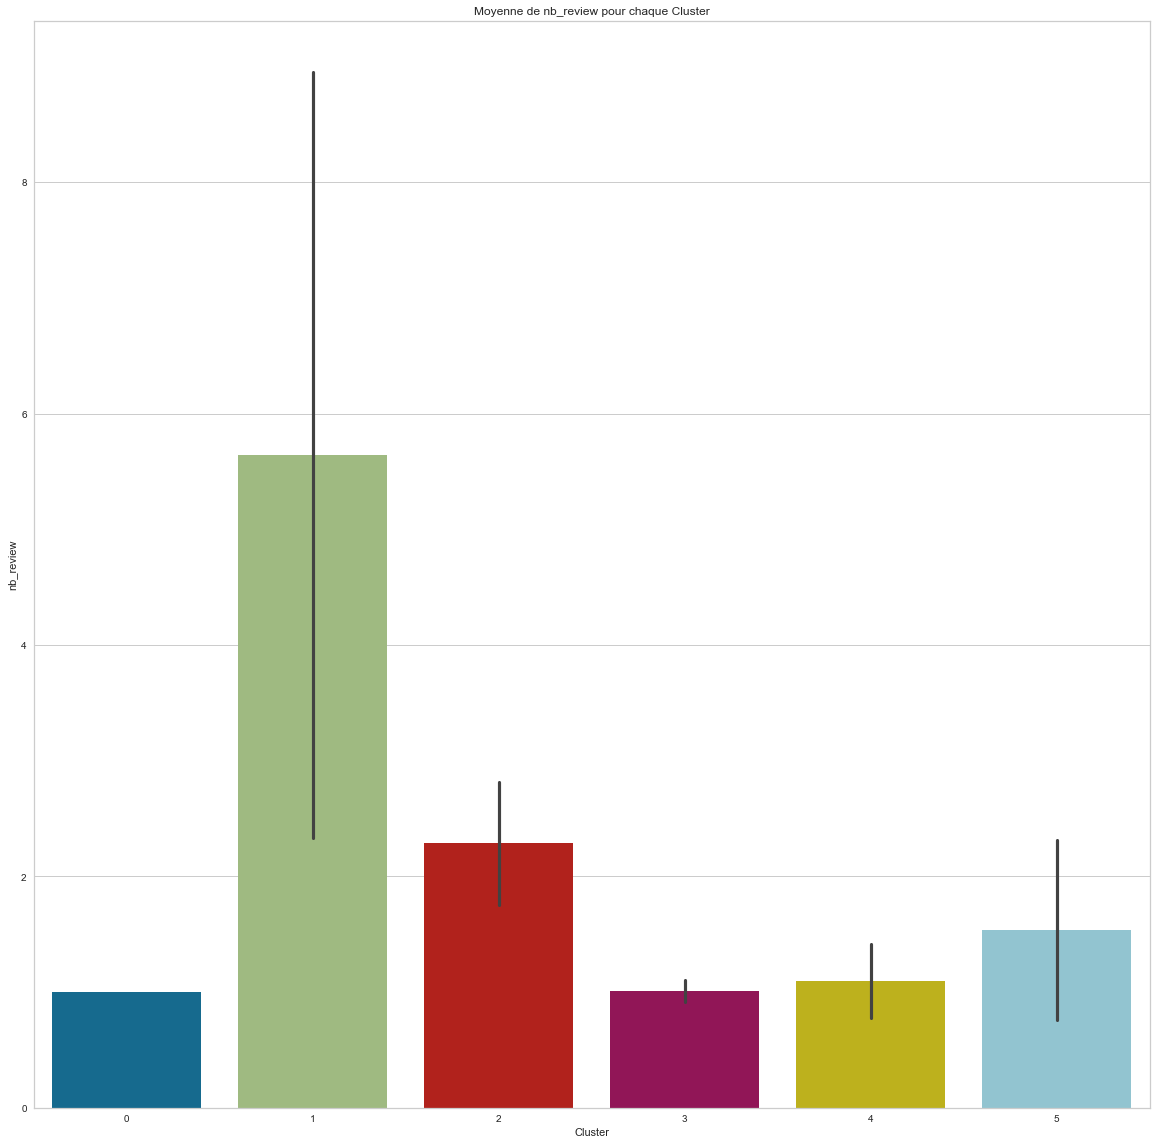

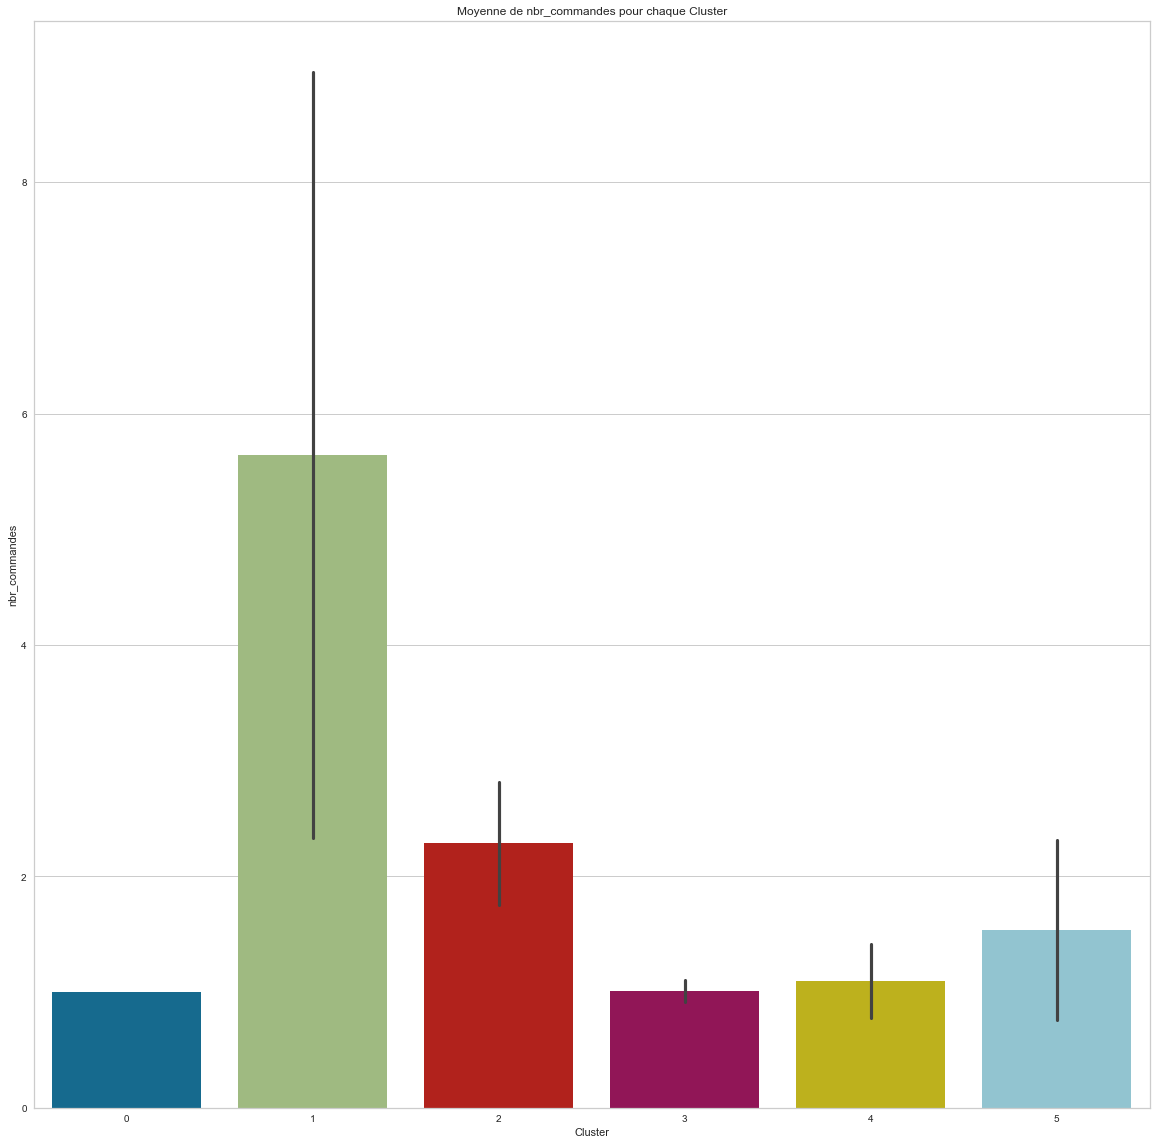

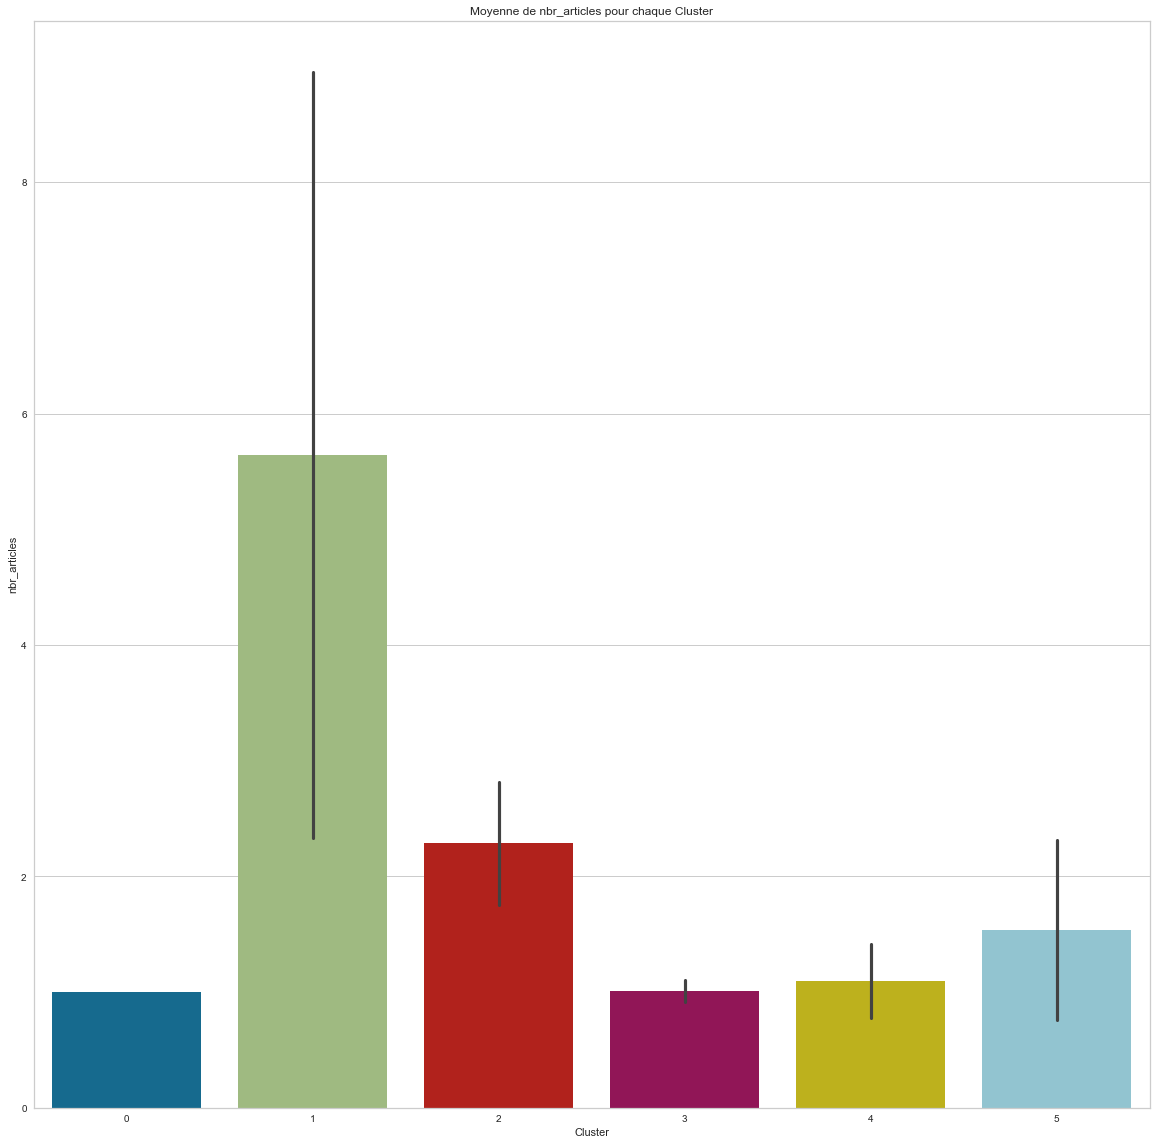

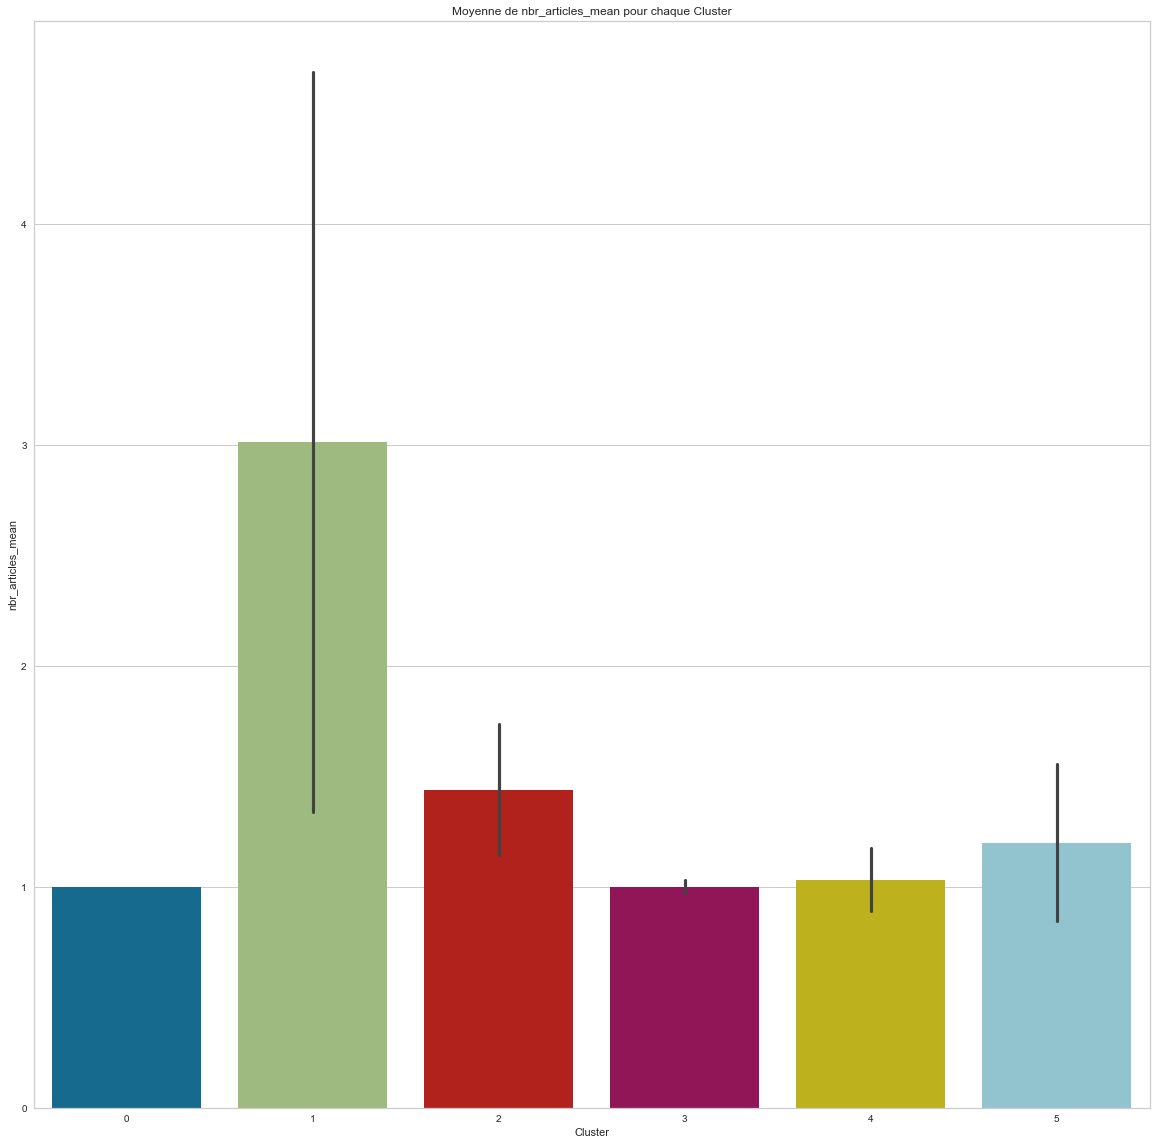

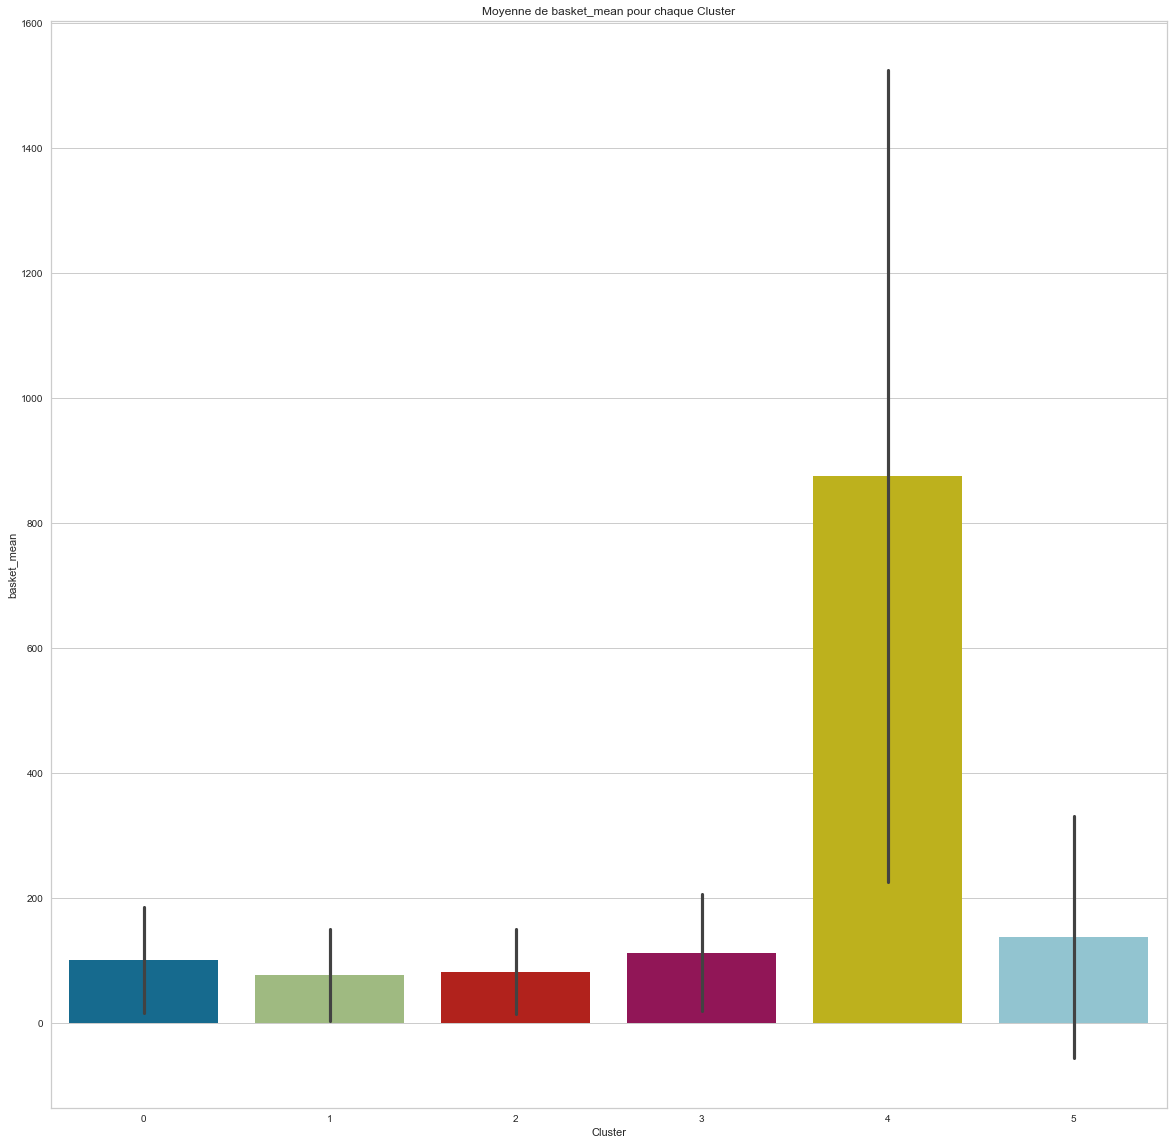

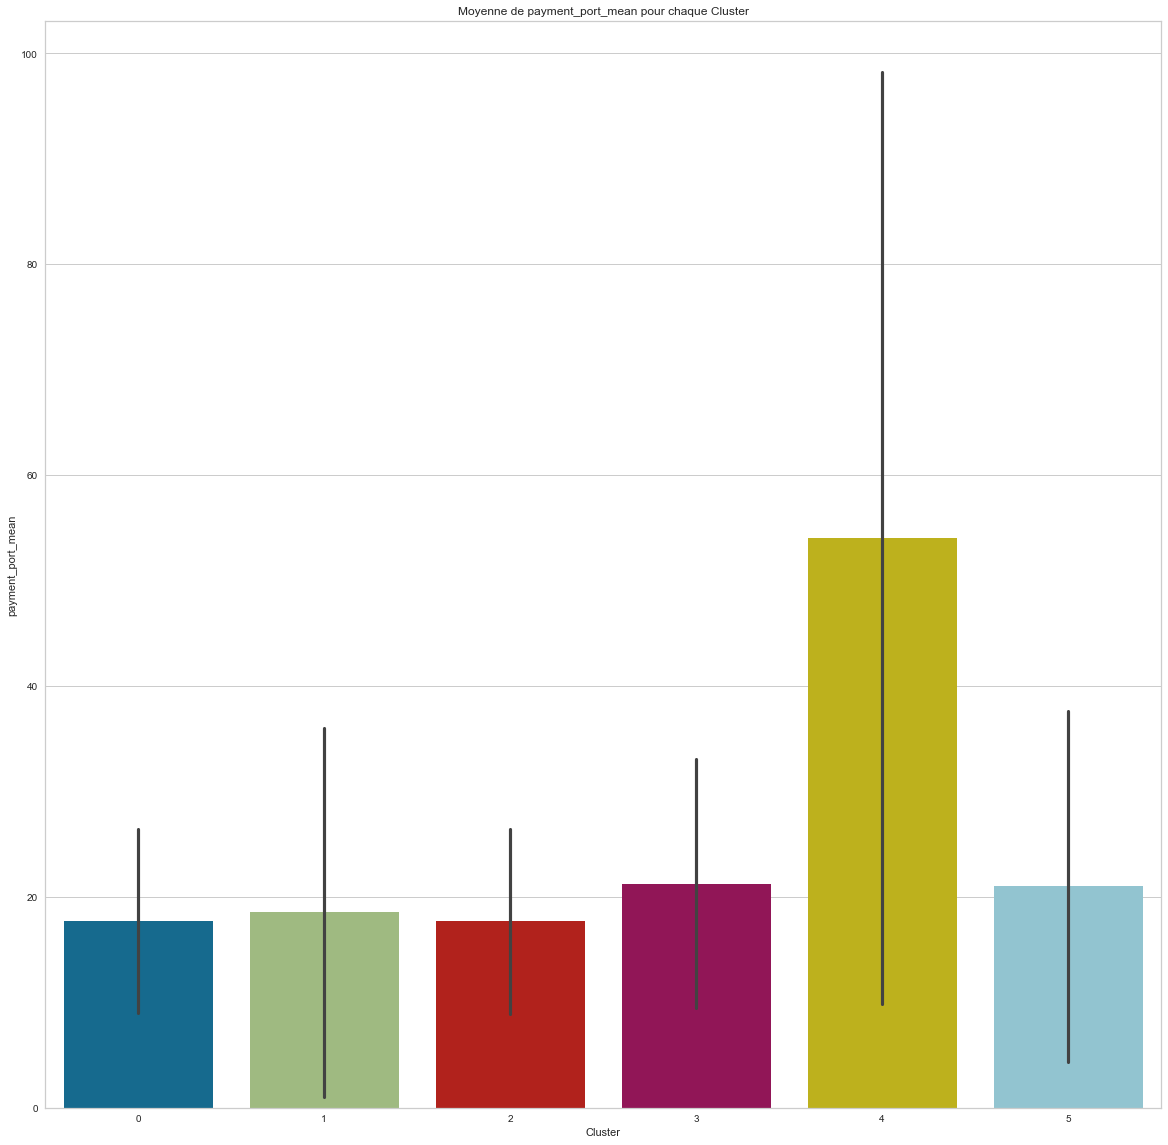

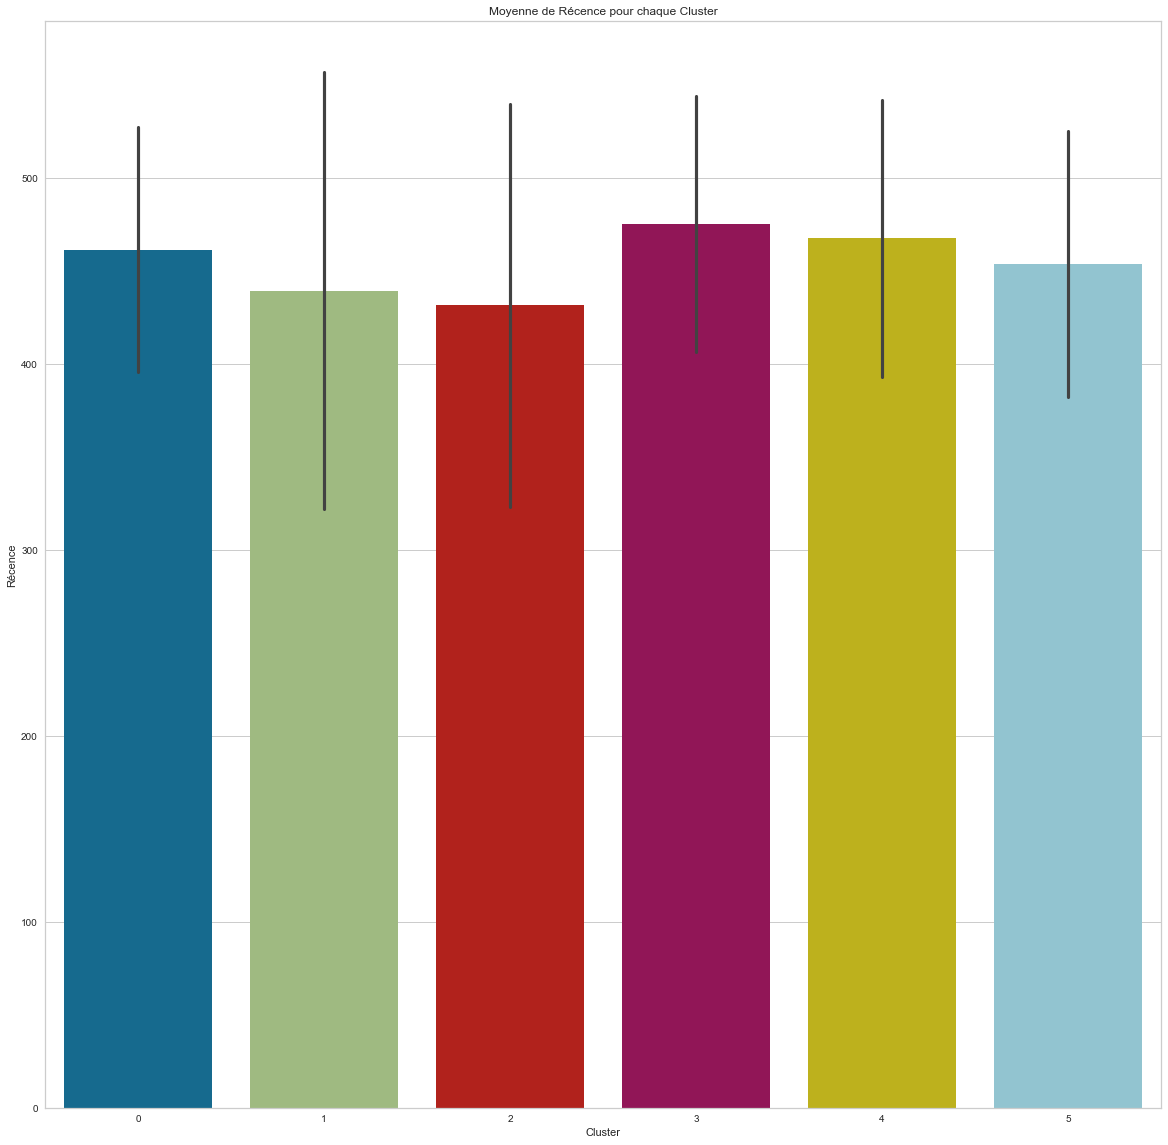

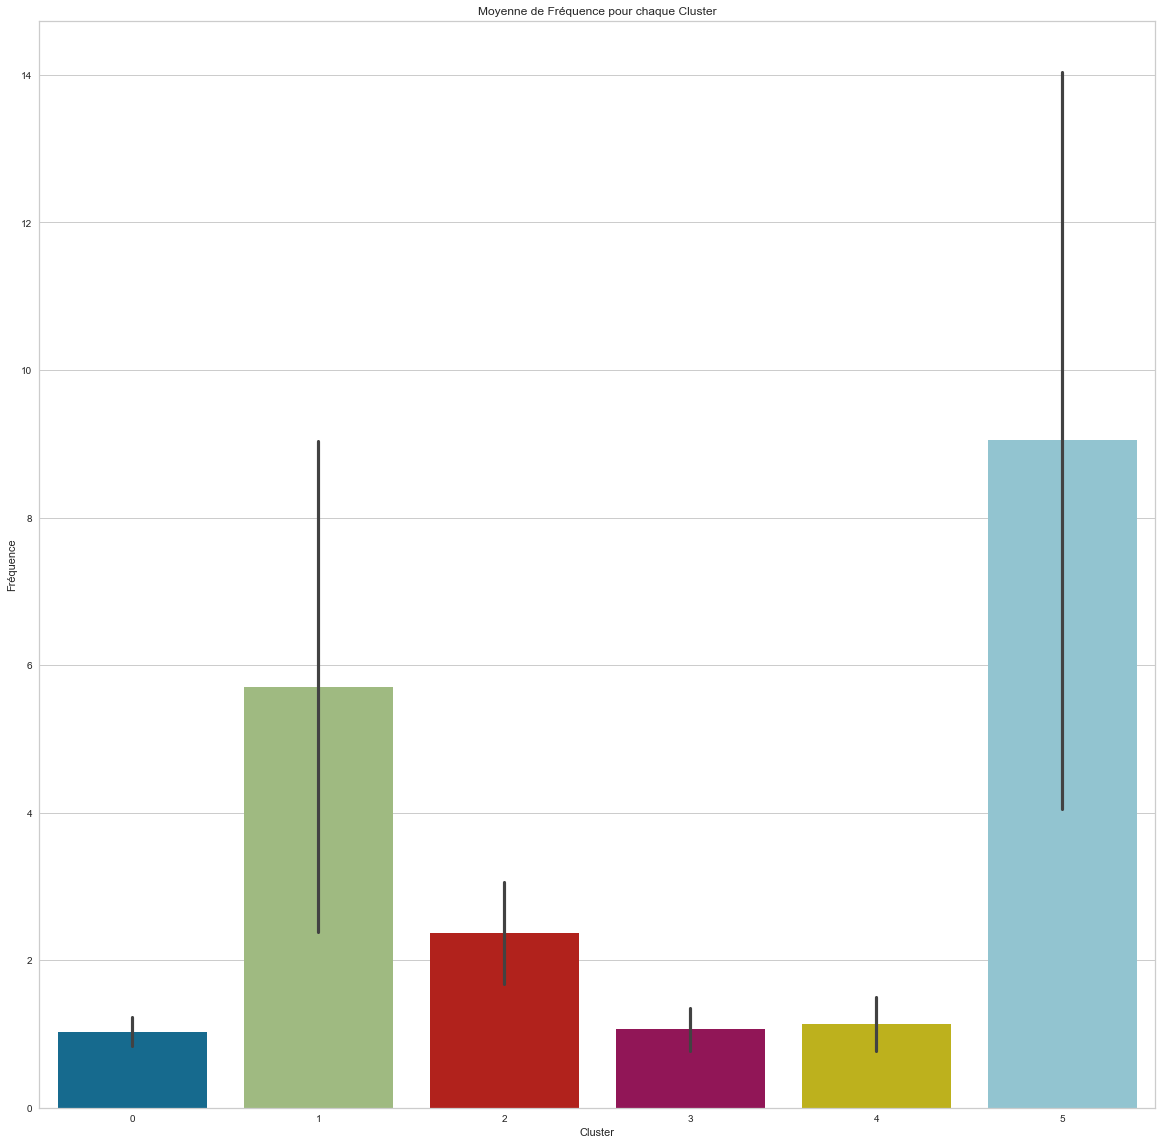

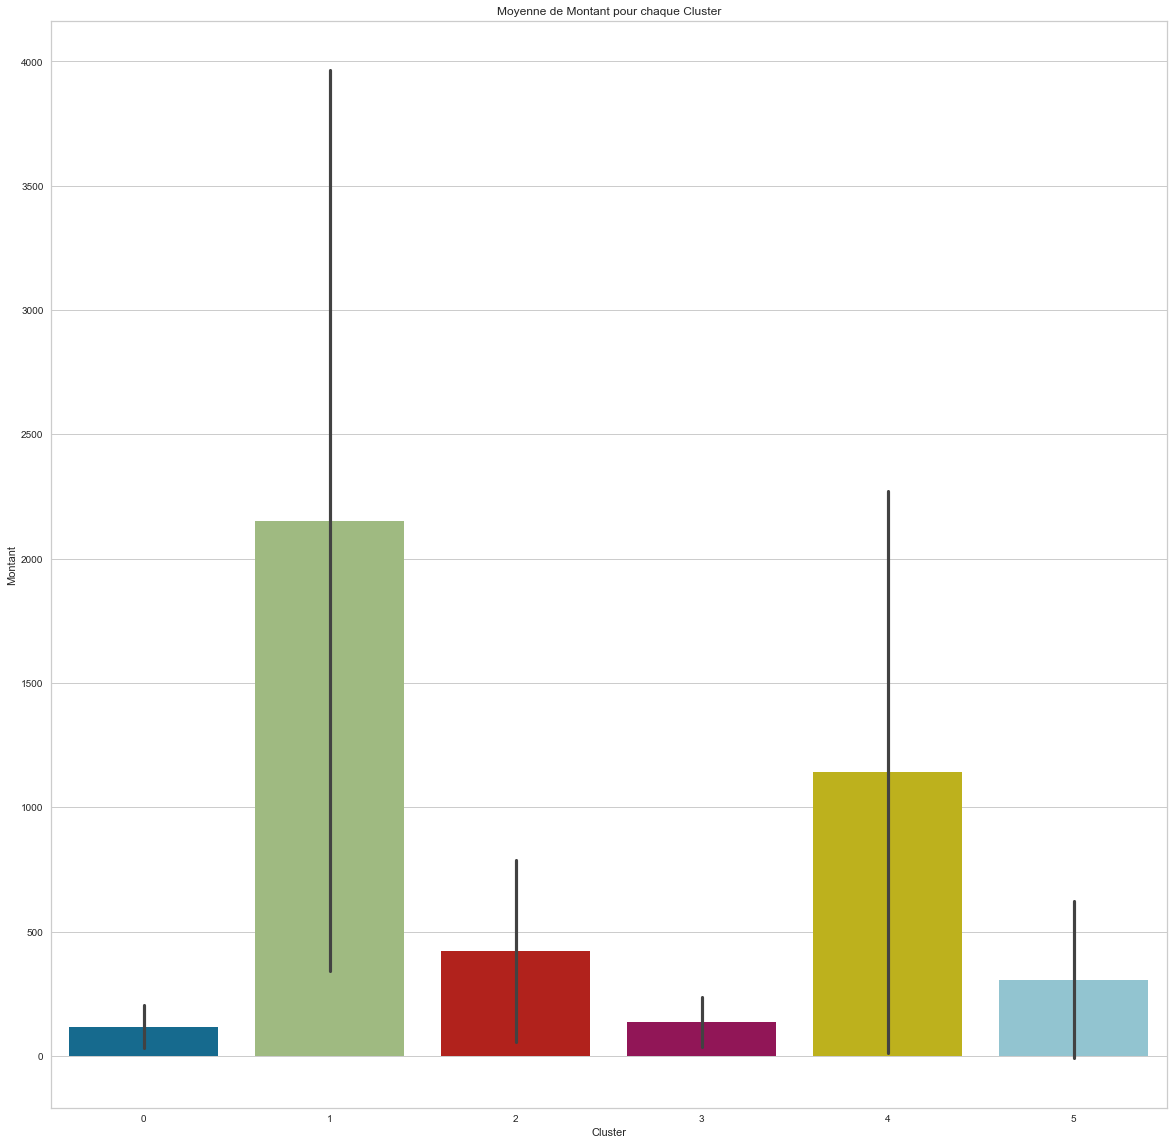

In [51]:
# Caractérisation :

for column in group_columns.columns:
    try:
        plt.figure(figsize=(20,20))
        titre = 'Moyenne de ' + str(column) + ' pour chaque Cluster' 
        plt.title(titre)
        sns.barplot(x = 'Cluster',
                    y = column,
                    data = KS_old, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

# IV Autre Approche : Fuite des Clients :

In [52]:
# Visualisation :

ocp.head(10)

,customer_unique_id,Cluster,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,order_purchase_timestamp
0,dc83fe8f72fb4388f079a2f9b586240c,0,1.0,3.0,7.0,29.9,4.0,1.0,1.0,1.0,1.0,29.9,15.79,475.0,1.0,45.69,2017-05-12 10:51:43
1,ba0a84d4272f023846c748fd2eb76ffd,0,1.0,6.0,8.0,95.9,5.0,1.0,1.0,1.0,1.0,95.9,27.22,176.0,1.0,123.12,2018-03-06 18:14:49
2,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,0,1.0,4.0,10.0,89.9,4.0,1.0,1.0,1.0,1.0,89.9,38.18,394.0,1.0,128.08,2017-07-31 18:47:11
3,463b274f7ab4cac3b894531a03a7afa1,0,1.0,4.0,9.0,64.9,5.0,1.0,1.0,1.0,1.0,64.9,19.64,18.0,1.0,84.54,2018-08-12 13:21:59
4,29a3dfd056ce4de7aebfe9f2e78f8268,0,1.0,10.0,10.0,253.0,4.0,1.0,1.0,1.0,1.0,253.0,19.02,412.0,1.0,272.02,2017-07-14 09:18:17
5,cefb6abc17327421e6cfb20276efd9cc,0,1.0,2.0,5.0,99.9,5.0,1.0,1.0,1.0,1.0,99.9,12.15,236.0,1.0,112.05,2018-01-05 18:57:57
6,8d668878ef1faabcc7e7330007327ecc,0,1.0,1.0,3.0,32.0,3.0,1.0,1.0,1.0,1.0,32.0,7.48,64.0,1.0,39.48,2018-06-27 10:01:00
7,c10e7d1b56c9ee965823ea384a0d6f21,0,1.0,1.0,2.0,29.9,5.0,1.0,1.0,1.0,1.0,29.9,7.39,141.0,1.0,37.29,2018-04-11 14:50:06
8,a0d20a4d4fb76cdf8d4047a01fc4cac0,3,1.0,1.0,6.0,32.0,1.0,1.0,1.0,1.0,1.0,32.0,7.48,20.0,1.0,39.48,2018-08-09 21:55:15
9,d39ad27ebe9439aa26965558c27aadea,0,1.0,1.0,1.0,32.0,4.0,1.0,1.0,1.0,1.0,32.0,7.48,66.0,1.0,39.48,2018-06-25 13:04:00


In [53]:
# Nombre de Lignes et de Colonnes :

ocp.shape

(52403, 17)

In [54]:
# Drop :

ocp = ocp.drop(['customer_unique_id','order_purchase_timestamp'], axis = 1)

In [55]:
# Restructuration :

ocp_sorted = ocp.sort_values('Récence')

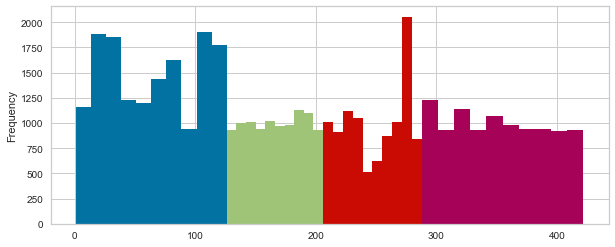

In [56]:
# Split :

q1 = ocp_sorted[0:15000].copy()
q2 = ocp_sorted[15000:25000].copy()
q3 = ocp_sorted[25000:35000].copy()
q4 = ocp_sorted[35000:45000].copy()

plt.figure(figsize=(10, 4))

q1.Récence.plot.hist(bins=10)
q2.Récence.plot.hist(bins=10)
q3.Récence.plot.hist(bins=10)
q4.Récence.plot.hist(bins=10)

plt.show()

In [57]:
# StandardScaler :

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(ocp)

In [58]:
# Normalisation par Echantillon :

sample1 = pd.DataFrame(scaler.transform(q1), columns=ocp.columns)
sample2 = pd.DataFrame(scaler.transform(q2), columns=ocp.columns)
sample3 = pd.DataFrame(scaler.transform(q3), columns=ocp.columns)
sample4 = pd.DataFrame(scaler.transform(q4), columns=ocp.columns)

In [59]:
# Kmeans :

k_means = KMeans(n_clusters=6, random_state=21, n_init=20)

k_means.fit(sample1)

KMeans(n_clusters=6, n_init=20, random_state=21)

In [60]:
# Assignation Cluster 1 aux différents groupes :

for q, sample in [(q1, sample1), (q2, sample2), (q3, sample3), (q4, sample4)]:
    
    q.loc[:, 'Cluster_ref'] = k_means.predict(sample)

In [61]:
# Assignation du Cluster 1 à chaque échantillon pris individuellement :

for q, sample in [(q2, sample2), (q3, sample3), (q4, sample4)]:
    k_means.fit(sample)
    q.loc[:, 'Cluster_true'] = k_means.predict(sample)

In [62]:
# Calcul de l'ARI pour mesurer la Stabilité du Cluster :

for q in [q2, q3, q4]:
    print(adjusted_rand_score(q['Cluster_ref'], q['Cluster_true']))

0.938993608237073
0.9576977852036018
0.9065014668428087


In [63]:
# Décompte des Clusters :

n_clus = 6

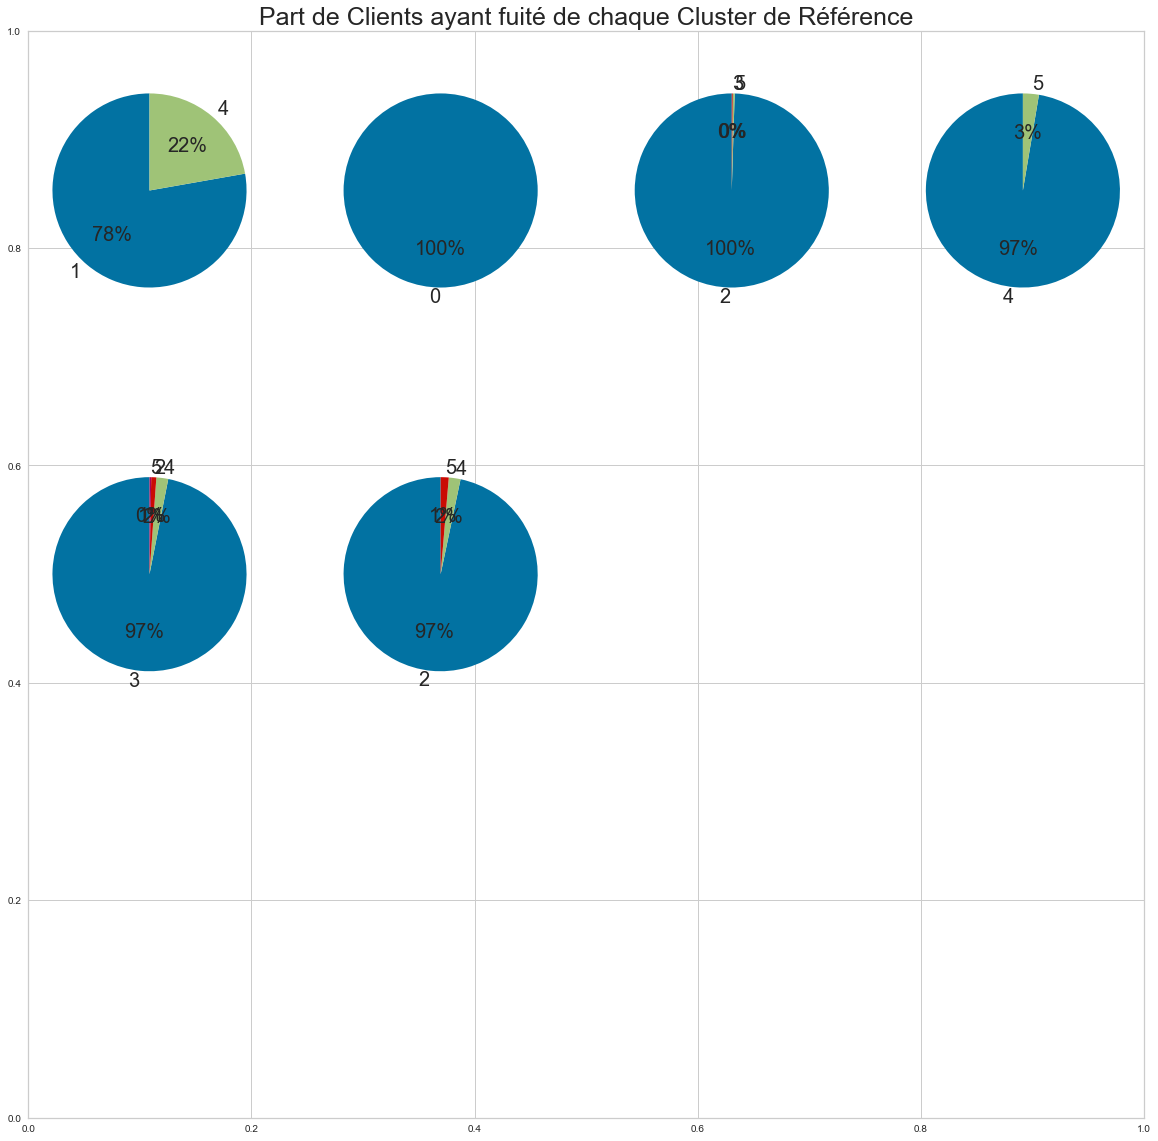

In [64]:
# Part des Clients de l'Echantillon 3 qui ont fuité du Cluster 1 :

fig = plt.figure(figsize=(20, 20))

plt.title('Part de Clients ayant fuité de chaque Cluster de Référence', fontsize=25)

for i in range(n_clus):
    ax = fig.add_subplot(3, 4, i+1)
    q4[q4['Cluster_ref'] == i]['Cluster_true'].value_counts().plot.pie(autopct='%1.0f%%', startangle=90, textprops={'fontsize': 20})
    ax.set_ylabel('')
    
plt.show()

In [65]:
# Exploration des Nouveaux Clusters :

q4_clus = q4.groupby('Cluster_true').mean()

q4_clus.head(10)

,Cluster,mean_payment_sequential,mean_payment_installments,mean_delivery_days,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,Récence,Fréquence,Montant,Cluster_ref
Cluster_true,,,,,,,,,,,,,,,,
0,0.000000,1.035826,2.817256,10.560559,100.159638,4.651931,1.000000,1.000000,1.000000,1.000000,100.157122,17.887707,353.255546,1.035826,118.053804,1.000000
1,1.000000,1.000000,2.000000,15.000000,31.800000,1.000000,21.000000,21.000000,21.000000,11.000000,1.514286,7.827143,409.000000,21.000000,4118.310000,0.000000
2,2.313758,1.036577,3.323154,13.940268,135.268221,3.262882,1.866443,1.866443,1.866443,1.325895,89.219260,19.379760,350.927852,1.929530,327.567510,3.746644
3,3.930636,1.026012,6.528902,13.465318,883.063295,4.341040,1.144509,1.144509,1.144509,1.054913,811.789133,50.145434,343.916185,1.170520,1158.032486,3.988439
4,1.083650,1.045627,4.600760,10.891635,393.141445,3.618821,4.861217,4.861217,4.861217,2.784221,89.156551,20.353444,351.800380,5.047529,2519.761597,3.112167
5,5.000000,5.785714,6.166667,13.166667,130.088095,3.928571,1.571429,1.571429,1.571429,1.214286,94.503810,20.840238,366.380952,9.261905,283.305238,4.071429


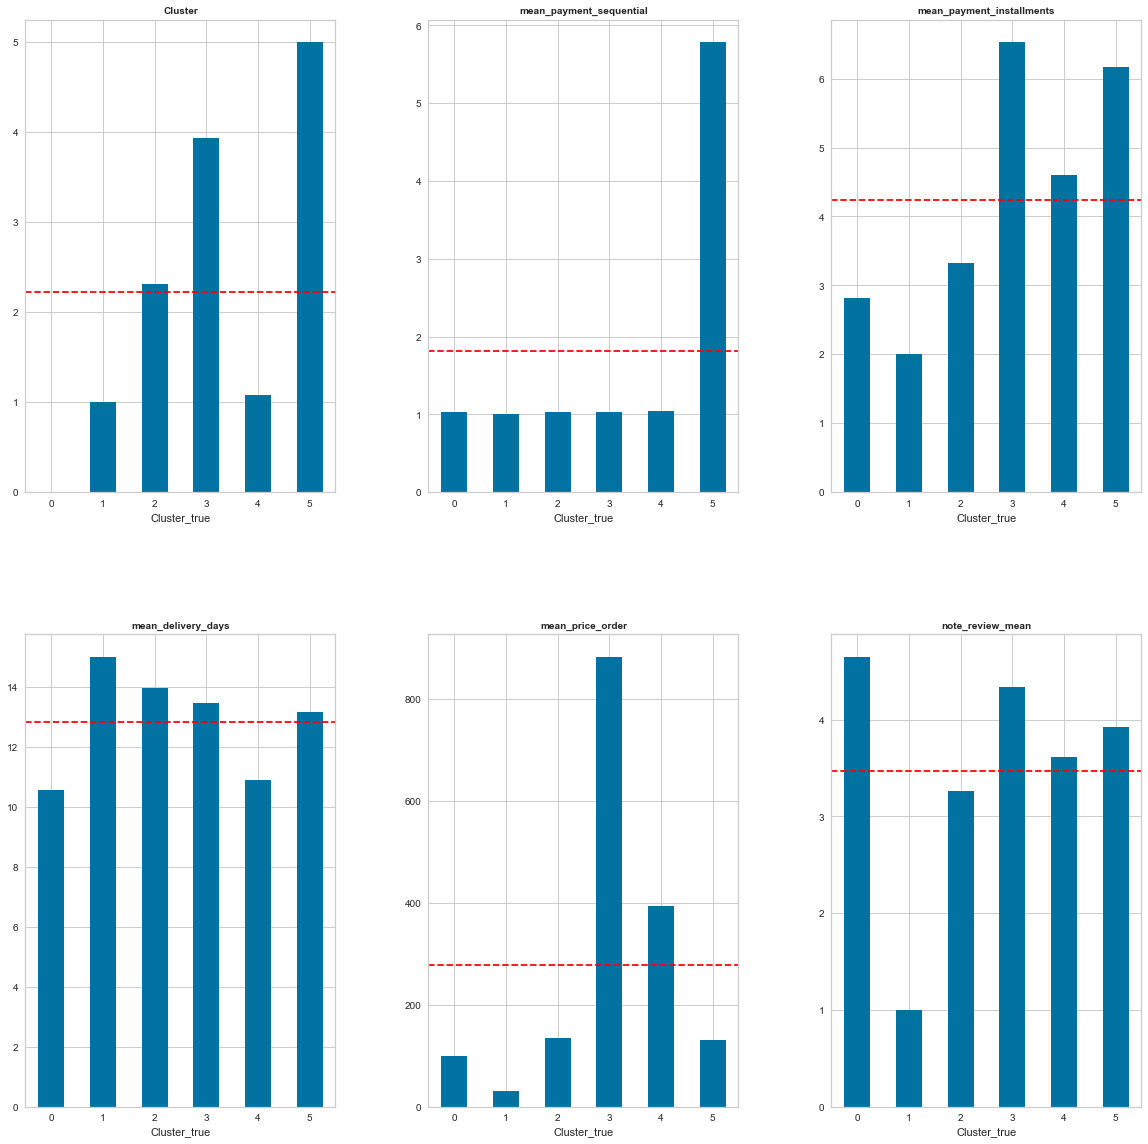

In [66]:
# Histogramme Variable / Cluster :

fig = plt.figure(figsize=(20,20))

for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    q4_clus.iloc[:, i].plot.bar()
    ax.tick_params('x', labelrotation=0)
    ax.set_title(q4_clus.columns[i], fontsize=10, weight='bold')
    plt.axhline(q4_clus.iloc[:, i].mean(), color='red', ls='--')
    
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

In [67]:
# Labélisation :

labels = ['Fashion','Home','Food','Construction','High_Technology','Leisure','Misc']

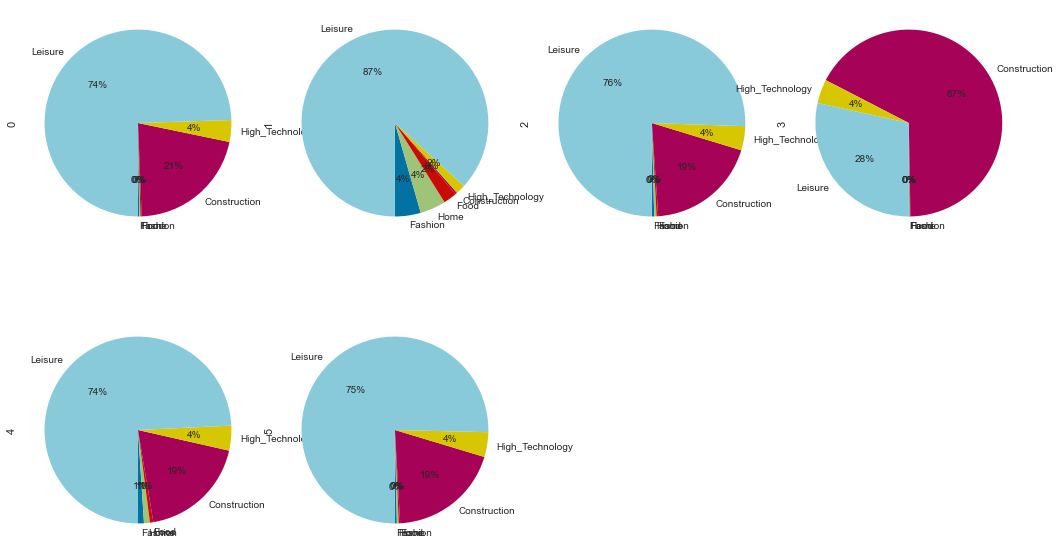

In [68]:
# Catégories Produit dans les Nouveaux Clusters :

fig = plt.figure(figsize=(18, 16))

for i in range(6):
    ax = fig.add_subplot(3, 4, i+1)
    q4_clus.iloc[i, 7:13].plot.pie(startangle= -90, labels=labels,
                                   autopct='%1.0f%%',textprops={'fontsize': 10})
                       
fig.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()